In [3]:
###Loading Initial libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


# **Dataset initial observations**

In [4]:
LS=pd.read_csv('Lead Scoring.csv')
LS.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
print("Number of Rows in Dataset=",LS.shape[0],"and number of Columns in dataset=",LS.shape[1])

Number of Rows in Dataset= 9240 and number of Columns in dataset= 37


# #Replacing the space in column names by '_' and converting to lower case

In [6]:

LS.columns = LS.columns.str.lower().str.strip().str.replace(' ','_')
LS.rename(columns = {'totalvisits':'total_visits'},inplace = True)
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

#### Datatypes

In [7]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
prospect_id                                      9240 non-null object
lead_number                                      9240 non-null int64
lead_origin                                      9240 non-null object
lead_source                                      9204 non-null object
do_not_email                                     9240 non-null object
do_not_call                                      9240 non-null object
converted                                        9240 non-null int64
total_visits                                     9103 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9103 non-null float64
last_activity                                    9137 non-null object
country                                          6779 non-null object
specialization                                   7802 

In [8]:

Cat=[]
Num=[]
for i in LS.columns:
    if LS[i].dtype=='float64' or LS[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)

In [9]:
print("The Numerical features in the dataset are ",Num)

The Numerical features in the dataset are  ['lead_number', 'converted', 'total_visits', 'total_time_spent_on_website', 'page_views_per_visit', 'asymmetrique_activity_score', 'asymmetrique_profile_score']


In [10]:
print("The categorical features in the dataset are ",Cat)

The categorical features in the dataset are  ['prospect_id', 'lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'tags', 'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


# **describe() - Five point summary and inferences**

Calculating Five-number summary for numerical columns:

In [11]:
LS.describe()

lead_number    converted  total_visits  total_time_spent_on_website  \
count    9240.000000  9240.000000   9103.000000                  9240.000000   
mean   617188.435606     0.385390      3.445238                   487.698268   
std     23405.995698     0.486714      4.854853                   548.021466   
min    579533.000000     0.000000      0.000000                     0.000000   
25%    596484.500000     0.000000      1.000000                    12.000000   
50%    615479.000000     0.000000      3.000000                   248.000000   
75%    637387.250000     1.000000      5.000000                   936.000000   
max    660737.000000     1.000000    251.000000                  2272.000000   

       page_views_per_visit  asymmetrique_activity_score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       asymmetrique_profile_score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

The Inferences from the 5 point summary are-

1. **Lead Number** is a  unique Id generated for each customer. It will not add any value to the model as the statistical summary will not add  any insight or pattern .

2. **Converted**- This is our target variable with only 0 and 1 as values.

3. **Total Visits**- The distribution is right skewed because interested    individuals tend to visit the website more number of times.
As per the values, 1st quartile(1 visit per person) of the visits come from people  who tend to visit the site once and never come back. The second and third quartiles(1-5 visit per person) of the visits come from customers who want to gain an idea about Z education.Lastly, the people whose number of  total visits lie in the last quartile are the most engaged customers, with upto a max of 251 visits to the website.
Here the highest visits are outliers for the feature.

4. **Total Time Spent on Website**- The distribution is right skewed because interested individuals tend to visit the website for longer duration of time.
As per the values, the low 25 percentile engagement of the website comes from people  who tend to spend less time on the website. The second and third quartiles define an average of the engagement, 487 minutes. This comes from customers who want to gain an idea about X education. Lastly, the people whose time spent on the website lies in the last quartile are the most engaged customers.
Here there are no outliers above IQR region.

5. **Page Views Per Visit**-The distribution is right skewed because interested individuals tend to the visit more number of  pages on  the website.
As per the values,25%(1 visit) of the page visits come  from people  who tend to visit only the landing page. 50-75 %(2-3 visit) of the page  visits come from customers who search for few courses but do not engage with X education. Lastly, the people whose number of page visits lie in the last quartile are the most engaged customers.
Here the highest page visits are outliers for the feature.



6. **Asymmetrique Activity Score** and 	**Asymmetrique Profile Score** are discrete values.Hence statistical summary will not add any insight. However, we will perform Univariate /Bivariate Analysis with other 'asymmetrique' features.


# **Lead Number and Prospect ID to be dropped.**
It will not be of use for any insight, hence we will drop them

In [12]:

print(LS['lead_number'].nunique())
print(LS['prospect_id'].nunique())

LS=LS.drop(['lead_number'],axis=1)
LS=LS.drop(['prospect_id'],axis=1)

9240
9240


# Grouping for categorical features:

In [13]:
LS['lead_origin']=LS['lead_origin'].replace(['Lead Import','Quick Add Form'],'others')
LS['lead_source']=LS['lead_source'].replace(['NC_EDM','Pay per Click Ads','testone','youtubechannel','youtubechannel','welearnblog_Home','blog','WeLearn','Welingak Website','WeLearn','Live Chat','Referral Sites','Facebook','bing','Click2call','Social Media','Press_Release'],'others')
LS['last_activity']=LS['last_activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Received','Email Marked Spam','View in browser link Clicked','Approached upfront','Had a Phone Conversation','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed'],'others')

LS['country']=LS['country'].replace(['Vietnam','Indonesia','Sri Lanka','Switzerland','Russia','Malaysia','Denmark','Tanzania','Liberia','Kenya','Italy','China','Bangladesh','Asia/Pacific Region','Belgium','Netherlands','Uganda','Philippines','Ghana','Sweden','Canada','South Africa','Germany','Nigeria','Kuwait','unknown','Oman','France','Bahrain','Hong Kong','Qatar','Australia','United Kingdom','Saudi Arabia','United States','United Arab Emirates','Singapore'],'Non Indian')

LS['specialization']=LS['specialization'].replace(['Services Excellence','E-Business ','Rural and Agribusiness','Retail Management','E-COMMERCE','Hospitality Management','Travel and Tourism','Media and Advertising','International Business','Healthcare Management'],'others')


LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].replace(['Email','SMS','Other','Multiple Sources' ,'Advertisements','Social Media' ],'others')

LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].replace(['Other','Businessman','Housewife'],'others')

LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].replace(['Flexibility & Convenience','Other'],'Flexibility & Convenience')

LS['tags']=LS['tags'].replace(['Recognition issue (DEC approval)','Shall take in the next coming month','University not recognized','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','invalid number','Diploma holder (Not Eligible)','Graduation in progress','Interested  in full time MBA','Not doing further education','Closed by Horizzon','switched off','Busy','Lost to EINS'],'others')

LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'Not Sure')

LS['lead_profile']=LS['lead_profile'].replace(['Student of SomeSchool','Lateral Student','Dual Specialization Student'],'others')
LS['last_notable_activity']=LS['last_notable_activity'].replace(['Email Marked Spam','Email Received','Approached upfront' ,'Form Submitted on Website' ,'Resubscribed to emails',   'View in browser link Clicked'],'others')


In [14]:
LS['lead_origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
others                       56
Name: lead_origin, dtype: int64

# **Null Value Analysis**



In [15]:
Null_Count=LS.isnull().sum()
Null_Count

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

Although there are many columns with no null values,some of the columns do have high number of Null values present.
Hence here treatment have to be done.

In [16]:
Null_yes=[]
for i in LS.columns:
      if LS[i].isnull().sum()>0:
            print(i," ",LS[i].dtype," ",((LS[i].isnull().sum())/(len(LS[i])))*100)
            Null_yes.append(i)

lead_source   object   0.38961038961038963
total_visits   float64   1.4826839826839828
page_views_per_visit   float64   1.4826839826839828
last_activity   object   1.1147186147186148
country   object   26.634199134199132
specialization   object   15.562770562770561
how_did_you_hear_about_x_education   object   23.885281385281385
what_is_your_current_occupation   object   29.11255411255411
what_matters_most_to_you_in_choosing_a_course   object   29.318181818181817
tags   object   36.28787878787879
lead_profile   object   29.318181818181817
city   object   15.367965367965366
asymmetrique_activity_index   object   45.64935064935065
asymmetrique_profile_index   object   45.64935064935065
asymmetrique_activity_score   float64   45.64935064935065
asymmetrique_profile_score   float64   45.64935064935065


The above output shows the percentage of Null values present in the features  along with its Datatype

In [17]:
Null_values=[]
for i in Null_Count.index:
  if i in Null_Count:
    Null_values.append(LS[i].isnull().sum())

In [18]:
df_Null=pd.DataFrame(Null_values,index=Null_Count,columns=['Nulls'])
df_Null.head(2)

Nulls
0       0
36     36

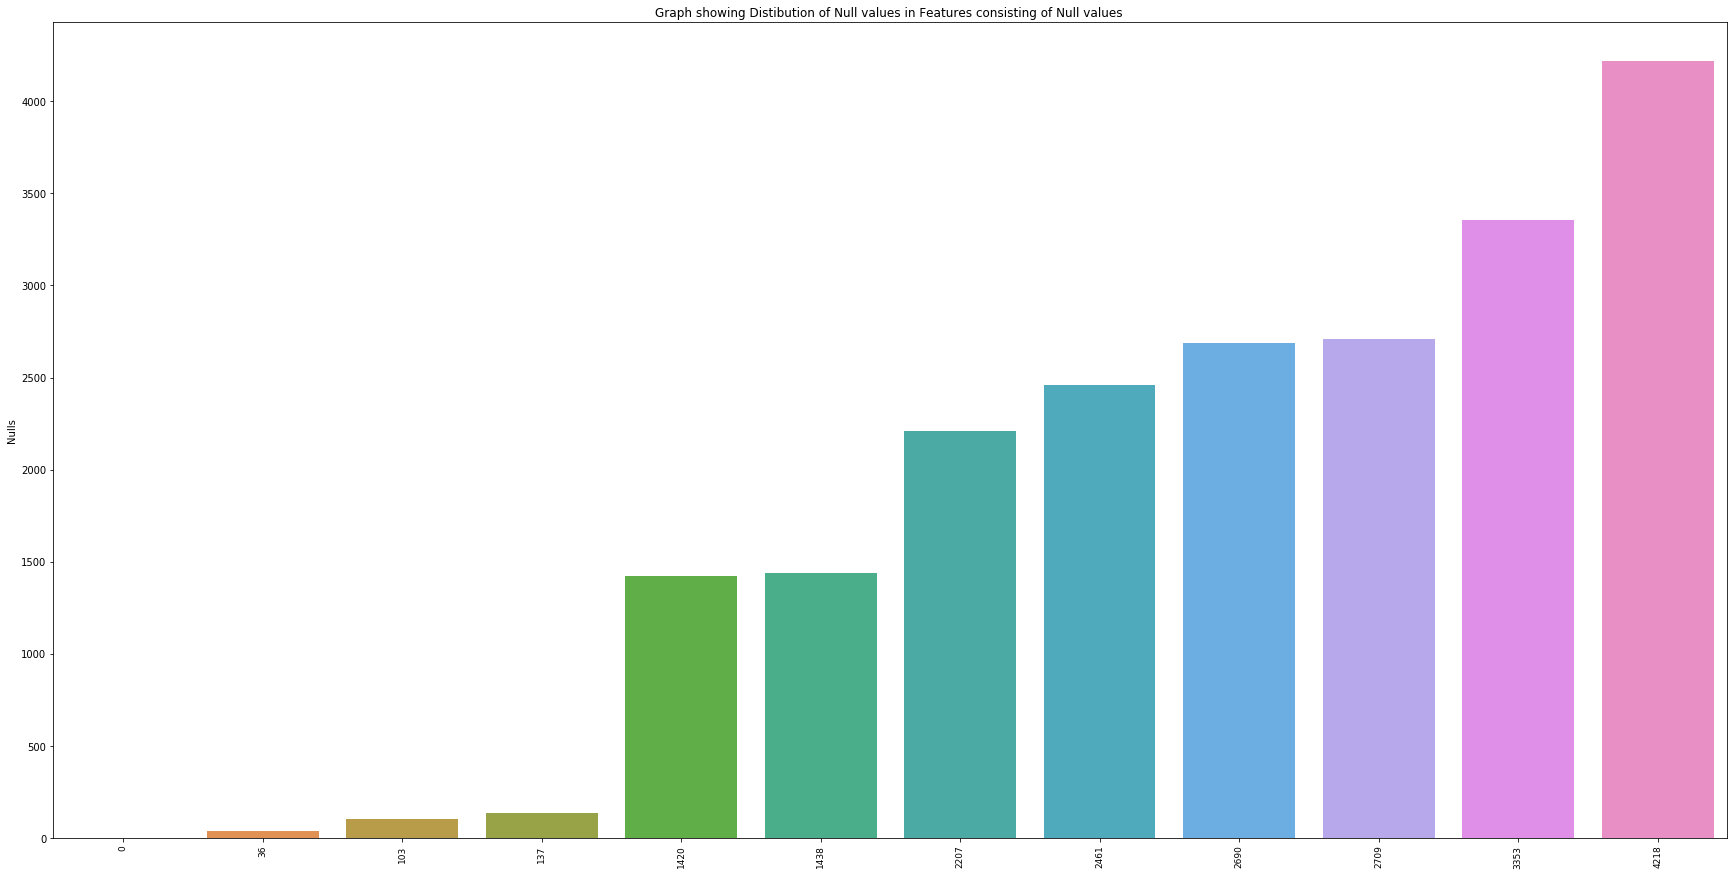

In [19]:
plt.figure(figsize=(30,15))
sns.barplot(y=df_Null['Nulls'],x=df_Null.index)
plt.title('Graph showing Distibution of Null values in Features consisting of Null values ')
plt.xticks(rotation =90,fontsize =9)
plt.show()

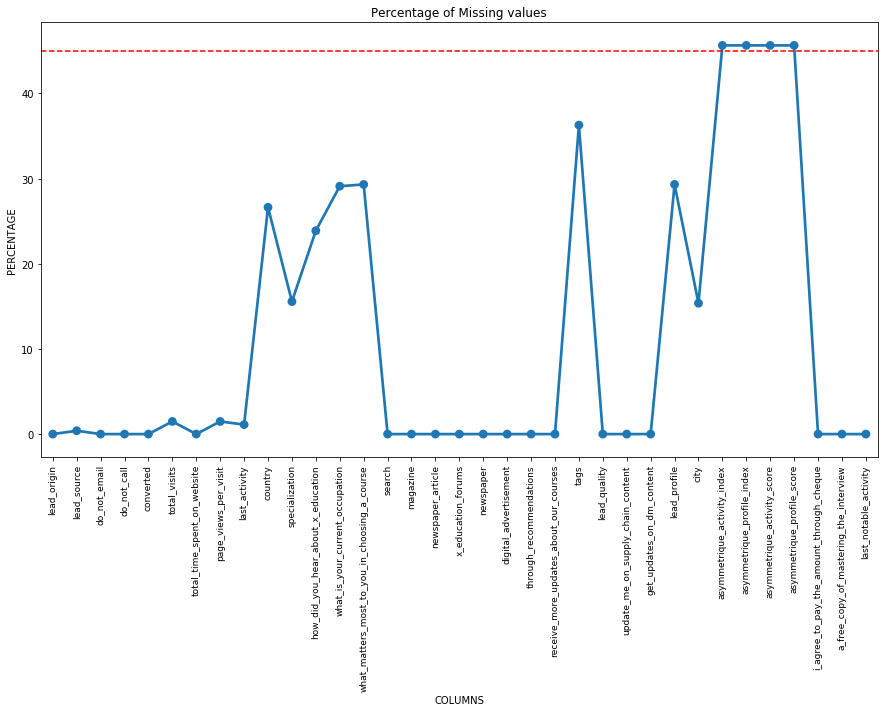

In [20]:
fig = plt.figure(figsize=(15,8))
null_lead = ((LS.isnull().sum())*100/LS.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

# **Null Value Treatment**



In [21]:
LS['lead_source'].describe()

count       9204
unique         7
top       Google
freq        2868
Name: lead_source, dtype: object

In [22]:
LS['country'].describe()

count      6779
unique        2
top       India
freq       6492
Name: country, dtype: object

In [23]:
LS['lead_origin'].value_counts()/len(LS['lead_origin'])*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
others                      0.606061
Name: lead_origin, dtype: float64

In [24]:
LS['city'].value_counts()/len(LS['city'])*100 

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: city, dtype: float64

------------------------------------------------------------

* Plot each variables wrt cat and num attributes.
* Deciding on which imputation to go about mean or mode.

* Plot the variable as is
* Then impute with mean and mode and plot again



In [25]:
LS.isna().sum()

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

## Lead Source

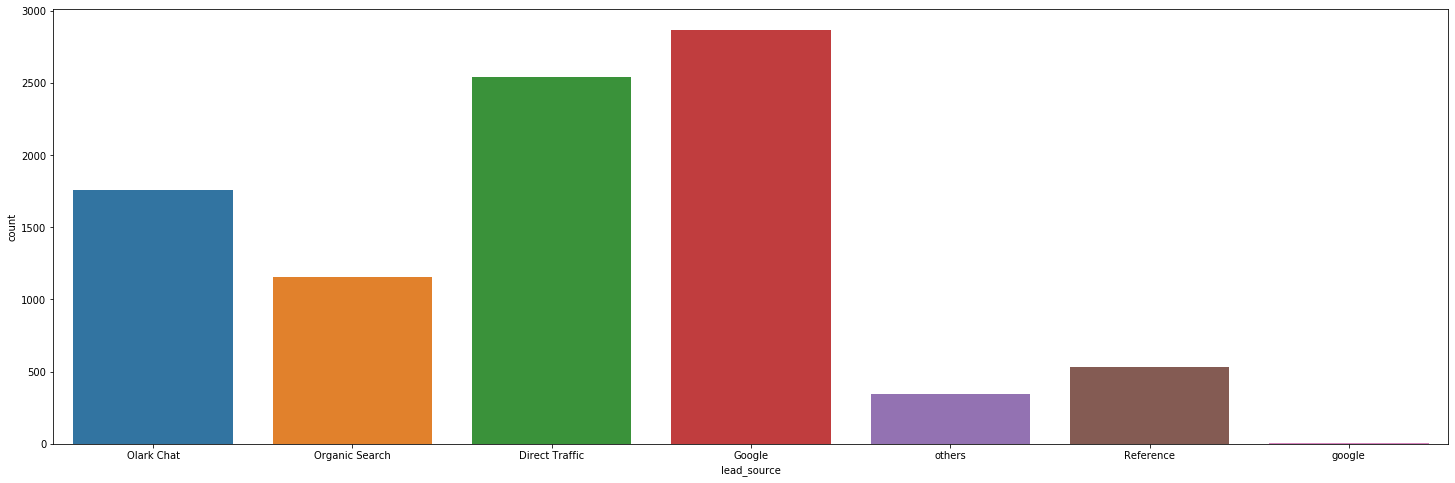

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
others             345
google               5
Name: lead_source, dtype: int64

In [26]:
plt.figure(figsize=(25,8))
sns.countplot(LS['lead_source'])
plt.show()

LS['lead_source'].value_counts()


Lead Source has 0.389 % of missing values and Google is the highest Lead Source generator. Hence we will be replacing missing values in Lead Source with Mode.

## **TotalVisits**

ValueError: cannot convert float NaN to integer

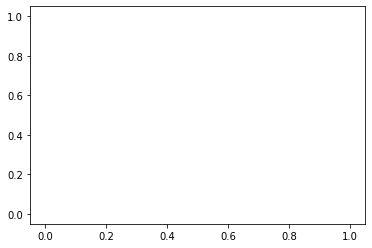

In [27]:
sns.distplot(LS['total_visits'])
plt.show()


From the distribution plot of Total Visits we see that the data is Right Skewed and if we replace it with mean it would become more Skewed.Hence,we replace it with Median.

## Page Views Per Visit

ValueError: cannot convert float NaN to integer

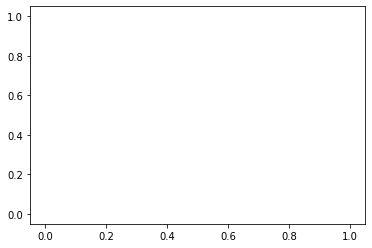

In [34]:
sns.distplot(LS['page_views_per_visit'])
plt.show()


From the distribution plot of Total Visits we see that the data is Right Skewed and if we replace it with mean it would become more Skewed.Hence,we replace it with Median.

## **Last Activity**

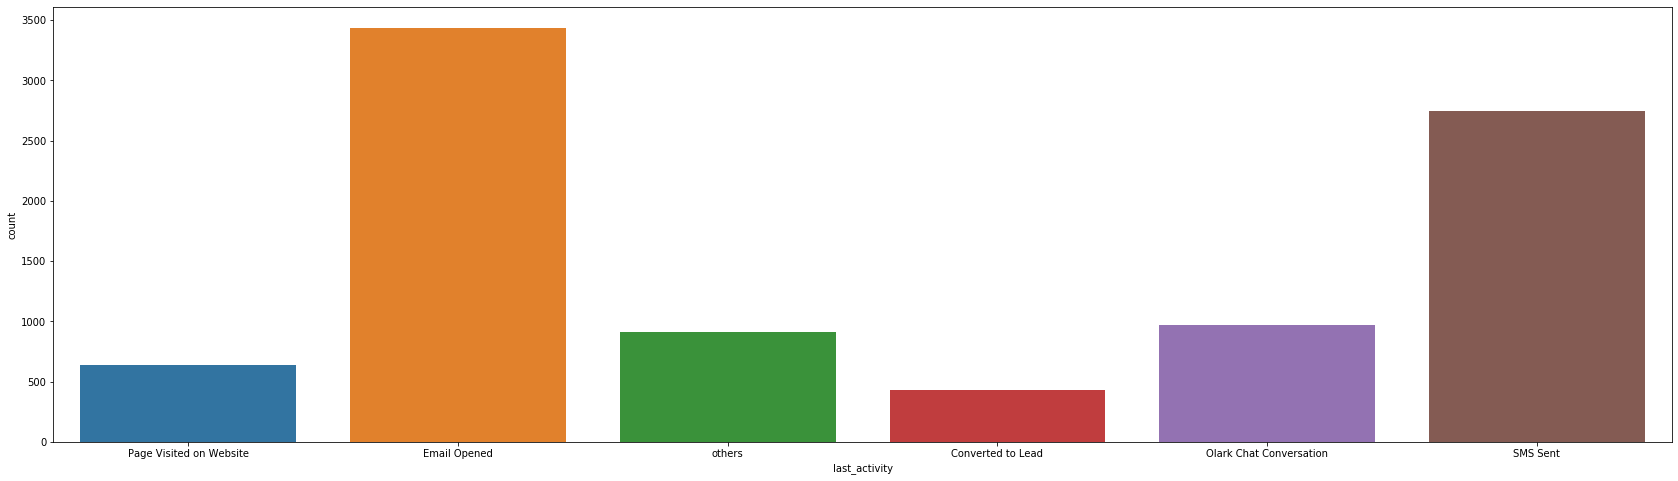

In [35]:
plt.figure(figsize=(29,8))
sns.countplot(LS['last_activity'])
plt.show()                                 


Last Activity has 1.114% of missing values and Email Opened is most highest Last Activity. Hence,we will be replacing missing values in Last Activity with Mode.

## **Country**

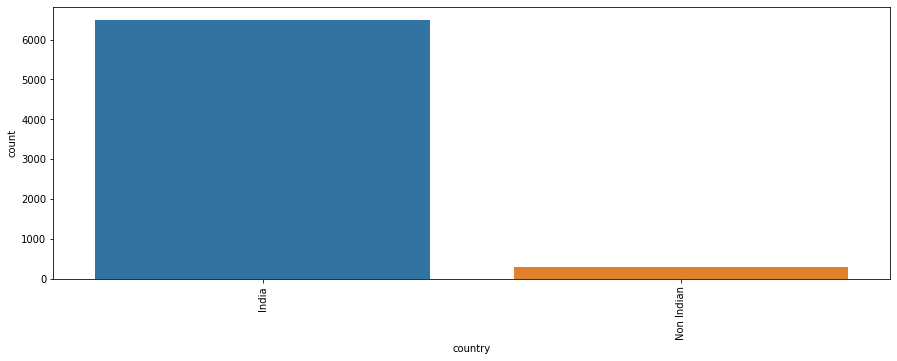

In [36]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS.country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Country has 26.63% of missing values and most of them are India, replacing it with Mode or with bfill method,it doesn't make much difference in the distribution . Hence, we replace it with Back Fill.

## **Specialization**

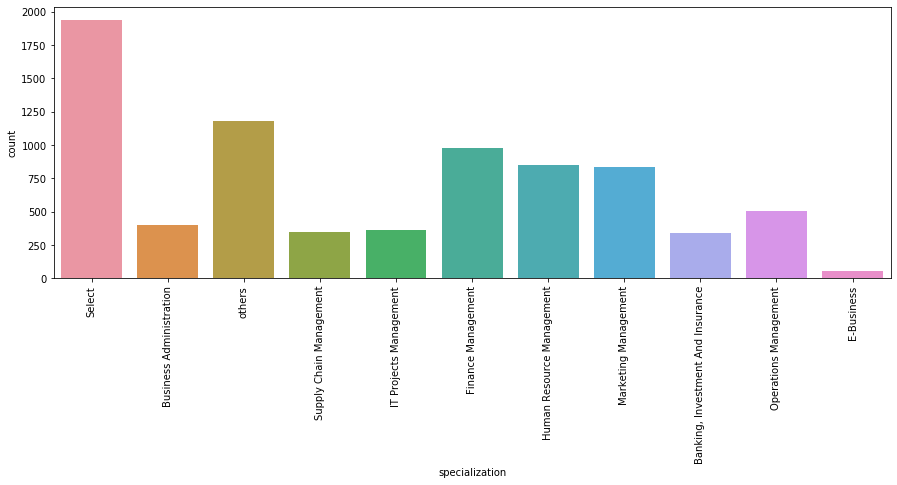

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS.specialization)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


For this column,we can see mostly values goes to select and we will be assuming select as nan value and replacing with mode is not a good idea. So we will be using method to fill null values.

##  **How did you hear about X Education**

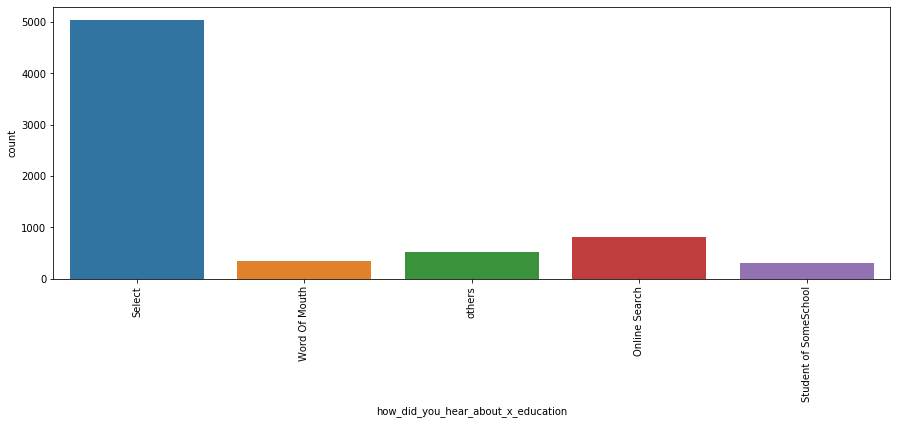

In [38]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['how_did_you_hear_about_x_education'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


We can see mostly values goes to select and we will be assuming select as nan value and replacing with method is not a good idea because it doesn't fill all the null values. So we will be using mode to fill null values.

## **What is your current occupation**


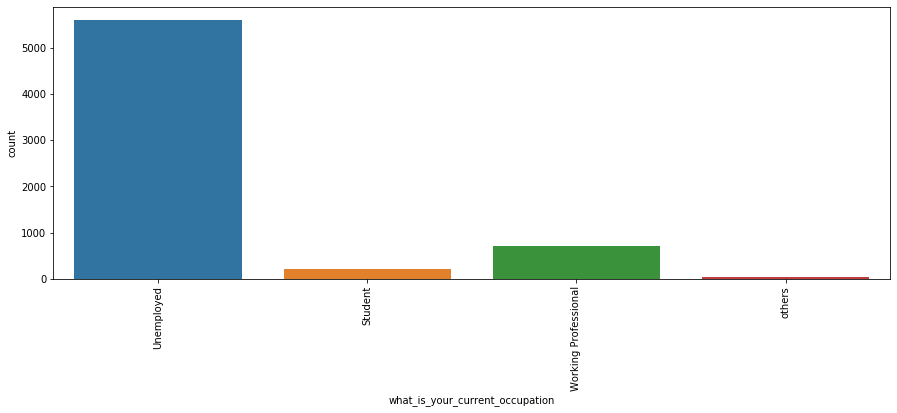

In [39]:

plt.figure(figsize=(15,5))
s1=sns.countplot(LS['what_is_your_current_occupation'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Replacing with mode is not a good idea. So we will be using method to fill null values.

## **What matters most to you in choosing a course**

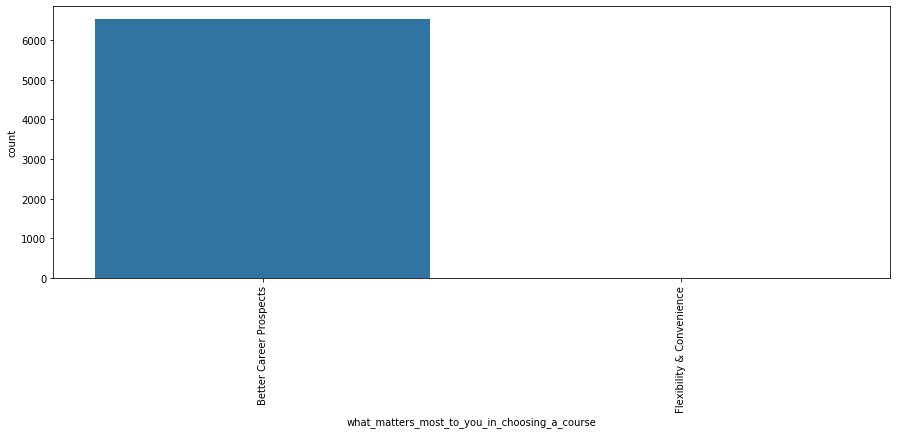

In [40]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['what_matters_most_to_you_in_choosing_a_course'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()



Here 29.3% are missing values and replacing with mode is not a good idea because the data will become more skewed. So we will be using method to fill null values.

## **Tags:**

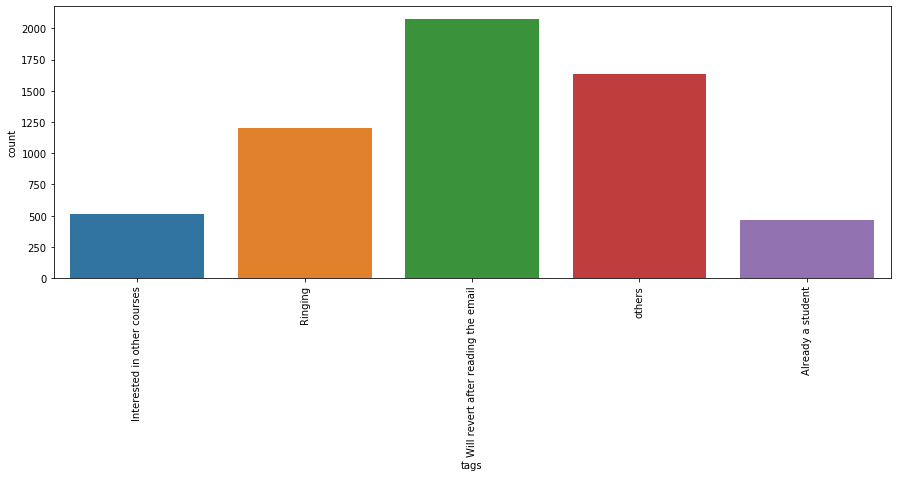

0.19013935759354045

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['tags'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

LS['tags'].value_counts().skew()


Here 36.28% are missing values and replacing with mode is not a good idea because the data will become more skewed. So we will be using method to fill null values.


## **Lead Quality**

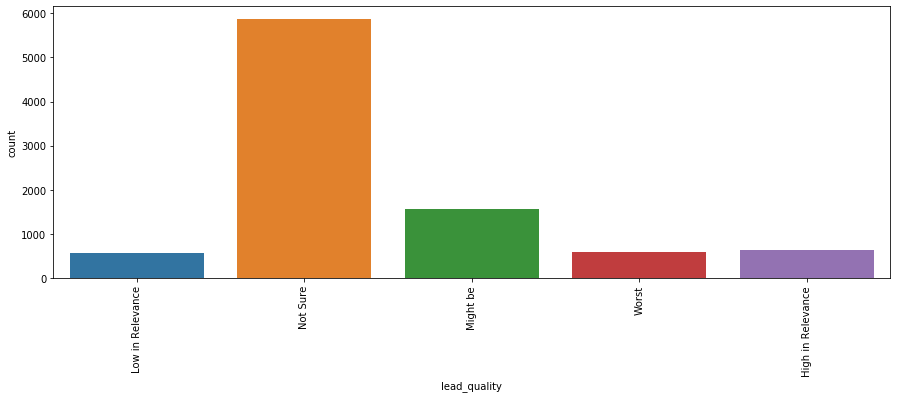

In [42]:
plt.figure(figsize=(15,5))
s1=sns.countplot(LS['lead_quality'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


51% are missing values.Lead Quality gives an idea about the conversion of lead.So replacing it with mode is not appropriate.We will be replacing it with 'not sure' only for EDA and in future we will drop this column


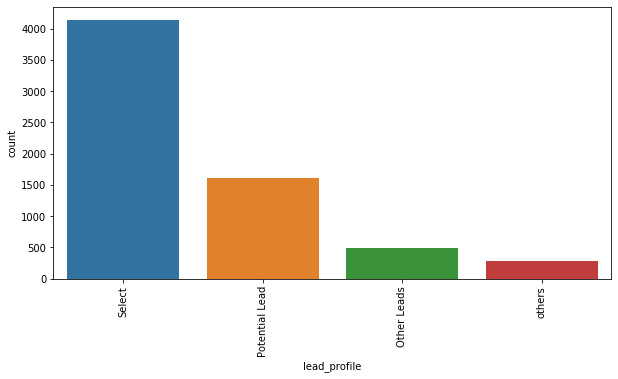

In [43]:
plt.figure(figsize=(10,5))
s1=sns.countplot(LS['lead_profile'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# **Lead Profile**
29% values are missing in Lead Profile.We will be using ffill method to replace null values

## **City**

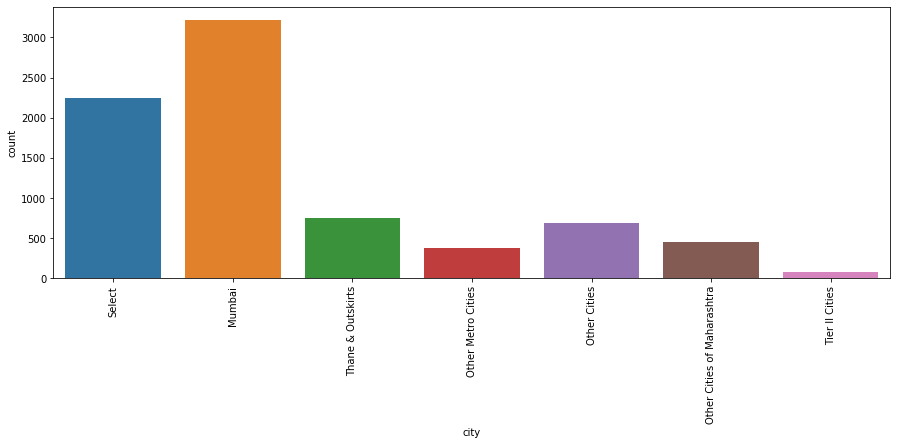

In [44]:

plt.figure(figsize=(15,5))
s1=sns.countplot(LS['city'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


15% are missing values in city column.So we will be using fillna method to replace nan values.First we will be replacing 'select' into 'nan'.As we can't infer anything from select value.

# Replaced 'google' to 'Google' in Lead Score Column

In [45]:
LS['lead_source'].replace({'google':'Google'},inplace=True)
LS = LS.replace('Select', np.nan)

## **Replacing Null Values**

 **Lead source:**
1.	Where lead_origin = lead add form update lead_source as ‘reference’ for null values (33 rows). Mode value with 534 value counts of referencs labels
2.	Where lead_origin = others we are going to update it with ‘others’ (modal value) (2 rows)
3.	Where lead_origin = Landing page submission lead_source will be imputed with because with lead_origin as LPS of the 4886 rows ‘Direct Traffic’ has value counts of 2433 

In [46]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Reference'
    if value == 'others':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'others'
    if value == 'Landing Page Submission':
        LS.loc[(LS.lead_origin == value), 'lead_source'] = 'Direct Traffic'



 **Last Activity**
1.	When lead_origin = Lead Add Form, lead_source = Reference and last_notable activity = Modified we are replacing it with ‘SMS Sent’(modal value)

2.	When lead_origin = others, lead_source = others and last_notable activity = Modified we are replacing it with ‘Email Opened’(modal value)

3.	When lead_origin = others, lead_source = others and last_notable activity = Email Opened we are replacing it with ‘Email Opened’(modal value)

In [47]:
for value in list(LS['lead_origin'].unique()):
    if value == 'Lead Add Form':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='Reference') & (LS.last_notable_activity=='Modified') , 'last_activity'] = 'SMS Sent'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Modified'), 'last_activity'] = 'Email Opened'
    if value == 'others':
        LS.loc[(LS.lead_origin == value) & (LS.lead_source=='others') & (LS.last_notable_activity=='Email Opened'), 'last_activity'] = 'Email Opened'

In [48]:
LS['last_activity'].value_counts()

Email Opened               3416
SMS Sent                   2917
Olark Chat Conversation     972
others                      872
Page Visited on Website     635
Converted to Lead           428
Name: last_activity, dtype: int64

# Specialization

In [49]:
LS['specialization']=LS['specialization'].fillna(method='bfill')

In [50]:
LS['specialization'].isna().sum()

0

In [51]:
LS['total_visits']=LS['total_visits'].fillna(LS['total_visits'].median())
LS['page_views_per_visit']=LS['page_views_per_visit'].fillna(LS['page_views_per_visit'].median())

LS['country']=LS['country'].fillna(method='bfill')
LS['specialization']=LS['specialization'].fillna(method='bfill')
LS['how_did_you_hear_about_x_education']=LS['how_did_you_hear_about_x_education'].fillna(LS['how_did_you_hear_about_x_education'].mode()[0])
LS['what_is_your_current_occupation']=LS['what_is_your_current_occupation'].fillna(method='bfill')
LS['what_matters_most_to_you_in_choosing_a_course']=LS['what_matters_most_to_you_in_choosing_a_course'].fillna(method='bfill')
LS['tags']=LS['tags'].fillna(method='bfill')
LS['lead_quality'] = LS['lead_quality'].replace(np.nan, 'not sure')
# We drop this column later 
LS['lead_profile']=LS['lead_profile'].fillna(method='bfill')
LS['city']=LS['city'].fillna(method='bfill')



In [52]:
LS.isna().sum()

lead_origin                                         0
lead_source                                         0
do_not_email                                        0
do_not_call                                         0
converted                                           0
total_visits                                        0
total_time_spent_on_website                         0
page_views_per_visit                                0
last_activity                                       0
country                                             0
specialization                                      0
how_did_you_hear_about_x_education                  0
what_is_your_current_occupation                     0
what_matters_most_to_you_in_choosing_a_course       0
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                   

# **Separating Numerical and categorical columns:**

In [53]:
LS_num=LS.select_dtypes(include=np.number)
LS_num=LS_num.iloc[:, 1:-2] 
LS_num.head()

total_visits  total_time_spent_on_website  page_views_per_visit
0           0.0                            0                   0.0
1           5.0                          674                   2.5
2           2.0                         1532                   2.0
3           1.0                          305                   1.0
4           2.0                         1428                   1.0

In [54]:
LS_cat=LS.select_dtypes(include=object)
LS_cat.head()


lead_origin     lead_source do_not_email do_not_call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission  Direct Traffic           No          No   

             last_activity country           specialization  \
0  Page Visited on Website   India  Business Administration   
1             Email Opened   India  Business Administration   
2             Email Opened   India  Business Administration   
3                   others   India                   others   
4        Converted to Lead   India  Supply Chain Management   

  how_did_you_hear_about_x_education what_is_your_current_occupation  \
0                      Online Search                      Unemployed   
1                      Online Search                      Unemployed   
2                      Online Search                         Student   
3                      Word Of Mouth                      Unemployed   
4                             others                      Unemployed   

  what_matters_most_to_you_in_choosing_a_course  ...      lead_quality  \
0                       Better Career Prospects  ...  Low in Relevance   
1                       Better Career Prospects  ...          Not Sure   
2                       Better Career Prospects  ...          Might be   
3                       Better Career Prospects  ...          Not Sure   
4                       Better Career Prospects  ...          Might be   

  update_me_on_supply_chain_content get_updates_on_dm_content    lead_profile  \
0                                No                        No  Potential Lead   
1                                No                        No  Potential Lead   
2                                No                        No  Potential Lead   
3                                No                        No  Potential Lead   
4                                No                        No  Potential Lead   

     city asymmetrique_activity_index asymmetrique_profile_index  \
0  Mumbai                   02.Medium                  02.Medium   
1  Mumbai                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  i_agree_to_pay_the_amount_through_cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  a_free_copy_of_mastering_the_interview last_notable_activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 29 columns]

# ** Outlier treatment (for numerical columns)**

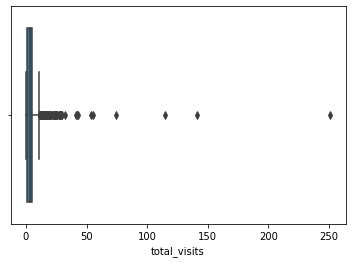

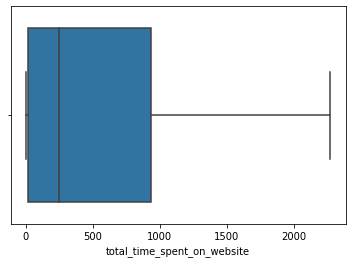

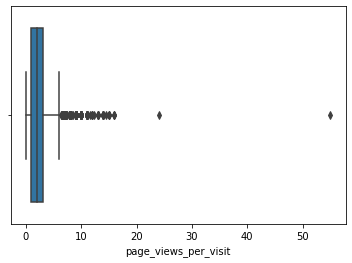

In [55]:
for i in LS_num.columns:
    sns.boxplot(LS[i])
    plt.show()

In [56]:
q1=LS_num['total_visits'].quantile(0.25)
q3=LS_num['total_visits'].quantile(0.75)
IQR=q3-q1
UB=q3+IQR*1.5
LB=q1-IQR*1.5

In [57]:
list1= LS[LS['total_visits']>UB]['lead_source'].unique()
label=[]

for value in list1:
    label.append(LS[LS['lead_source']==value])

In [58]:
label[0][['total_visits','page_views_per_visit']]

total_visits  page_views_per_visit
2              2.0                  2.00
3              1.0                  1.00
4              2.0                  1.00
6              2.0                  2.00
8              2.0                  2.00
...            ...                   ...
9235           8.0                  2.67
9236           2.0                  2.00
9237           2.0                  2.00
9238           3.0                  3.00
9239           6.0                  3.00

[4996 rows x 2 columns]

In [59]:
for col in LS_num:
    q1=LS_num[col].quantile(0.25)
    q3=LS_num[col].quantile(0.75)
    IQR=q3-q1
    UB=q3+IQR*1.5
    LB=q1-IQR*1.5
    #list1= LS[LS['total_visits'].isnull()]['lead_origin'].unique()
    #label=[]
    for i in  LS['lead_source'].unique():
        LS_num.loc[(LS_num[col] > UB ) , col] = LS[LS['lead_source']==i][col].quantile(0.99)
        LS_num.loc[(LS_num[col] < LB ) , col] = LS[LS['lead_source']==i][col].quantile(0.01)

In [60]:
#for col in LS_num[['total_visits', 'page_views_per_visit']]:
 #   q1=LS_num[col].quantile(0.25)
  #  q3=LS_num[col].quantile(0.75)
   # IQR=q3-q1
    #UB=q3+IQR*1.5
    #LB=q1-IQR*1.5
    #LS_num[LS_num[col]>UB]= LS_num[col].quantile(0.99)
    #LS_num[LS_num[col]<LB]= LS_num[col].quantile(0.01)

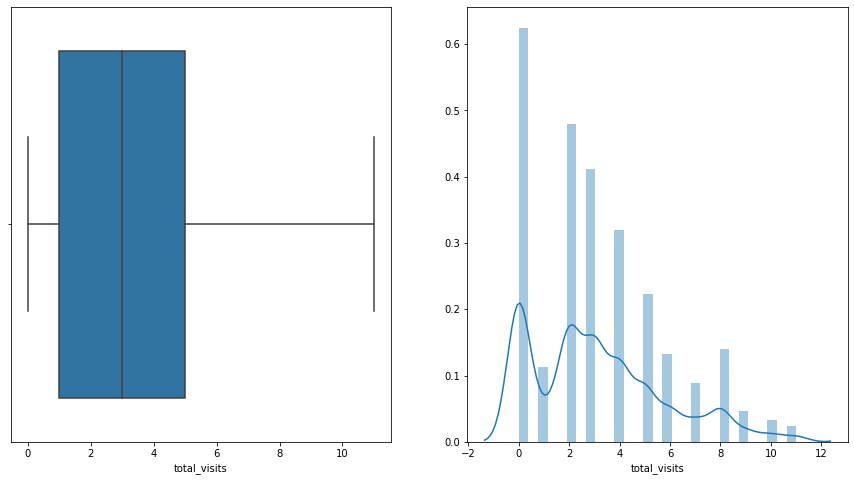

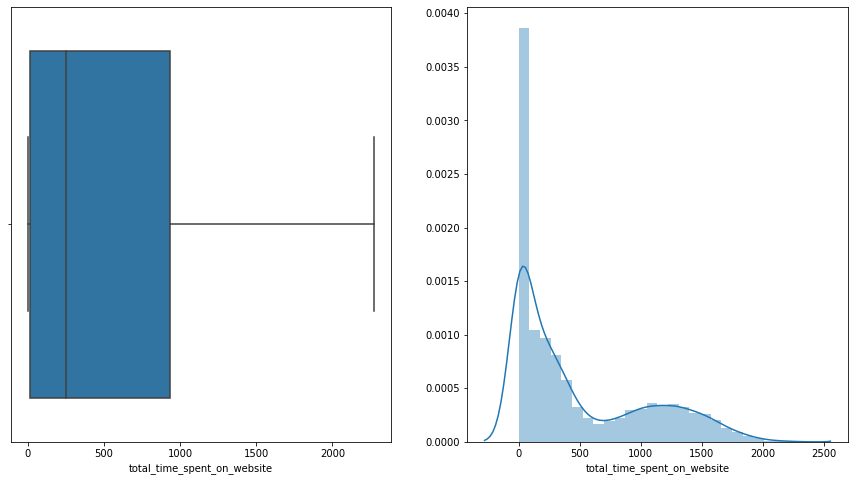

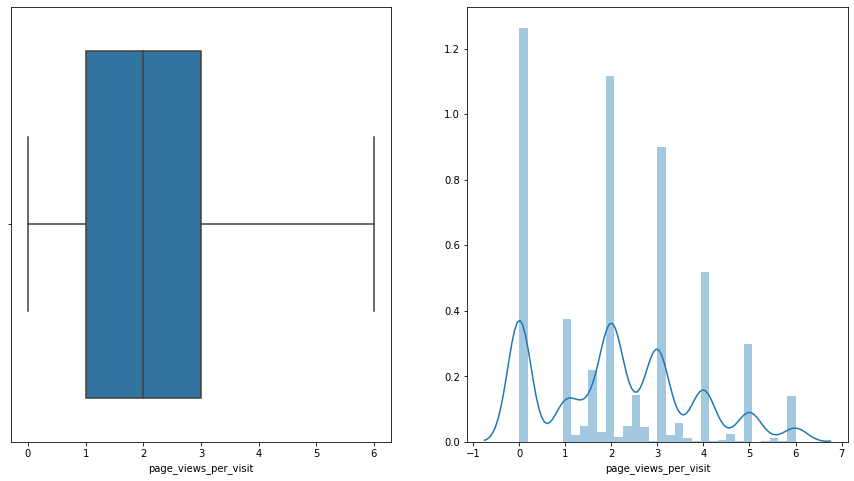

In [61]:
for col in LS_num:
    fig, ax= plt.subplots(1,2, figsize=(15,8))
    sns.boxplot(LS_num[col], ax=ax[0])
    sns.distplot(LS_num[col], ax=ax[1])
    plt.show()

# **Creating file for Tableau Dashboard**

In [62]:
LS1.columns


NameError: name 'LS1' is not defined

In [ ]:
LS1.head(2)

In [ ]:
#Exporting CSV file
LS1.to_csv("LS1.xls")

In [ ]:
from google.colab import files
files.download("LS1.xls")

# **Univariate Analysis**

## **'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'**

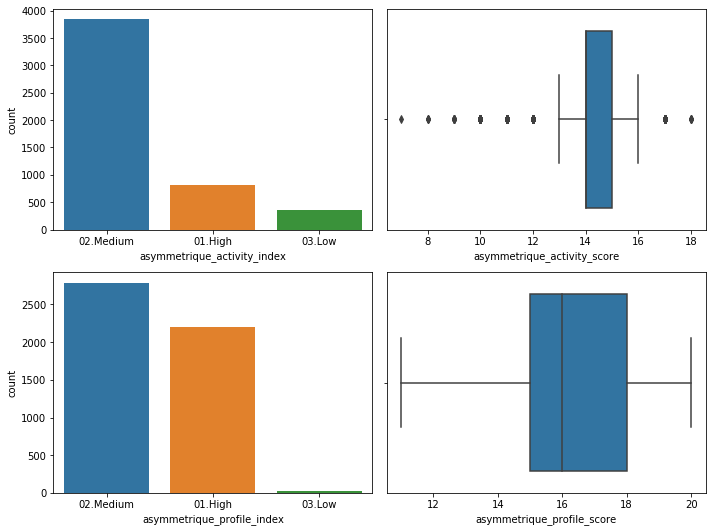

In [66]:
fig, ax = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(LS['asymmetrique_activity_index'], ax = ax[0,0])
plt2 = sns.boxplot(LS['asymmetrique_activity_score'], ax = ax[0,1])
plt3 = sns.countplot(LS['asymmetrique_profile_index'], ax = ax[1,0])
plt4 = sns.boxplot(LS['asymmetrique_profile_score'], ax = ax[1,1])
plt.tight_layout()
plt.show()

These variables are a customized index and respective scores generated from the activity/profile of a lead. 

Asymmetrique Activity Index and Asymmetrique Activity Score are assigned once a lead is assessed by X education on basis of other features like TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity.

1. 'Asymmetrique Activity Index'- Leads with 01.High and 03.Low activity index are low in numbers as these leads generally do not spend too much time on the website. Maximum leads spend a good amount of time on the website and are of index 02.Medium

2. 'Asymmetrique Activity Score'- The combination of activity actions are assigned numerical values for each lead. As the index 02.Medium has highest count, consequently, activity scores lie in  13 to 16. The 01.High index leads generate the outliers above the IQR and 03.Low index leads generate the outliers below the IQR 


Asymmetrique Profile Index and Asymmetrique Profile Score are assigned once a lead is assessed by X education on basis of other features like specialization, current occupation and what matters most in choosing a course.

3. 'Asymmetrique Profile Index' - Leads with 03.Low profile index are low in numbers as we have few leads coming from a non-relevant background. Generally, people with relevant background visit the website to upskill and are indexed as 01.High and people with semi-relevant background visit the website to garner more skills.

4. 'Asymmetrique Profile Score'- The combination of profile features of a lead are assigned numerical values. As the index 02.Medium has highest count, consequently, activity scores lie in  15 to 18. 01.High index profiles are having a score above 18


45% of the records do not have these values assigned, so we need to drop these columns as it is not reliable to impute any value in it. 


In [ ]:
#LS =LS.drop(['asymmetrique_activity_index','asymmetrique_activity_score','asymmetrique_profile_index','asymmetrique_profile_score'],1)
#LS_cat =LS_cat.drop(['asymmetrique_activity_index','asymmetrique_profile_index'],1)
#LS_num=LS_num.drop(['asymmetrique_activity_score','asymmetrique_profile_score'],axis=1)

In [ ]:
LS1.columns

## **'Do Not Call', 'Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums','Through Recommendations'**

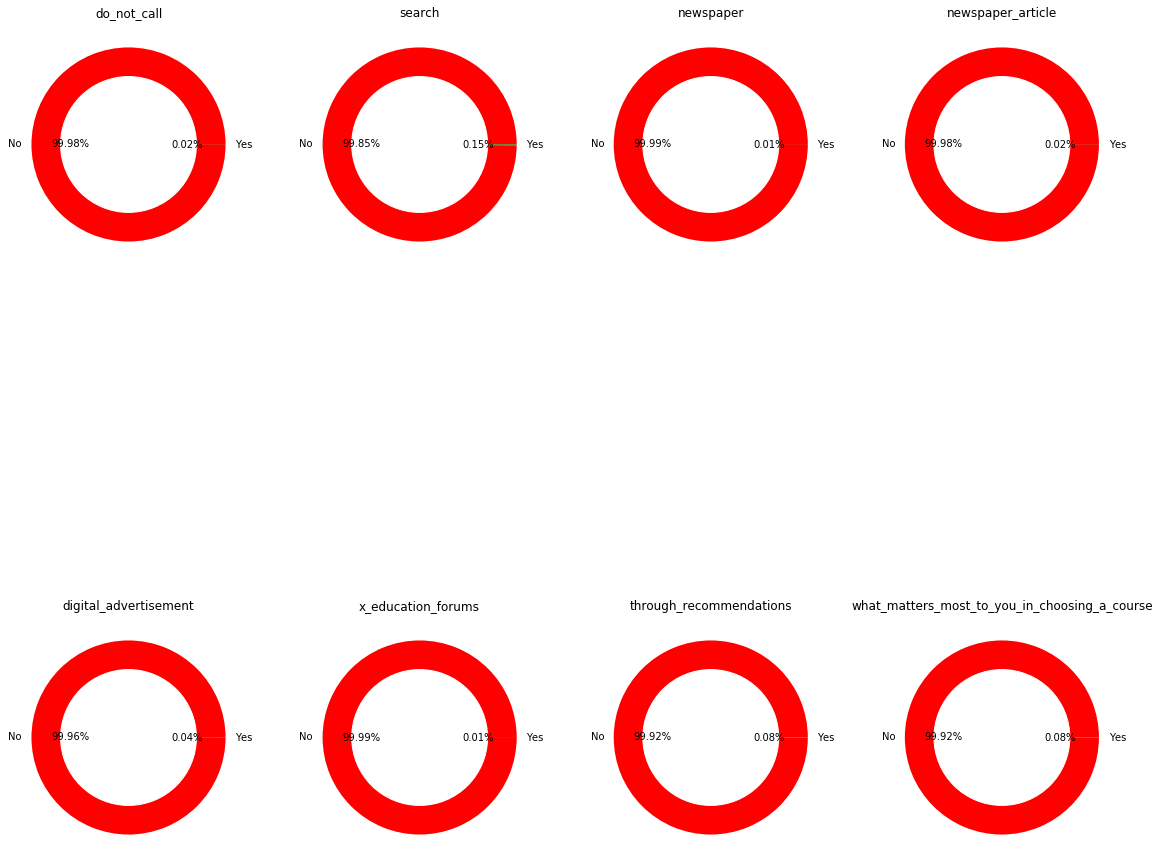

In [67]:

def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = LS[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.2f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

col = ['do_not_call', 'search', 'newspaper', 'newspaper_article', 'digital_advertisement', 'x_education_forums','through_recommendations','what_matters_most_to_you_in_choosing_a_course']
plt.figure(figsize = (20,20))
i=1
for each_col in col:
    plt.subplot(2,4 ,i)
    pieplot(each_col)
    i+=1

For the above columns Do Not Call, Search, Newspaper, Newspaper Article, Digital Advertisement, X Education Forums, Through Recommendations:  maximum values are same, so we cannot generate any insight for lead conversion from this data. Hence, we will drop these columns.

In [68]:
LS_cat= LS_cat.drop(['do_not_call', 'search', 'newspaper', 'newspaper_article', 'digital_advertisement', 'x_education_forums', 'through_recommendations','what_matters_most_to_you_in_choosing_a_course'],1)

## **Categorical Columns**

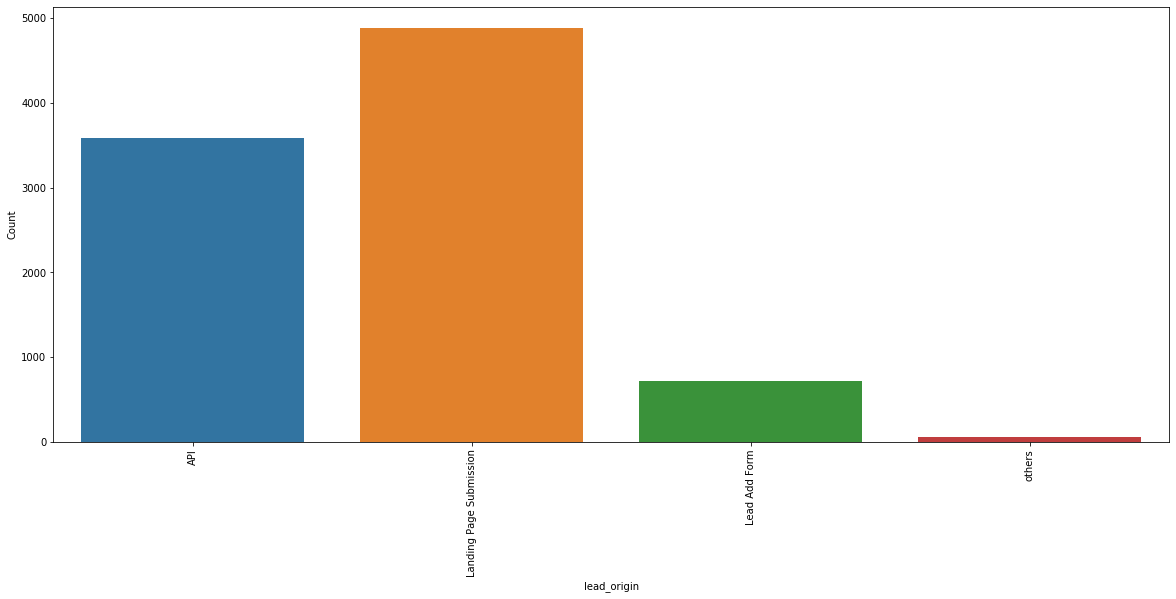

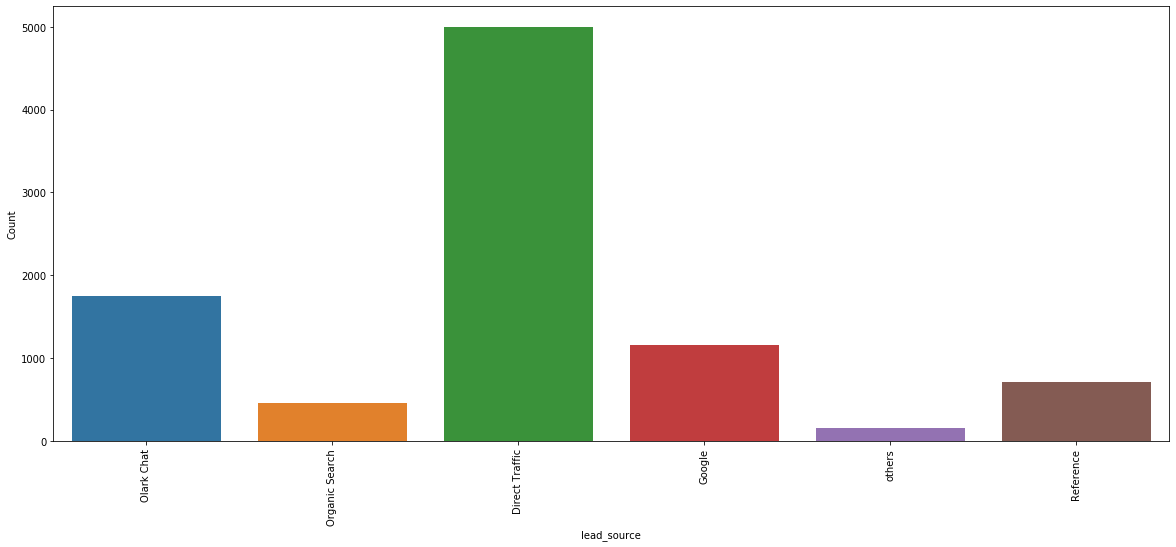

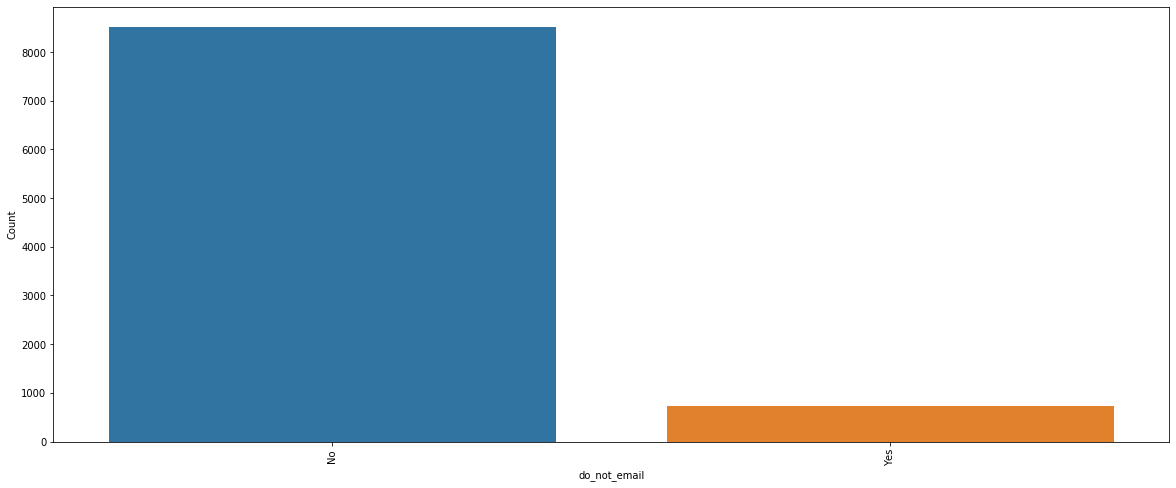

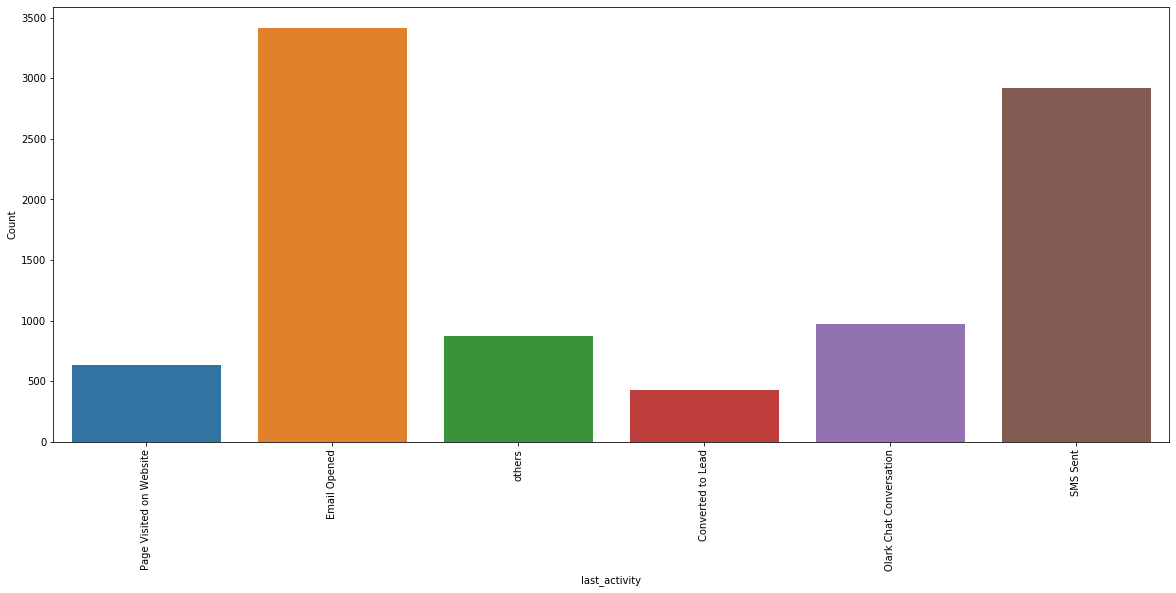

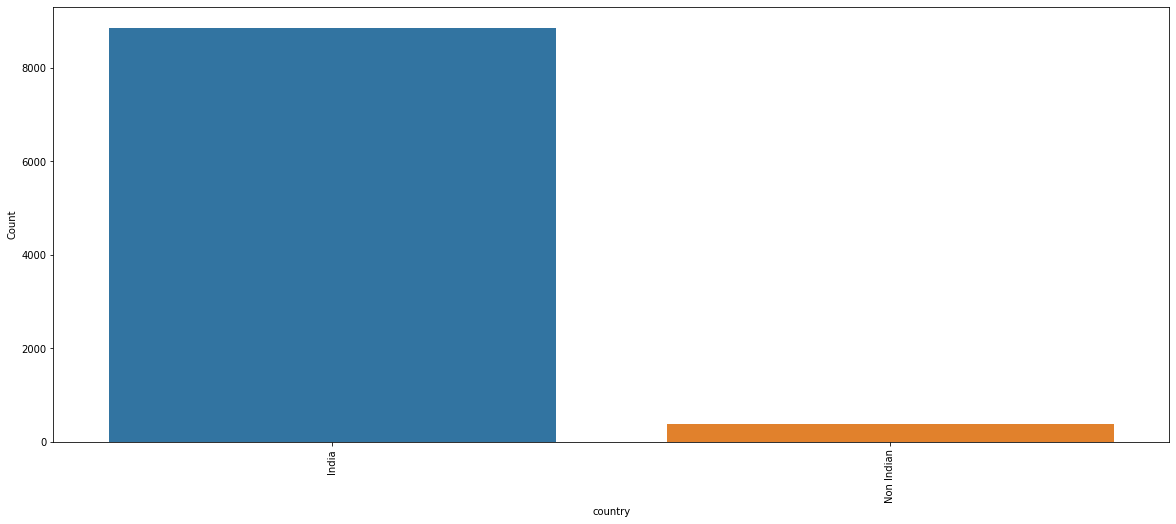

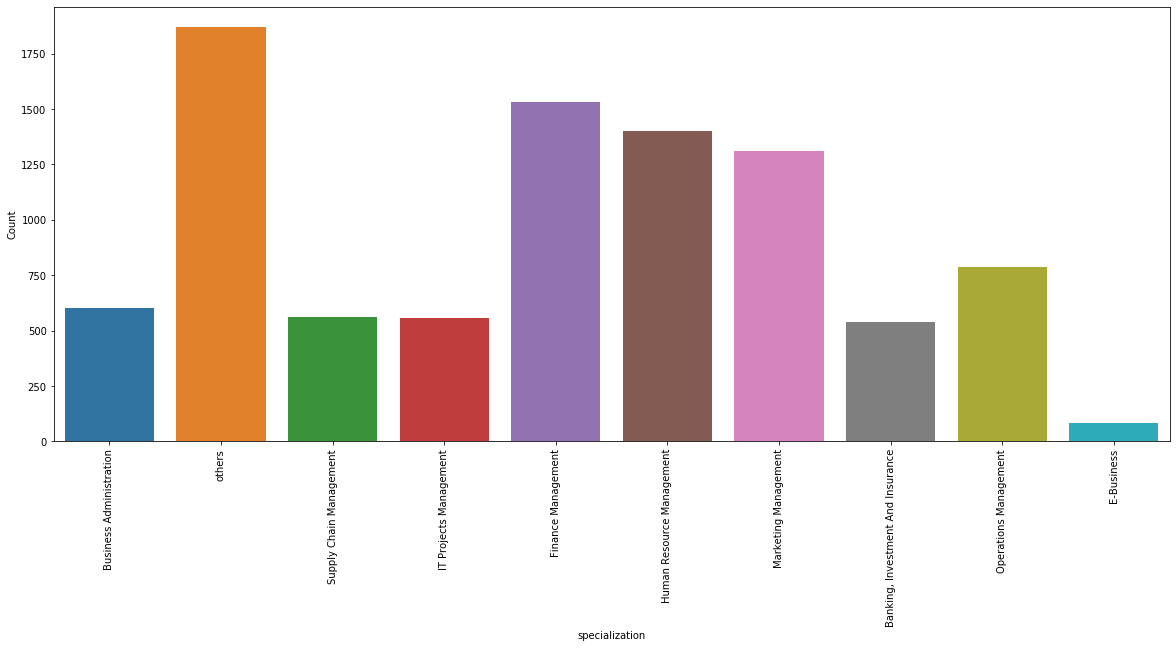

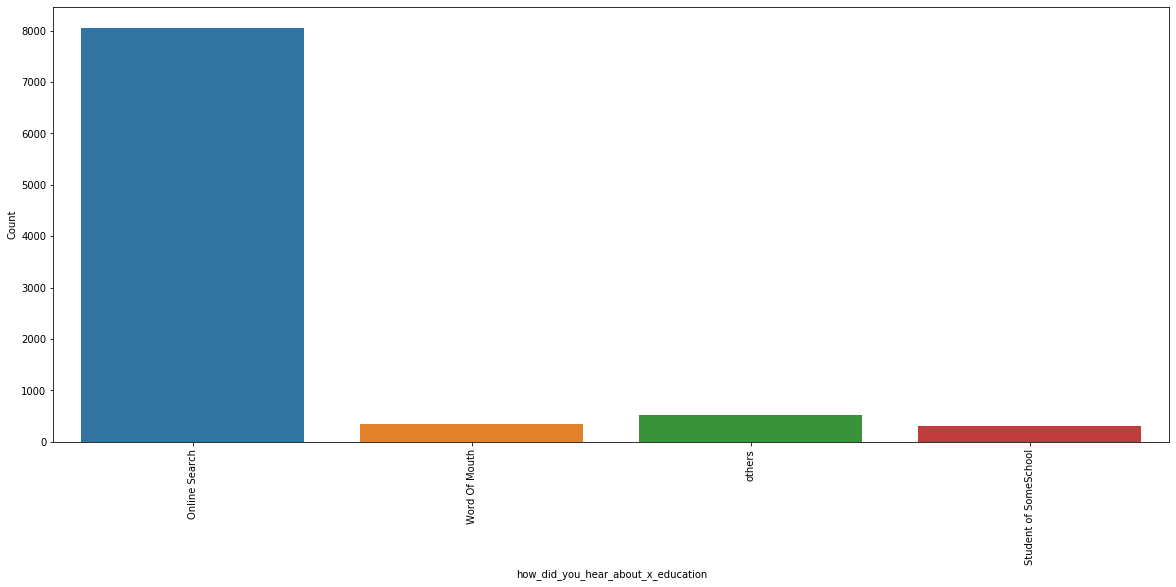

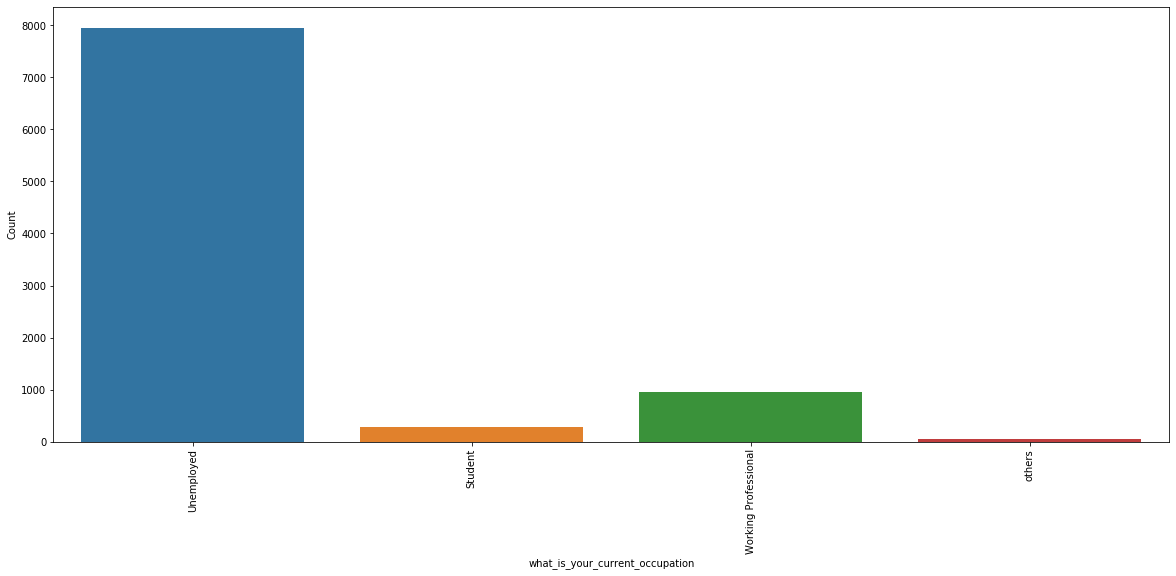

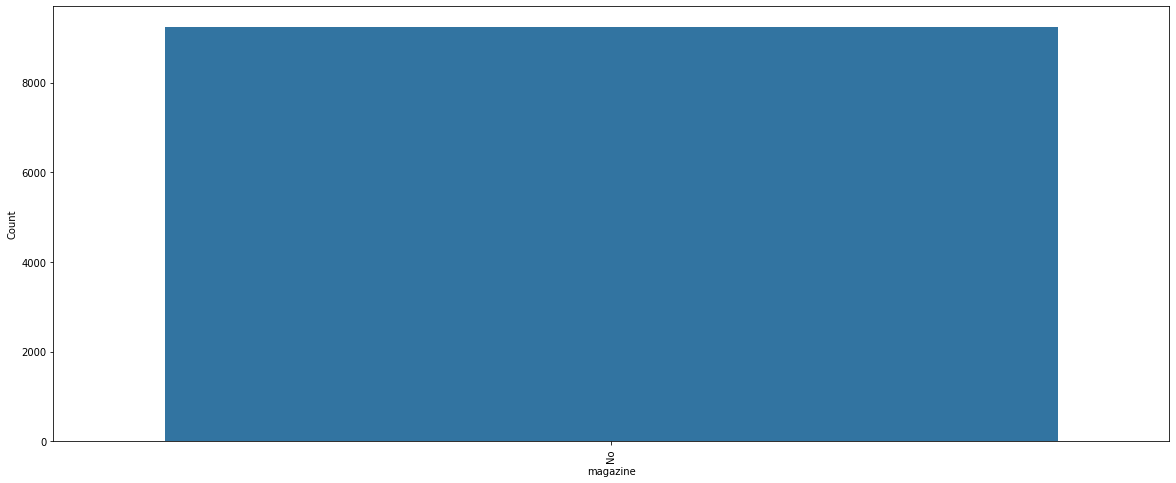

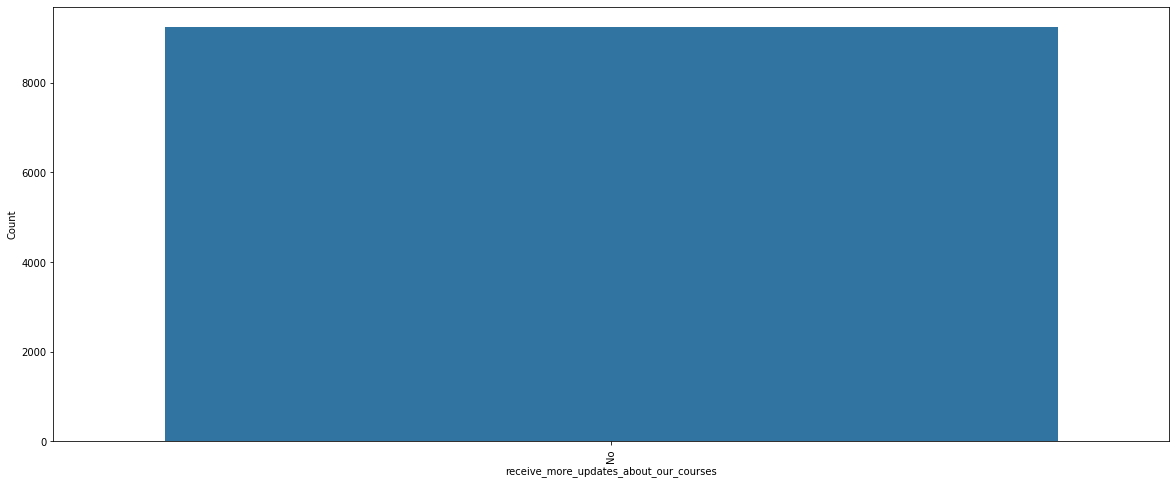

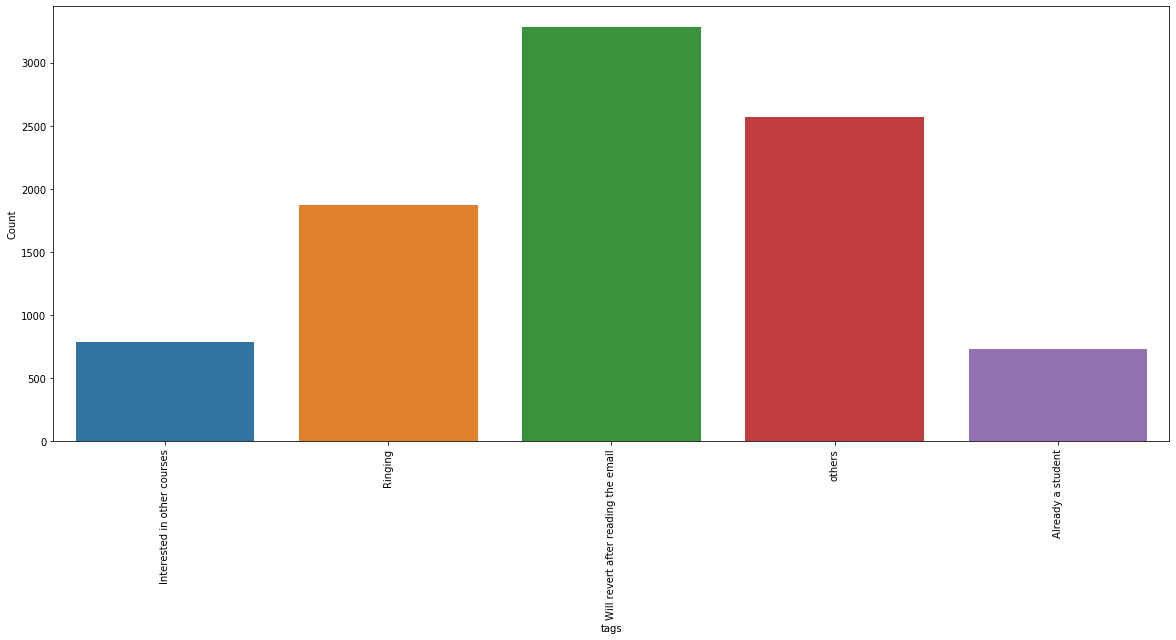

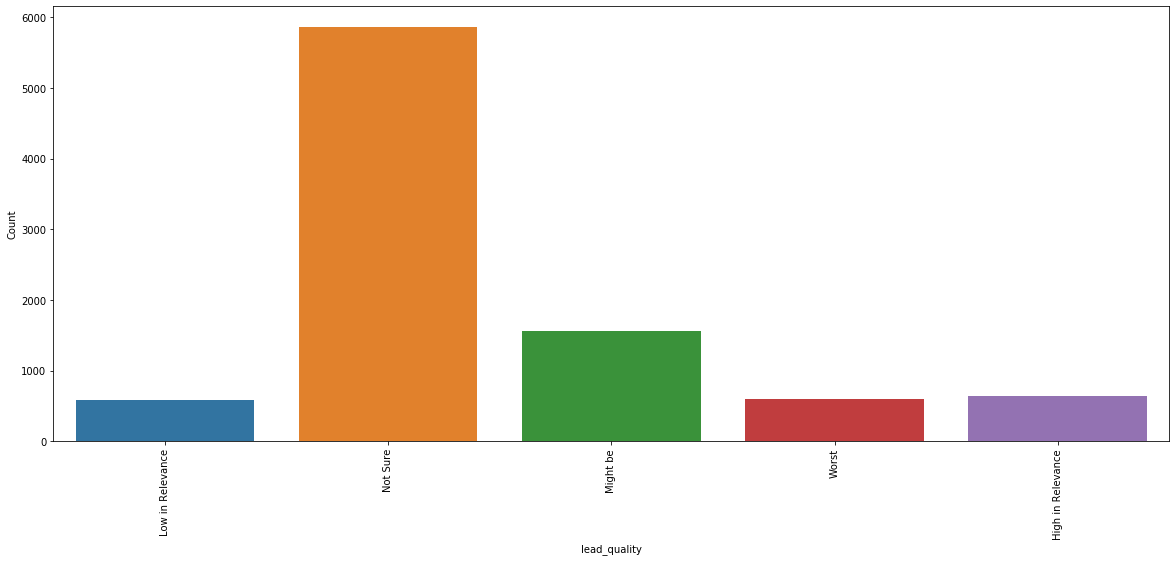

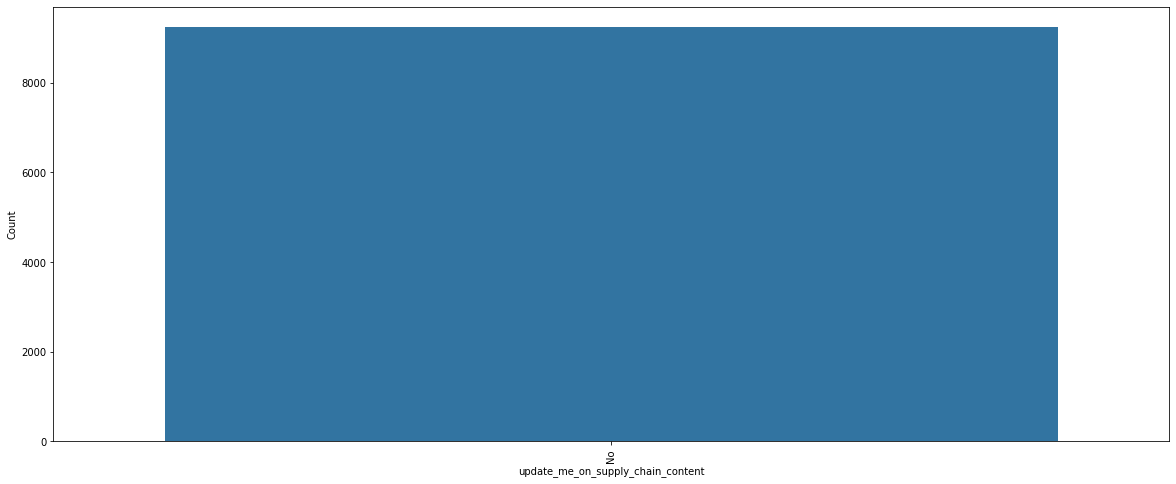

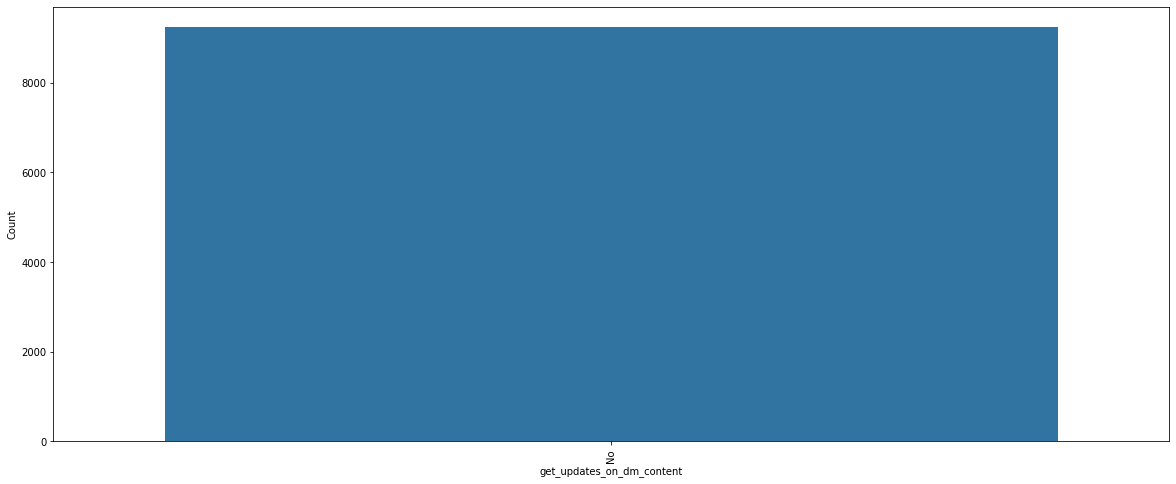

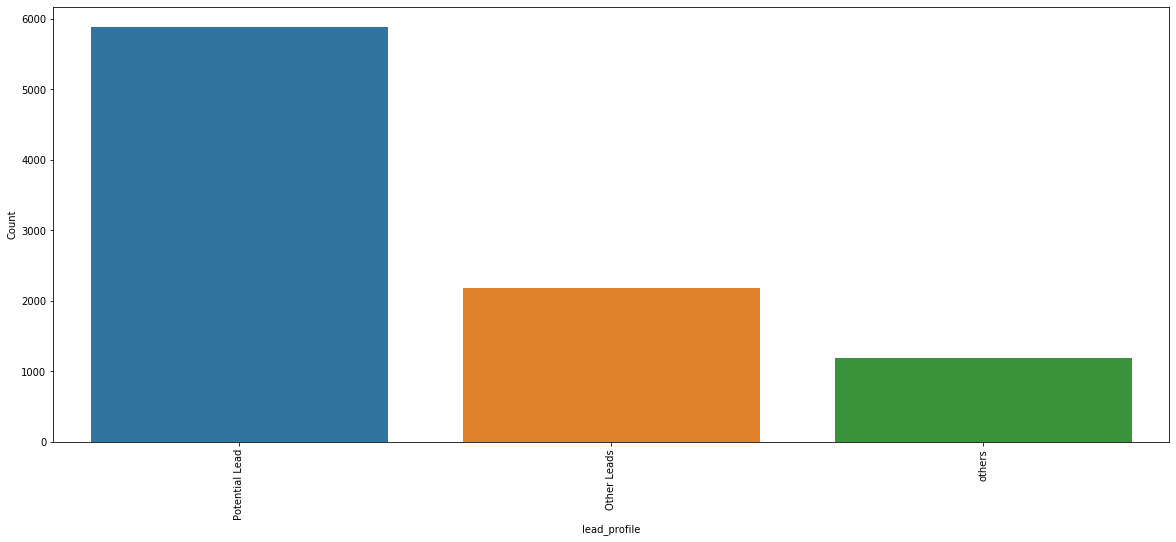

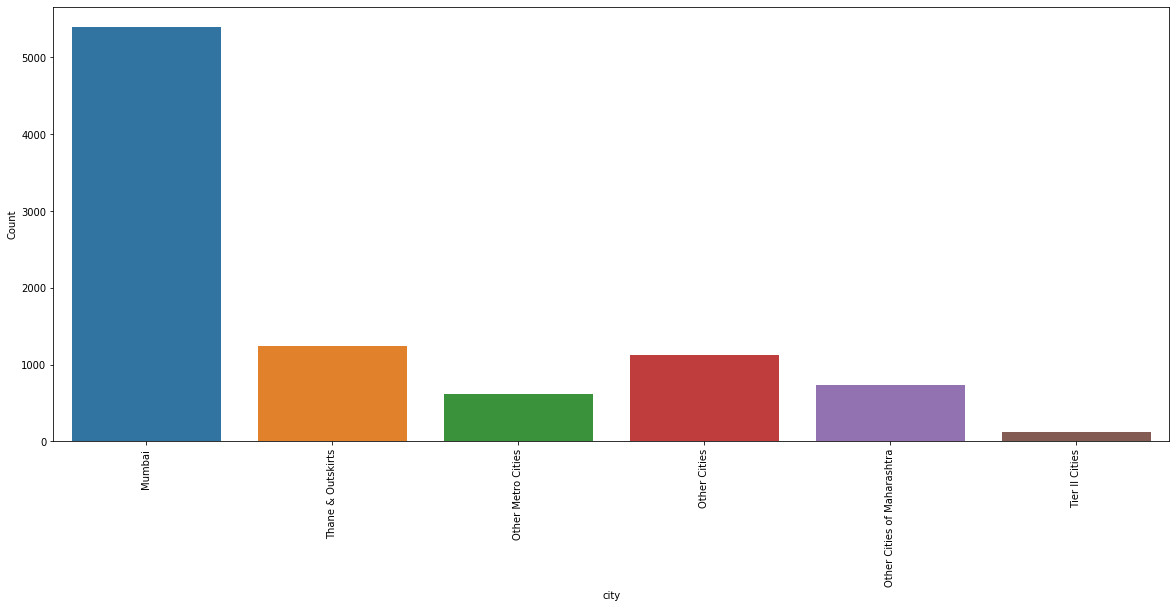

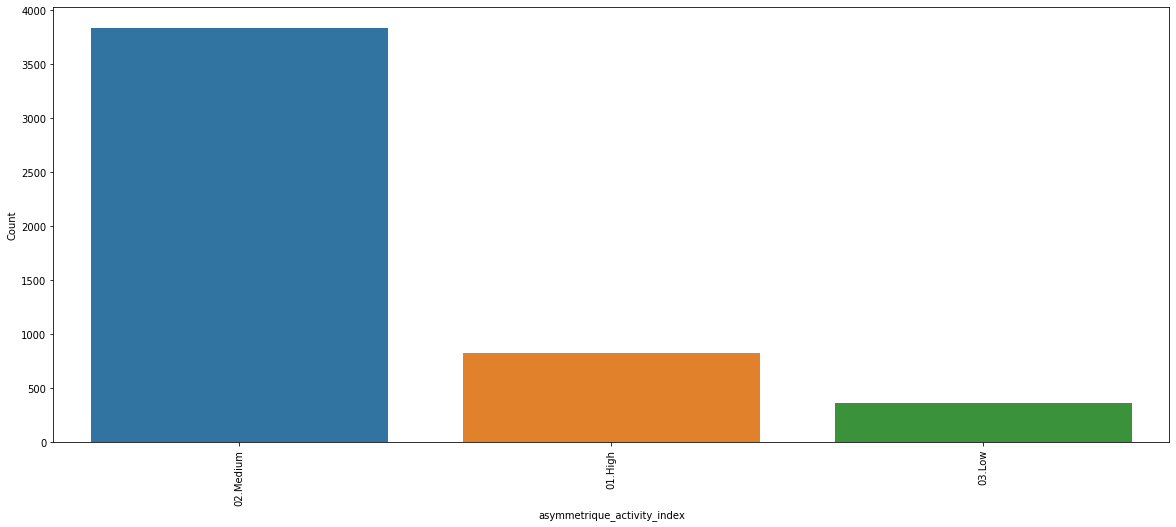

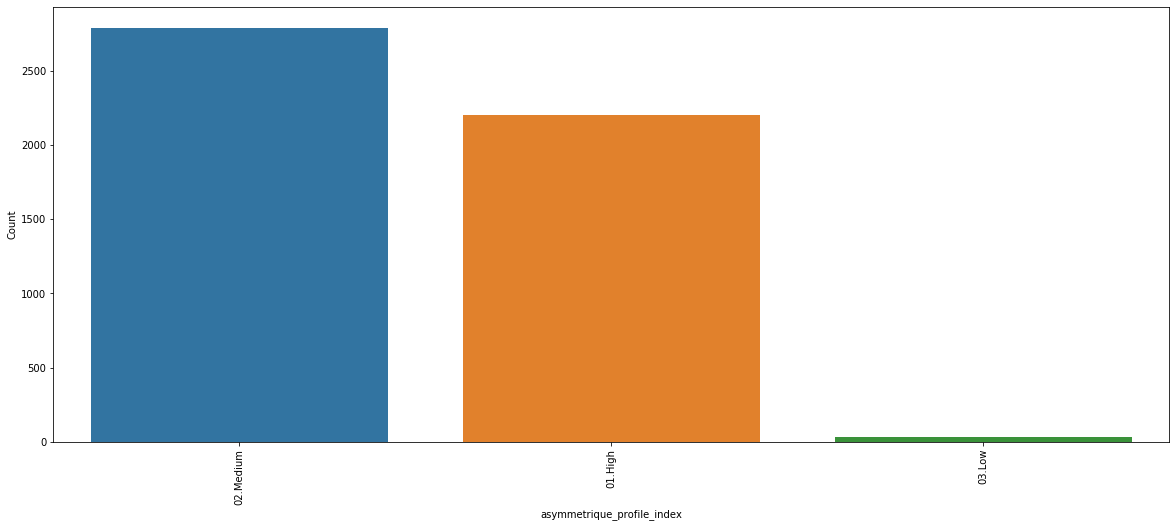

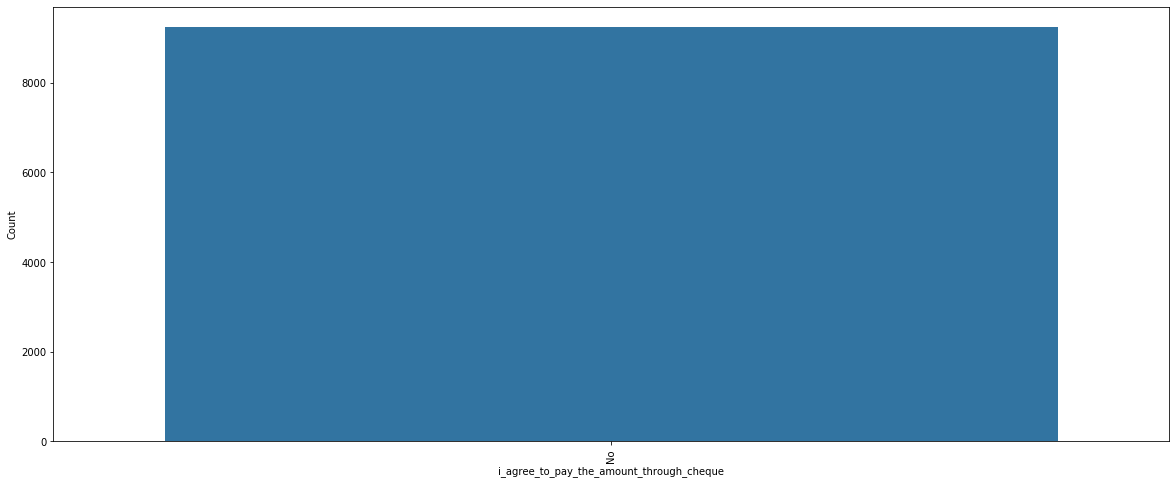

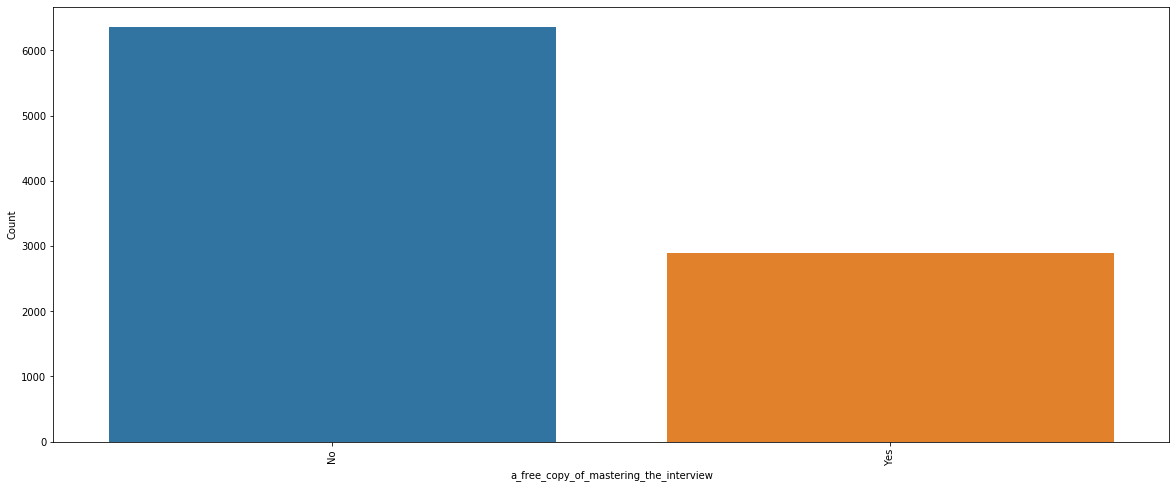

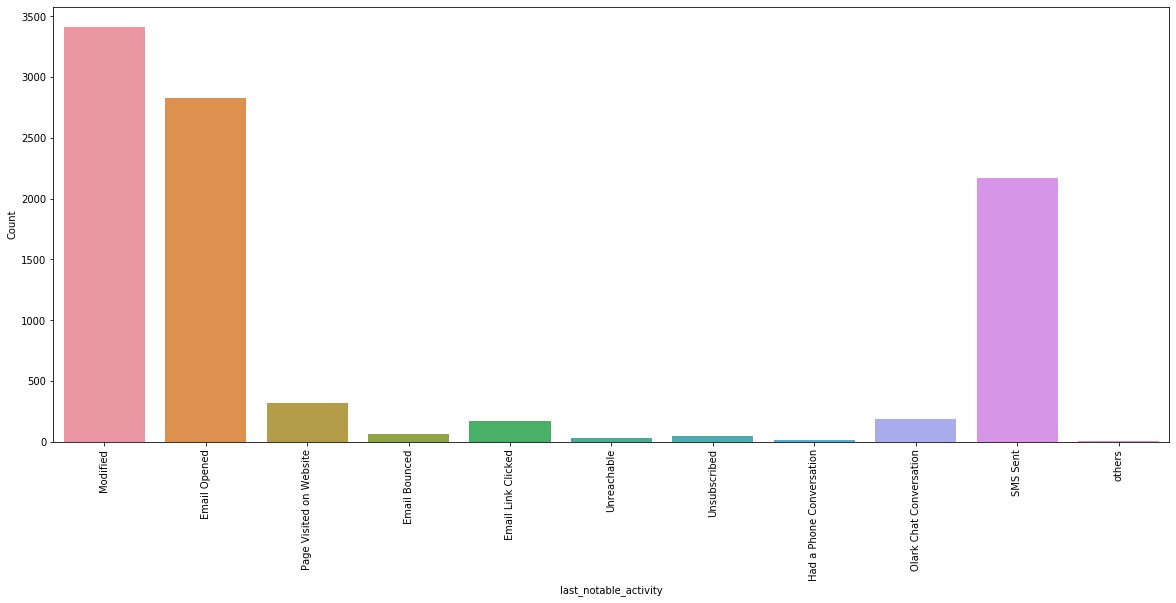

In [69]:
for i in LS_cat.columns:
    plt.subplots(figsize=(20,8))
    sns.countplot(LS_cat[i])
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

1. **LEAD ORIGIN**- The maximum number of leads are generated through Landing Page Submission.Others generates the lowest number of leads
The main lead generators are Landing Page Submission (4886),
API (3580).

2. **LEAD SOURCE**- The leads are generated from 6 different sources, highest of which are generated through Direct Traffic(5000) , Olark Chart(1755), and Google(1500).

3. **DO NOT EMAIL**- Majority of the people are ok with receiving email (~92%)
People who are ok with email has conversion rate of 40%
People who have opted out of receive email has lower rate of conversion (only 15%)

4. **LAST ACTIVITY**- The last activity by leads was majorly on Email Opened(3437), SMS Sent(2745) and Olark Chat Conversation(973)

5. **COUNTRY**- The highest leads are generated from India(8861) and other countries(387)

6. **SPECIALIZATION**- Others and Finance Management is most common specialization  which people searched for on the website.

7. **How Did you hear about X Education**- The maximum leads are generated through Online Search(8058). Others are Word of Mouth ,others and Student of Some School


8. **What is your current occupation**- Maximum leads  are generated from people who are unemployed(~85%)

9. **What matters most to you in choosing this course**-  Maximum leads have mentioned that better career prospect matters the most.

10. **Magazine**- It only contains No, so will not generate any insight. Hence, we will drop this column.

11. **Receive More Updates About Our Courses**- - It only contains no. So will not generate any insight. Hence, we will drop this column.

12. **Tags**- The maximum leads generated do revert after reading email(3170) and others 

13. **Lead Quality**- Most of the candidates are assessed as  Not Sure(5872) ,Might be(1760),and High in Relevance(837) leads.

14. **Update me on Supply Chain Content**:No customer wants updates on Supply Chain Content. It only contains no. So will not generate any insight. Hence, we will drop this column.

15. **Get updates on DM Content**:No customer wants updates on the DM Content.It only contains no. So will not generate any insight. Hence, we will drop this column.

16. **Lead Profile**:A lead level assigned to each customer based on their profile. 5875 customer has highest potential lead

17. **City**:Mostly customers belong to Mumbai(6891)

18. **I agree to pay the amount through cheque**:No body has agreed to pay the amount through cheque. Hence, we will drop this column

19. **A free copy of Mastering The Interview**- Most leads (~68%) opt out of free copy of the book Mastering The Interview

20. **Last Notable Activity**- Most notable activities of the leads were account Modified(36.8%), Email Opened(30.5%) and SMS Sent (23.5%)

In [70]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation', 'magazine',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [71]:
## Dropping 3,5,10,11,14,15,18,19
LS_cat= LS_cat.drop(['do_not_email','country','magazine','receive_more_updates_about_our_courses','update_me_on_supply_chain_content','get_updates_on_dm_content','i_agree_to_pay_the_amount_through_cheque','a_free_copy_of_mastering_the_interview'],1)

In [72]:
LS_cat.head()

lead_origin     lead_source            last_activity  \
0                      API      Olark Chat  Page Visited on Website   
1                      API  Organic Search             Email Opened   
2  Landing Page Submission  Direct Traffic             Email Opened   
3  Landing Page Submission  Direct Traffic                   others   
4  Landing Page Submission  Direct Traffic        Converted to Lead   

            specialization how_did_you_hear_about_x_education  \
0  Business Administration                      Online Search   
1  Business Administration                      Online Search   
2  Business Administration                      Online Search   
3                   others                      Word Of Mouth   
4  Supply Chain Management                             others   

  what_is_your_current_occupation                                 tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       lead_quality    lead_profile    city asymmetrique_activity_index  \
0  Low in Relevance  Potential Lead  Mumbai                   02.Medium   
1          Not Sure  Potential Lead  Mumbai                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure  Potential Lead  Mumbai                   02.Medium   
4          Might be  Potential Lead  Mumbai                   02.Medium   

  asymmetrique_profile_index last_notable_activity  
0                  02.Medium              Modified  
1                  02.Medium          Email Opened  
2                    01.High          Email Opened  
3                    01.High              Modified  
4                    01.High              Modified

## **Numerical Columns**

In [73]:
LS_num.head()

total_visits  total_time_spent_on_website  page_views_per_visit
0           0.0                          0.0                   0.0
1           5.0                        674.0                   2.5
2           2.0                       1532.0                   2.0
3           1.0                        305.0                   1.0
4           2.0                       1428.0                   1.0

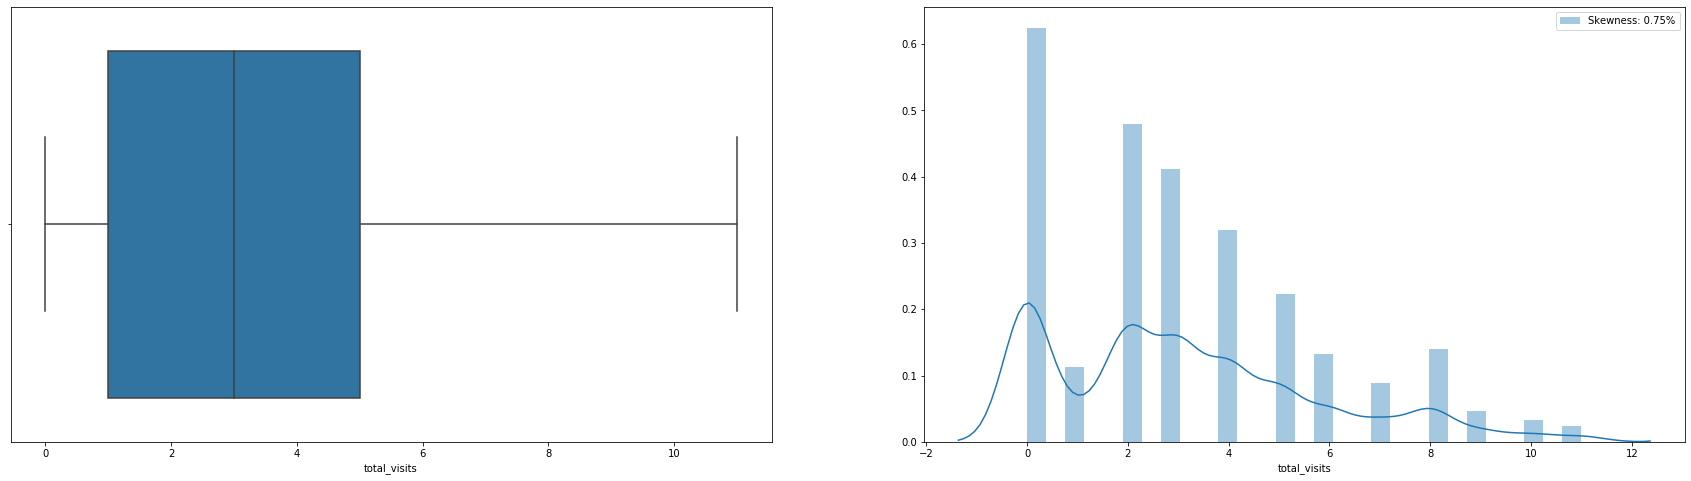

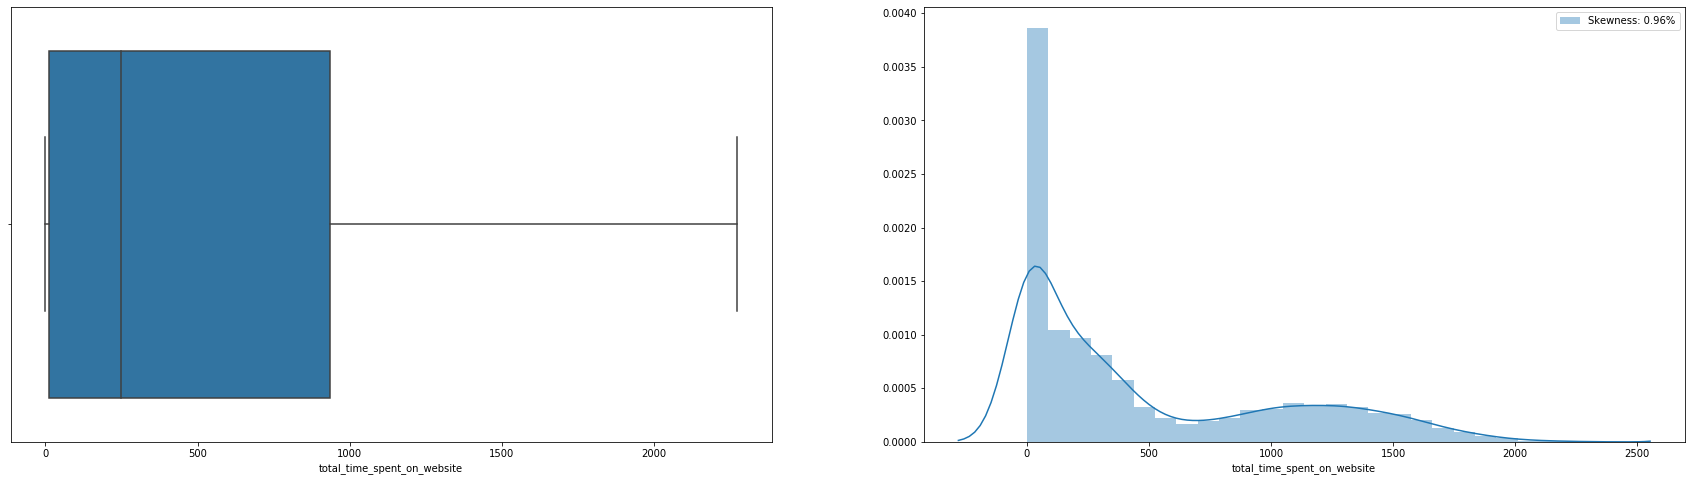

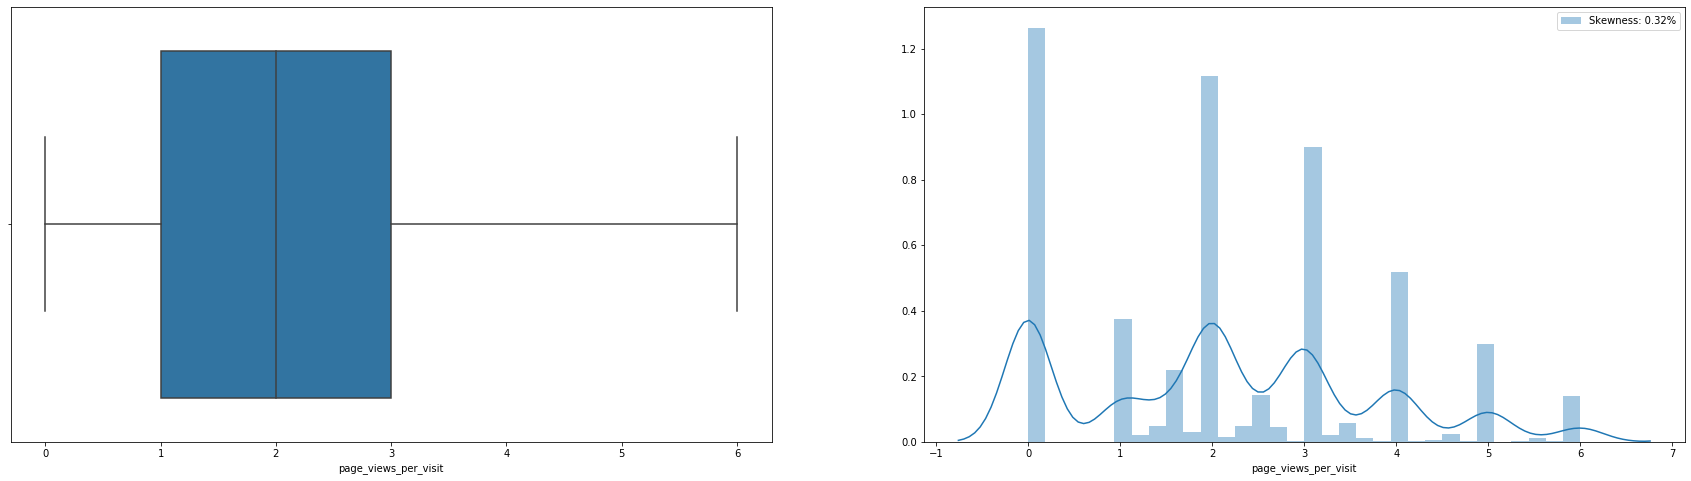

In [74]:
for col in LS_num:
  fig, ax=  plt.subplots(1, 2, figsize=(30,8))
  sns.boxplot(LS_num[col], ax=ax[0])
  sns.distplot(LS_num[col], ax=ax[1], label='Skewness: %.2f%%'%(LS_num[col].skew()))
  plt.legend()
  plt.show()

1. **Total Visits**
The distribution is slightly right skewed with 0.75 skewness.
As per the distribution, less visits come from people  who tend to visit the site once and never come back. The customers who want to gain an idea about X education  visit 1-5 times. The highest visits come from the most engaged customers, creating the skewness in the distribution.


2. **Total Time Spent on Website**
The distribution is right skewed with 0.96 skewness. 
As per the distribution, the least engagement of the website is from leads who tend to spend less time on the website. Quite a few leads spend upto 500 minutes. This comes from leads who want to gain an idea about X education. The people who spend 1000 minutes on the website are the most engaged leads.

3. **Page Views Per Visit**
The distribution is right skewed with 0.32 skewness. 
As per the distribution, maximum leads only visit the page 1-5 times and do not engage with X education. The leads whose number of page visits are the highest are the most engaged customers.

# **Bivariate Analysis**

## Categorical with Target

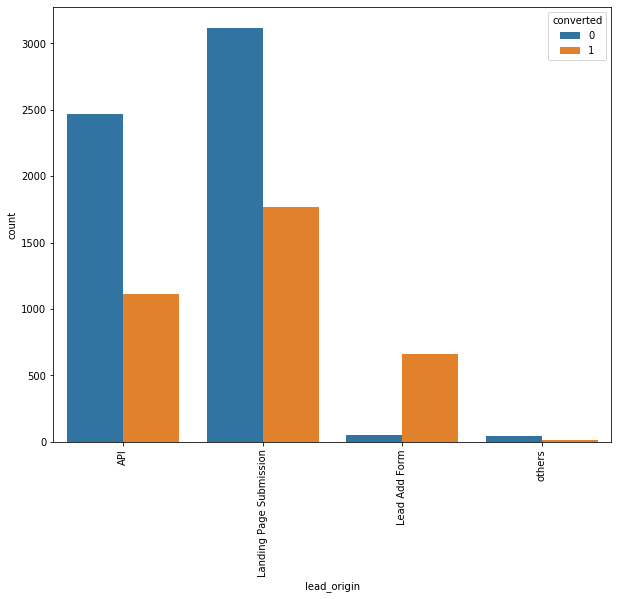

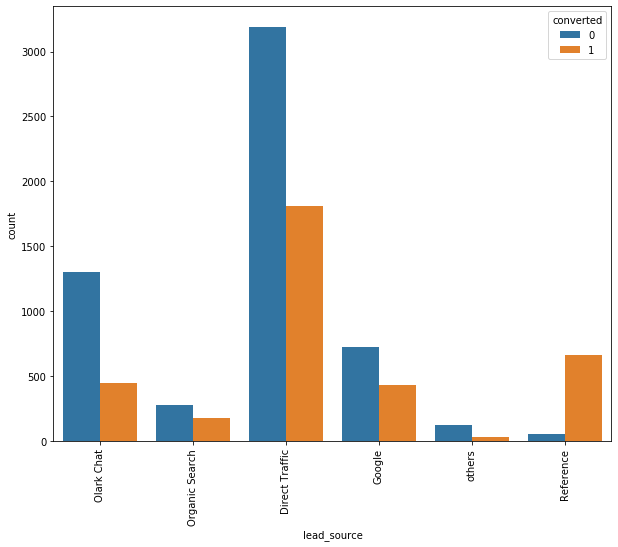

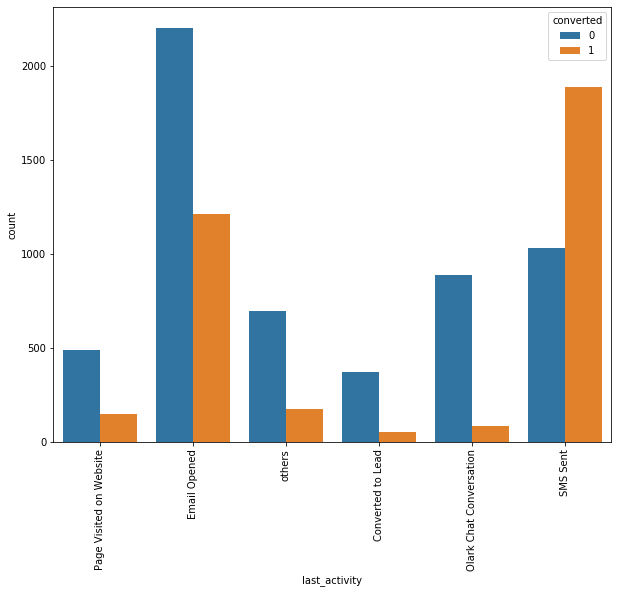

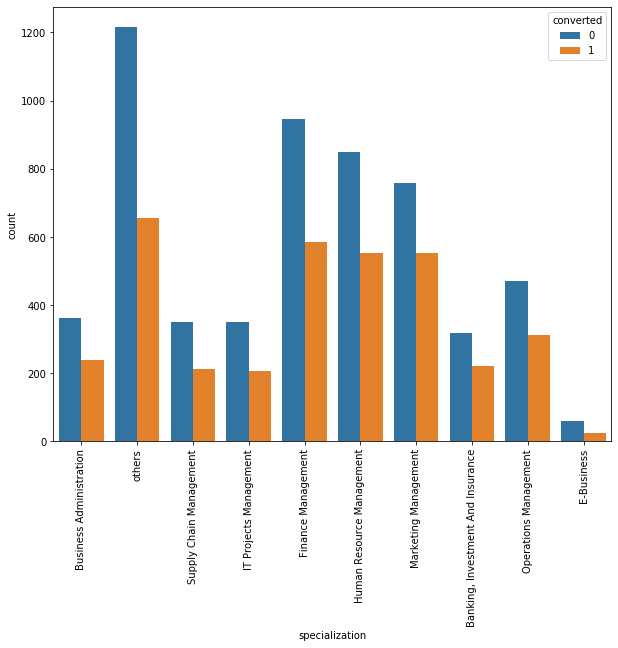

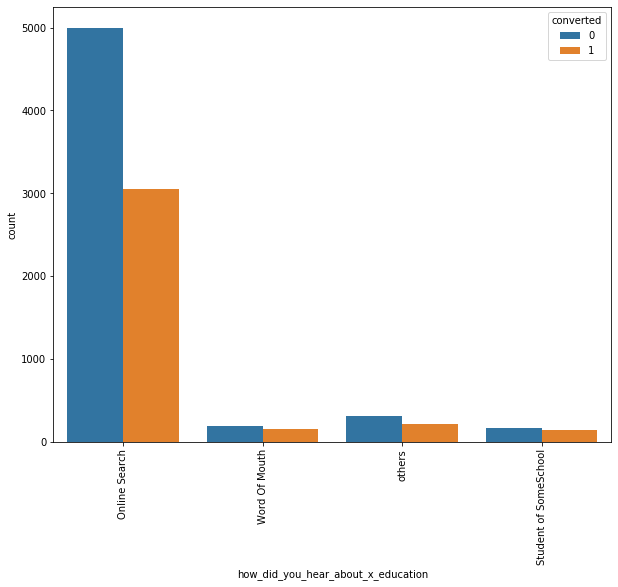

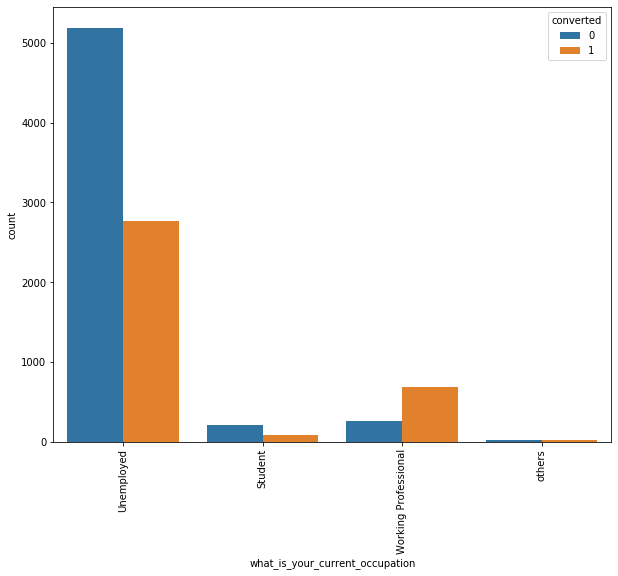

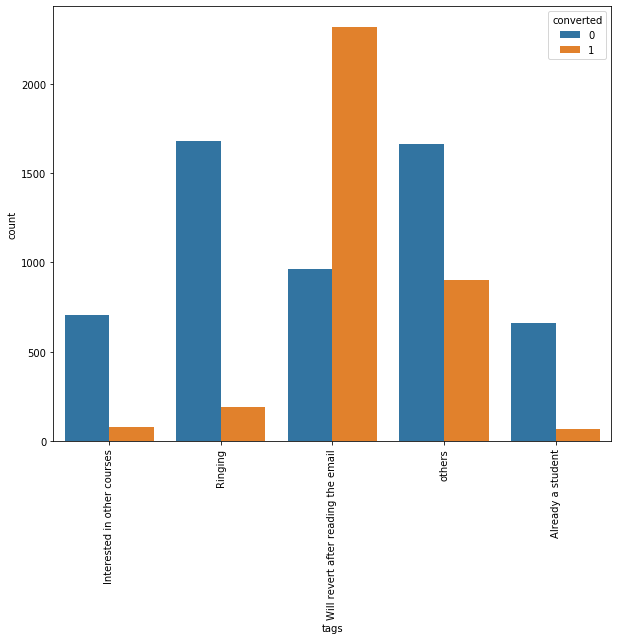

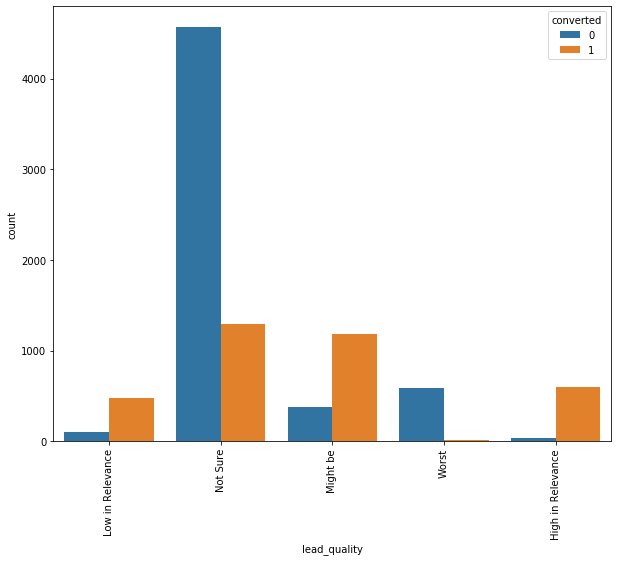

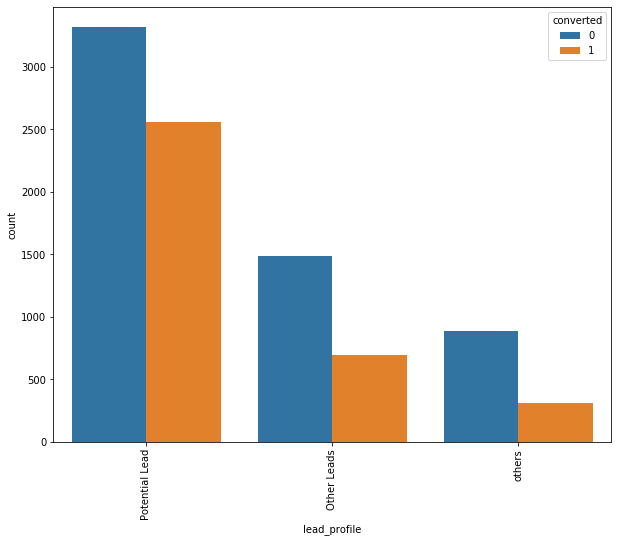

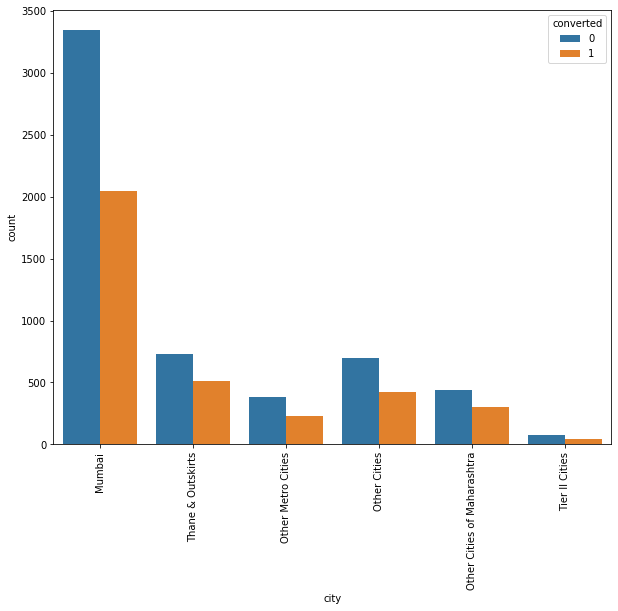

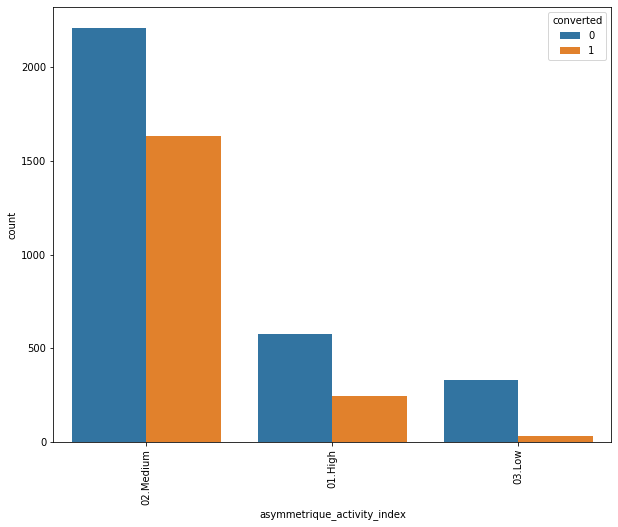

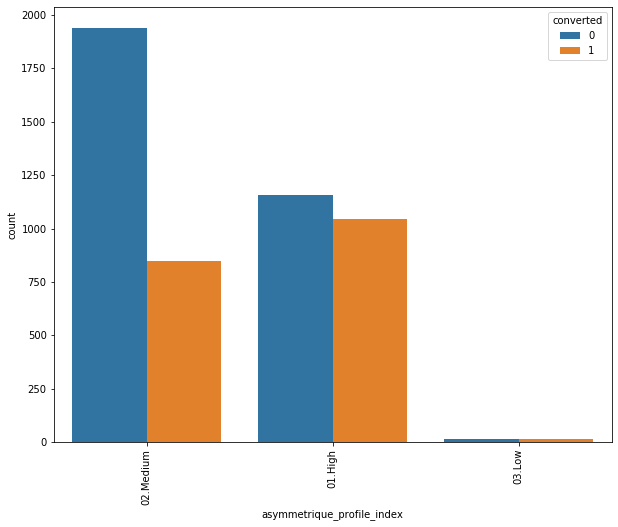

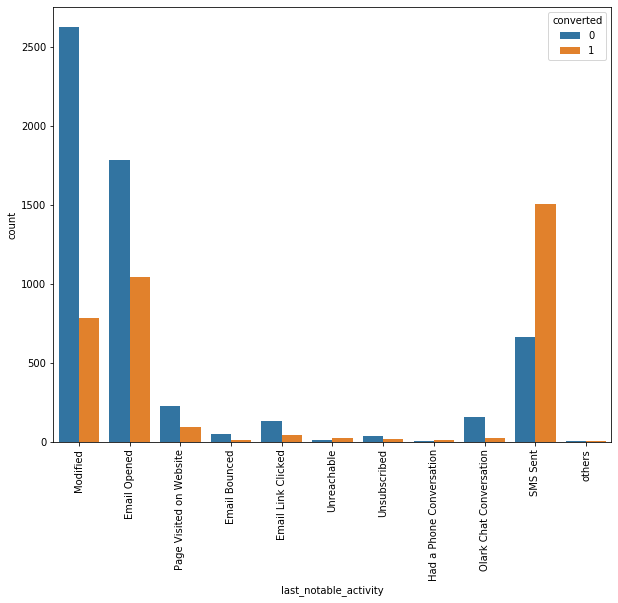

In [75]:
for i in LS_cat.columns:
  plt.subplots(figsize=(10,8))
  sns.countplot(x = LS_cat[i], hue = "converted", data = LS)
  plt.xticks(rotation = 90)
  plt.show()

In [76]:
values= LS_cat['last_notable_activity'].unique()
for value in values:
    converted= LS_cat[(LS_cat['last_notable_activity']==value) & (LS['converted']==1)].shape[0] 
    total= LS[LS['last_notable_activity']==value].shape[0]
    print(value, converted/total)

Modified 0.22982095685353685
Email Opened 0.36929607357622923
Page Visited on Website 0.29245283018867924
Email Bounced 0.15
Email Link Clicked 0.26011560693641617
Unreachable 0.6875
Unsubscribed 0.2978723404255319
Had a Phone Conversation 0.9285714285714286
Olark Chat Conversation 0.1366120218579235
SMS Sent 0.6942909760589319
others 0.7142857142857143




 **Lead Origin:**
1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3.Others are very less in count.

 **Lead Source:**
1.Olark Chat and Direct traffic generates maximum number of leads.
2.Conversion Rate of Reference leads is high.

 

 **Last Activity:**
1.Most of the lead have their Email opened as their last activity.
2.Conversion rate for leads with last activity as SMS Sent is almost 60%.
3.Conversion rate for leads with last activity as Email Opened is almost 50%.



 **Specialization:**
1.Focus should be more on the Specialization with high conversion rate Finance Management, Human Resource Management  and Marketing management has greater than 50% conversion rate.
2.While for others count is high we have a conversion rate of less than 35%

 **How did you hear about X Education**
1.Student of SomeSchool, Word Of Mouth and Others has highest conversion rate of 45%
2.While for Online Search count is high we have a conversion rate of less than 35%

 **What is your current occupation**
1.80% conversion rate of Working Professional. Though Unemployed people have been contacted in the highest number, the conversion rate is low ~40%
2.We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions.

 **Tags:**
Will revert after reading email has ~60% conversion rate. 
Others has ~40% conversion rate. 
Ringing has very low conversion rate as leads have not responded on calls at first touchpoint call

 **Lead Quality**
Lead Quality is assessed correctly except for 'Low in Relevance' as leads have a good conversion rate inspite of profie not aligned with the course.

 **Lead Profile**
Potential Leads has highest conversion of 50%.Other Leads and Others have ~40% conversion rate

 **City**
Most leads are from Mumbai with less than 30% conversion rate.
Thane & outskirts and other cities also have very less conversion rate

 

 **Last Notable Activity**
 SMS Sent has highest conversion rate of ~70%
 Email opened has good conversion rate of ~40%
 While for Modified count is high we have a conversion rate of ~20% as leads are modifying their accounts and not coming back to the website




## Numerical with target

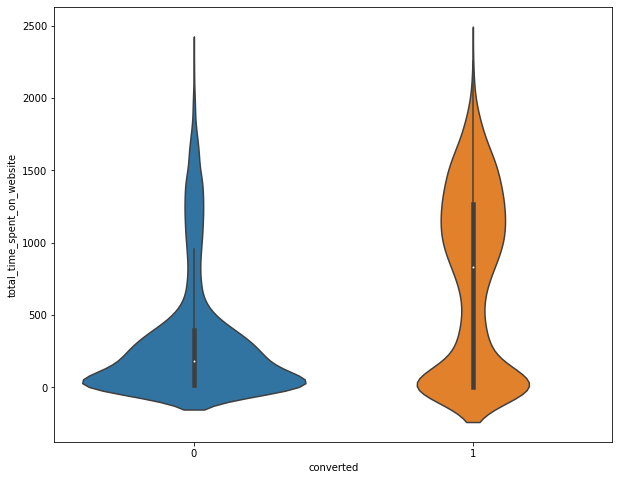

In [77]:
plt.subplots(figsize=(10,8))
sns.violinplot(y = LS_num['total_time_spent_on_website'], x=LS['converted'])

plt.show()

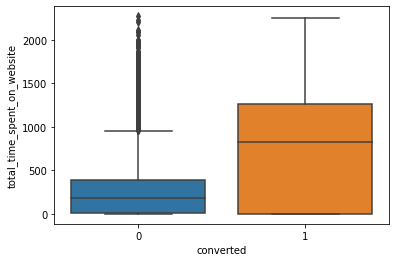

In [78]:
sns.boxplot(y=LS_num['total_time_spent_on_website'],x=LS['converted'])

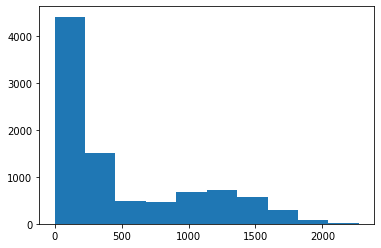

In [79]:
plt.hist(LS_num['total_time_spent_on_website'],bins=10)
plt.show()

**TotalVisits:**
The page view per visit is totally dependent on the total visits by a lead.So with increase in totalvisit the page views also increased and conversion rate icreased for such types of leads.
After 7 visits , the conversion rate goes beyond 40%.


**Page Views Per Visit**
At 1.17 average page visit , the conversion rate is high due to leads who are most interested who upskill and immediately opt for the course.As the avg page visit increases, the conversion rate is also declining.These are the hot leads that X-education needs to work on.

**Total Time Spent on Website**
From 0-200, that is the default range of time spent on website.There conversion rate is very low.Leads who is spending time up to 750 are the people who are comparing the course provided at different website.Leads who are spending time up to 1200 , their conversion rate is very high.

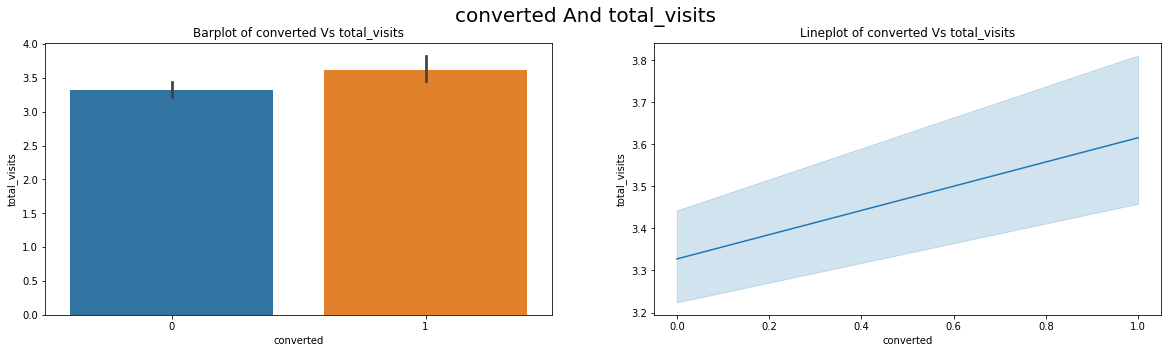

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs total_visits')
sns.lineplot(x=LS['converted'],y=LS['total_visits'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_visits')
plt.suptitle('converted And total_visits',fontsize = 20)
plt.show()

Inferences:
- The total number of visits made by the customer on the website is in the range of 0 to 251.
- Many convereted leads have visited the sites anywhere in between 0-50 times and so does the lead not being convereted.
- Hence the probability of a lead being converted doesn't really depend on the total_visits of the customer to the website.

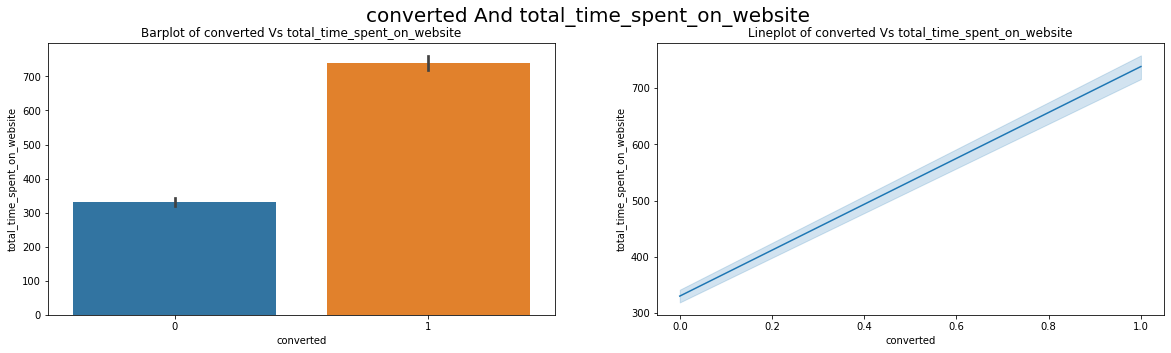

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs total_time_spent_on_website')
sns.lineplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_time_spent_on_website')
plt.suptitle('converted And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- The total_time_spent_on_website of the customer on the X Education website is in the range of 0 to 2272.
- From the Lineplot we can say that the more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.There exists a Linear Relationship we can say.

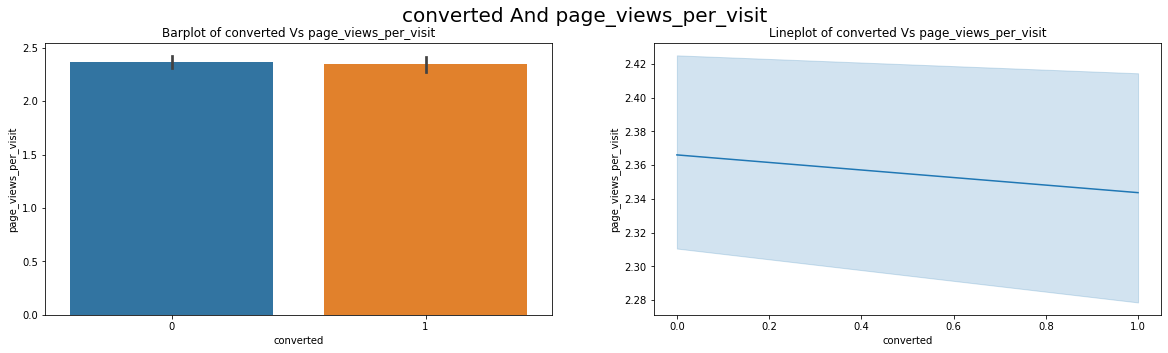

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Barplot of converted Vs page_views_per_visit')
sns.lineplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs page_views_per_visit')
plt.suptitle('converted And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- The page_views_per_visit of the customer on the X Education website is in the range of 0 to 55.
- From the scatterplot we can see that a person being converted is really no that dependant on the Average number of pages on the X Education website viewed during the visits.
- From the Lineplot we can infer that the probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.

## Numerical- Numerical

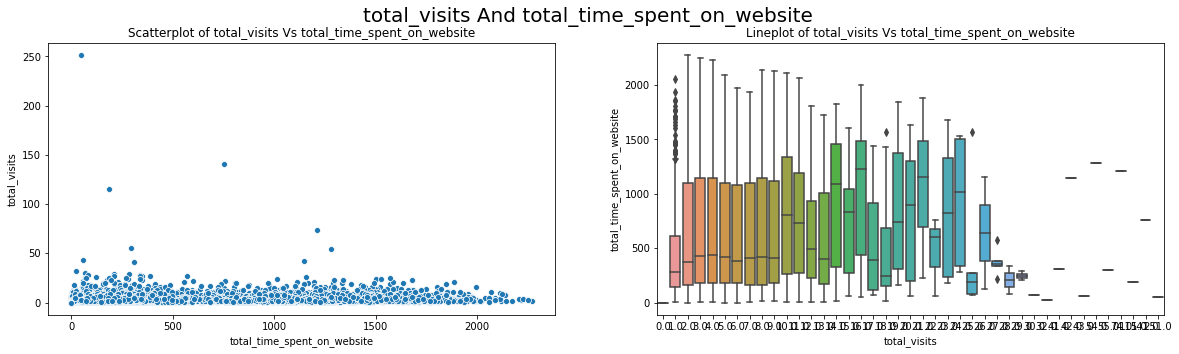

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs total_time_spent_on_website')
sns.boxplot(x=LS['total_visits'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs total_time_spent_on_website')
plt.suptitle('total_visits And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- Not much inference can be drawn of these plots.Apart from the varying total_time_spent_on_website with total_visits

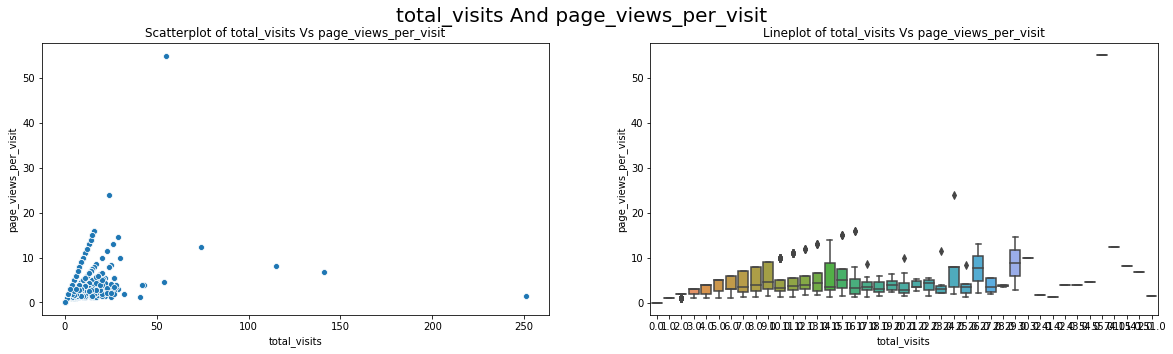

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs page_views_per_visit')
sns.boxplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs page_views_per_visit')
plt.suptitle('total_visits And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- From the scatterplot we see that when the total number of visits made by the customer on the website lies between 0 to 25 the Average number of pages on the website viewed during the visits is anywhere in between 0 - 20
- Not much inference can be drawn from the Lineplot

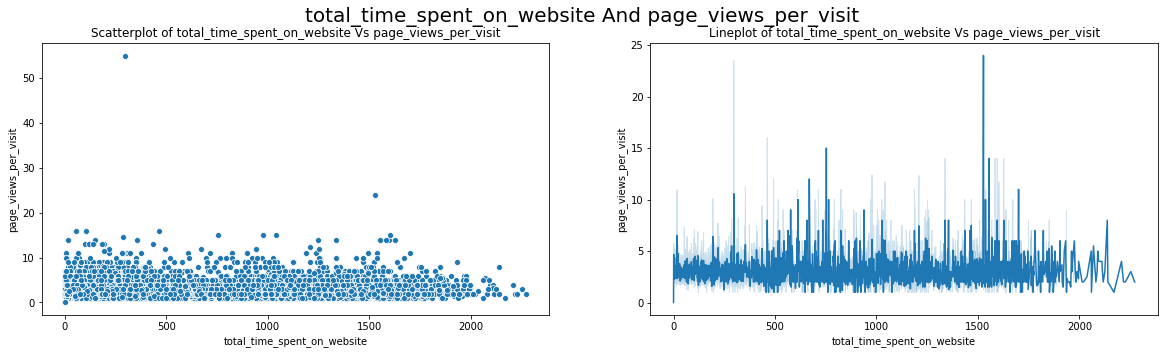

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_time_spent_on_website Vs page_views_per_visit')
sns.lineplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_time_spent_on_website Vs page_views_per_visit')
plt.suptitle('total_time_spent_on_website And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- Those customers who tend to spend anywhere in between 0 - 500 minutes on the website visit around 0 to 15 number of pages on the website.
- From the scatterplot we see that the average number of pages on the website viewed by the customer during the visits is not that relevant with the total time spent by the customer on the website.

**Key Take-Aways:**
- From converted and total_visits plot : The probability of a lead being converted doesn't really depend on the total number of visits made by the customer on the website.
- From converted And total_time_spent_on_website : The more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.
- From converted And page_views_per_visit : The probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.

## Categorical-  Numerical

In [86]:
LS_cat.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'last_notable_activity'],
      dtype='object')

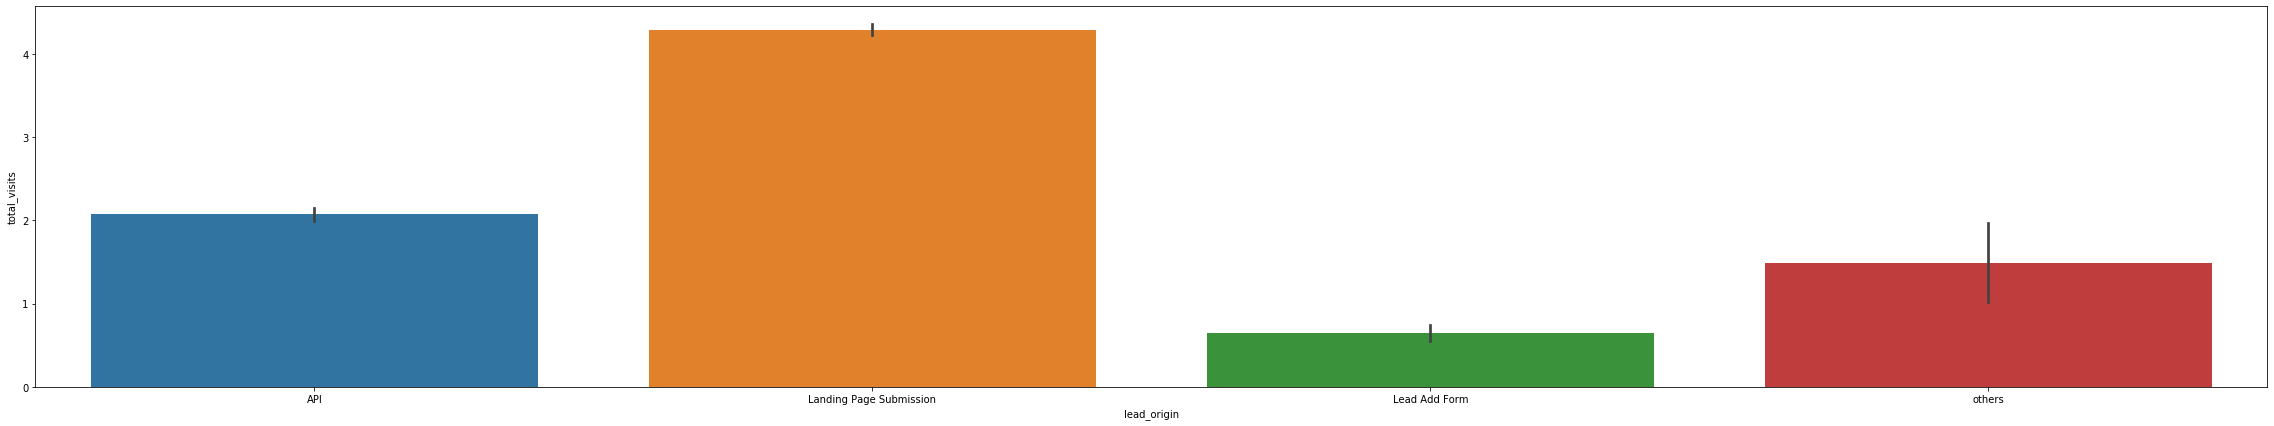

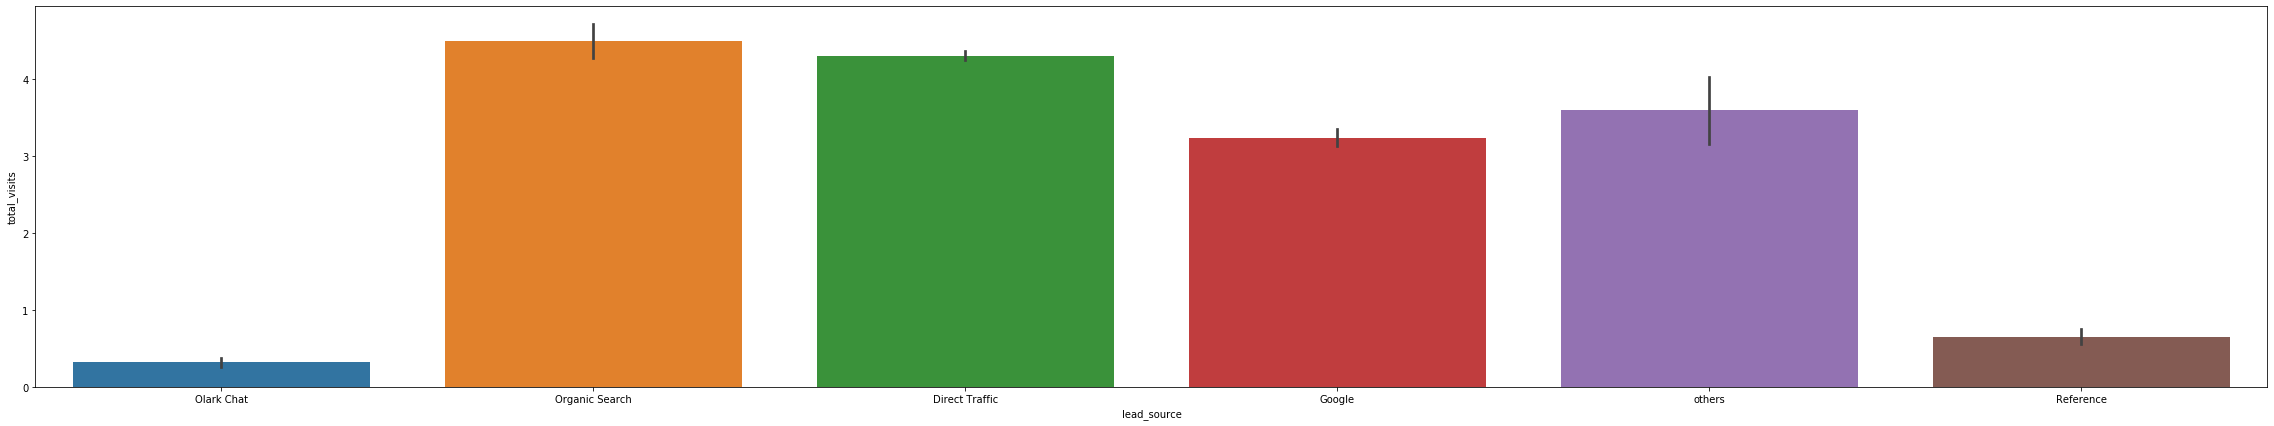

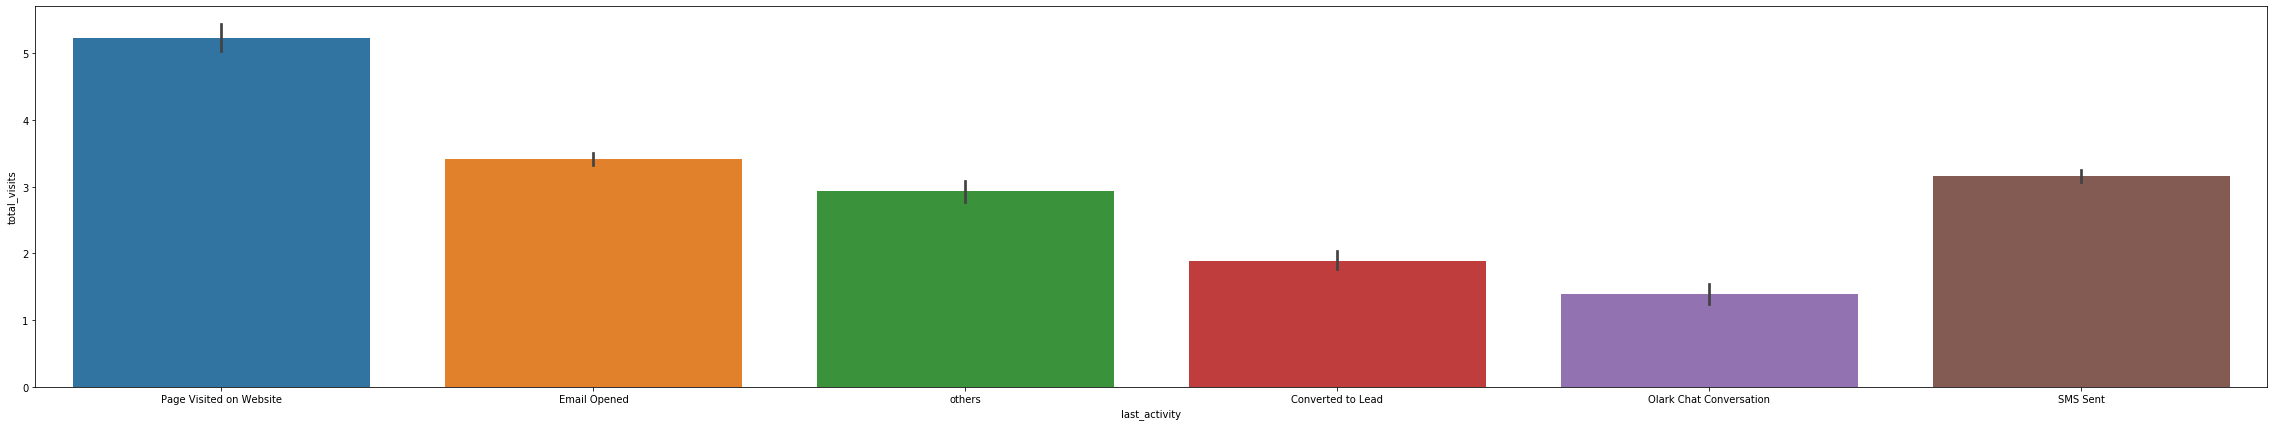

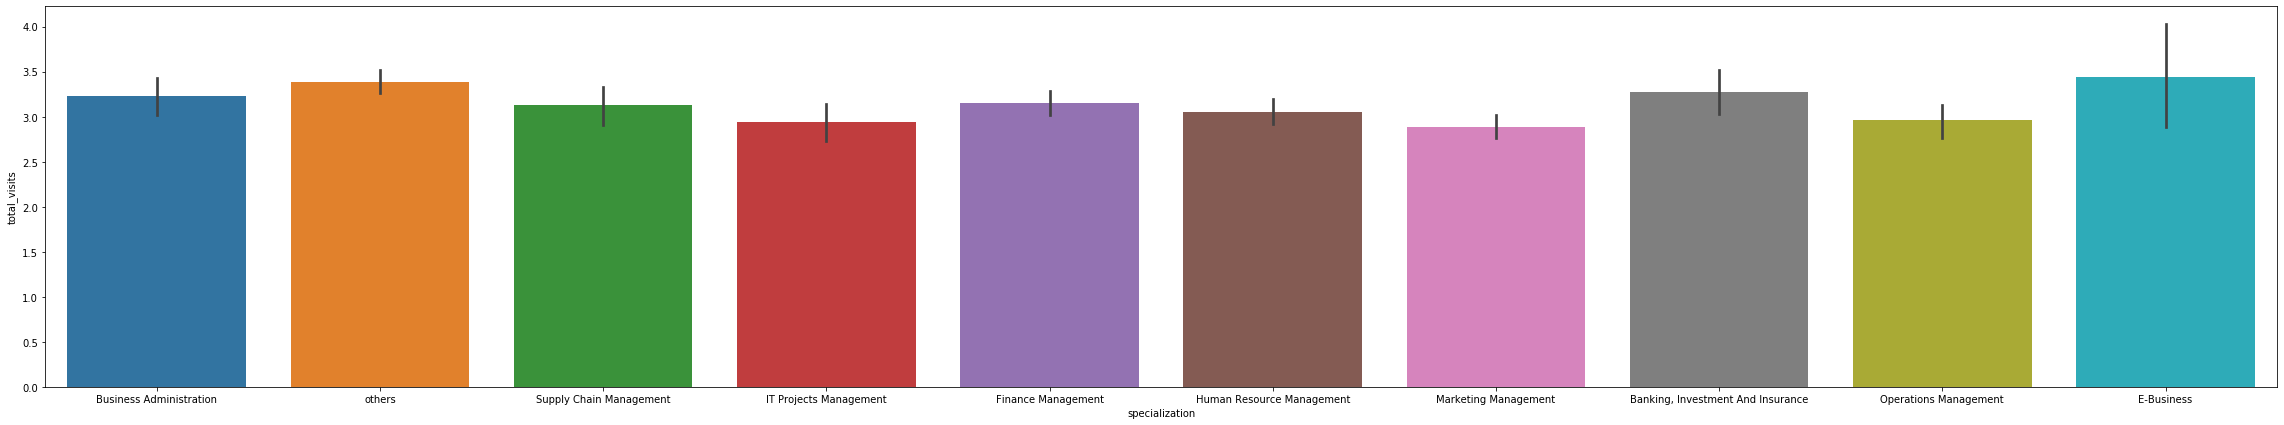

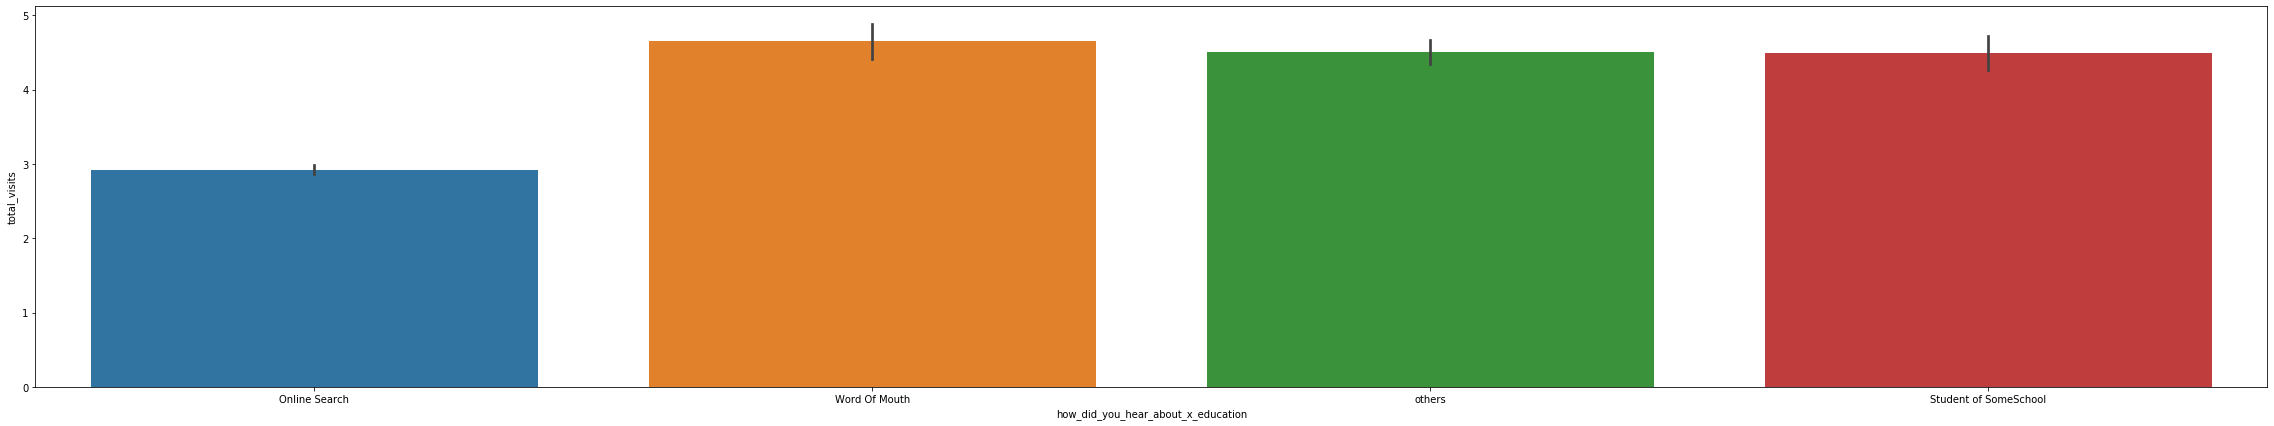

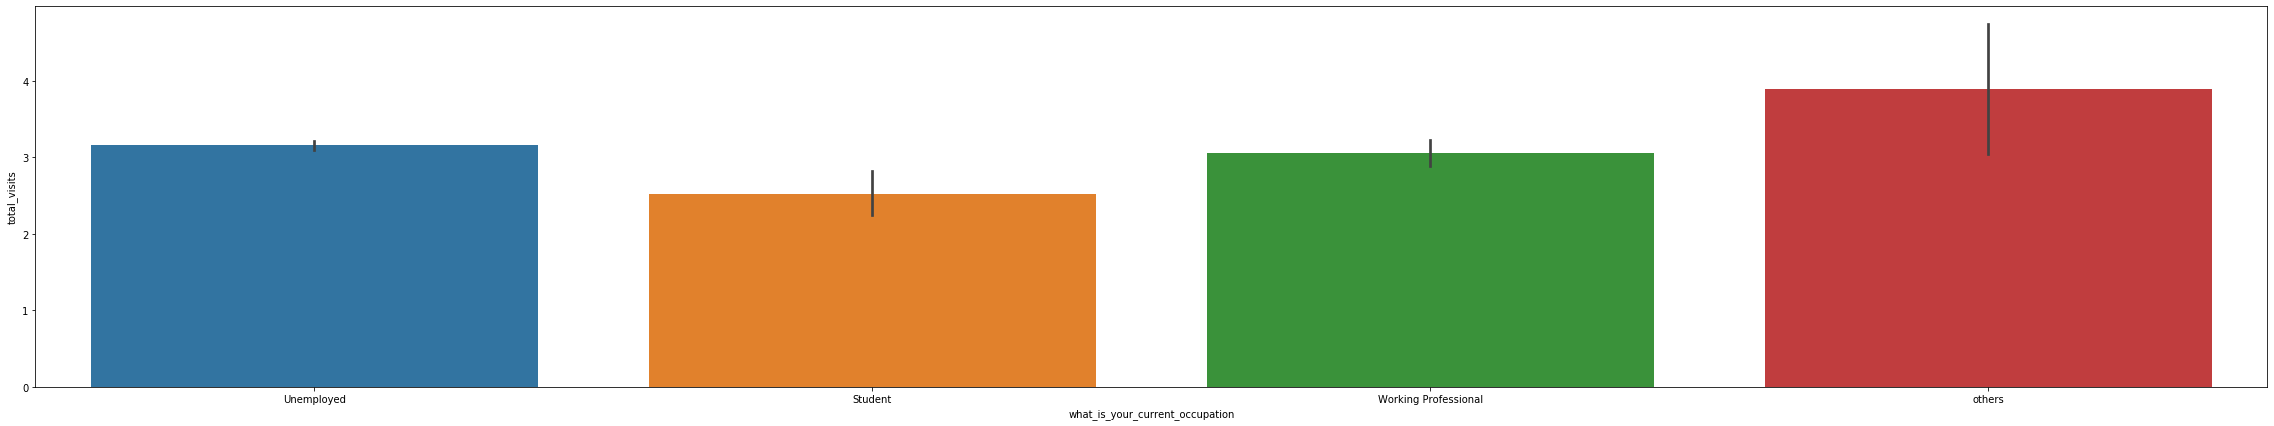

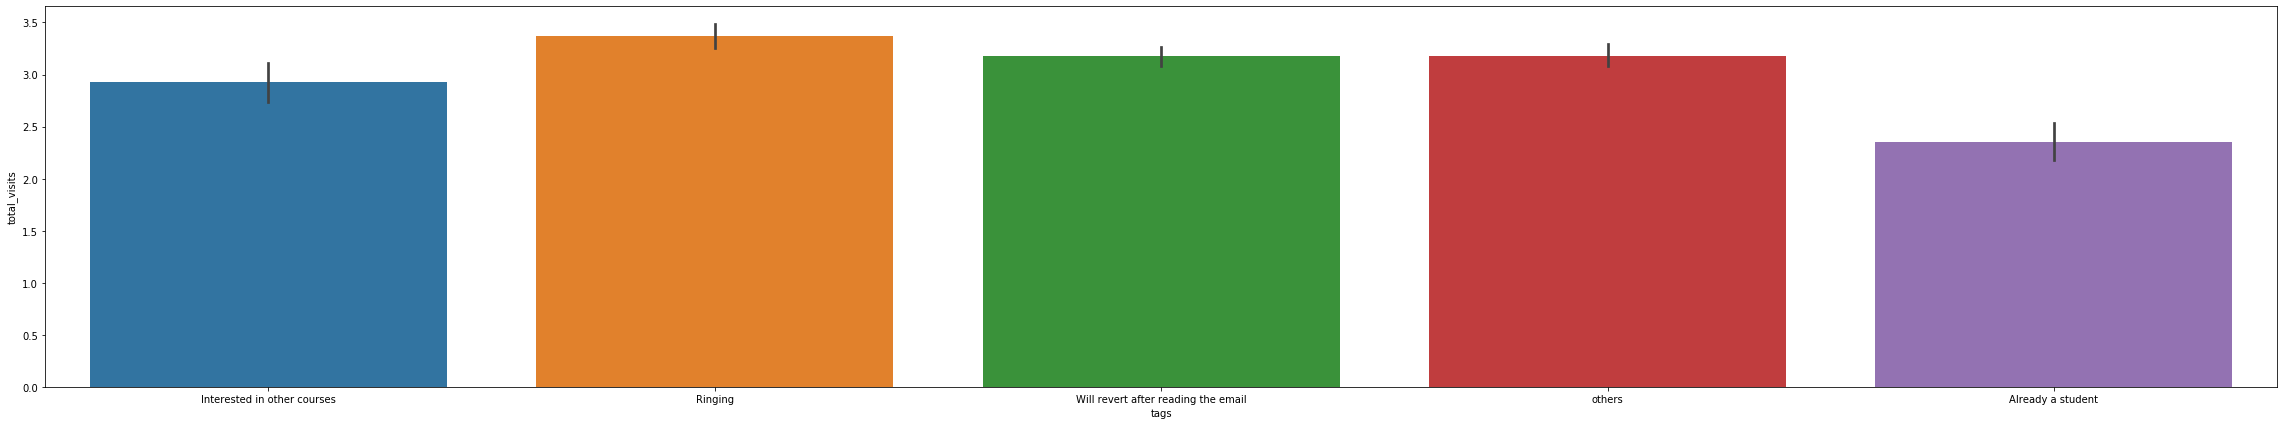

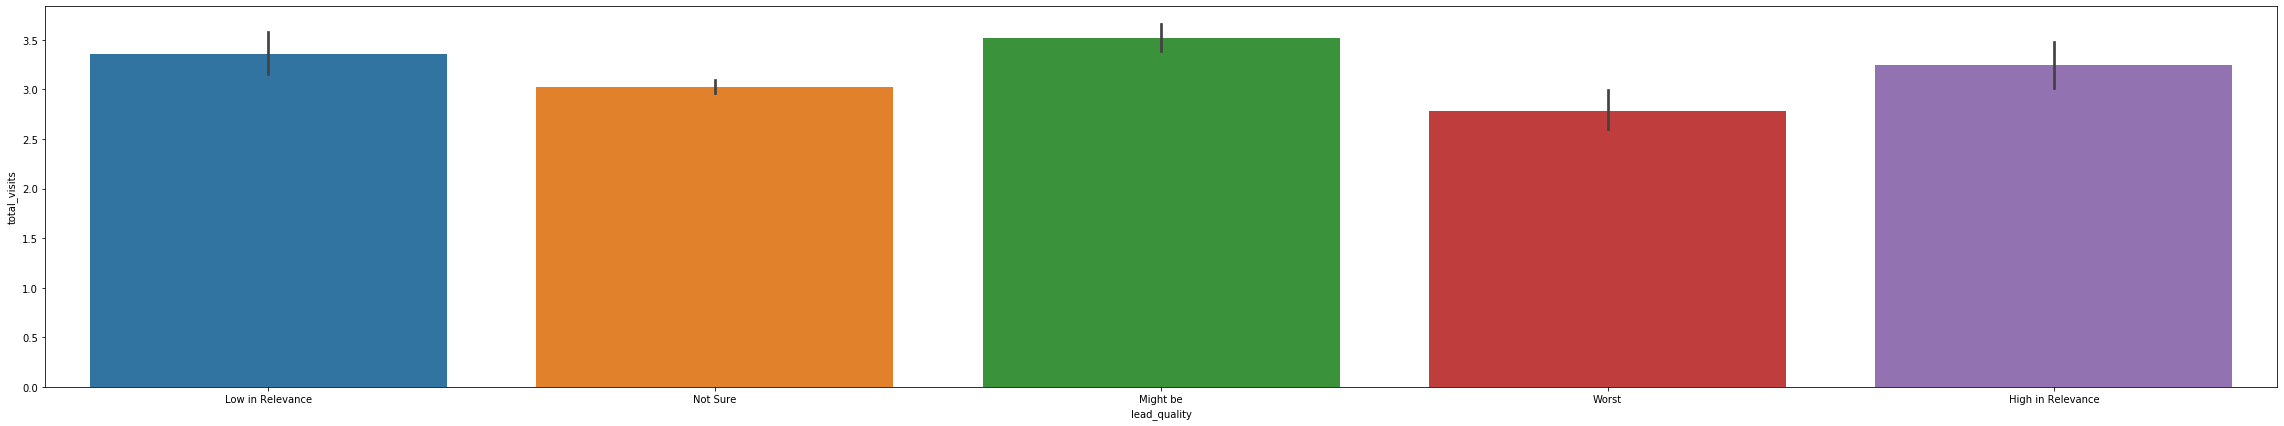

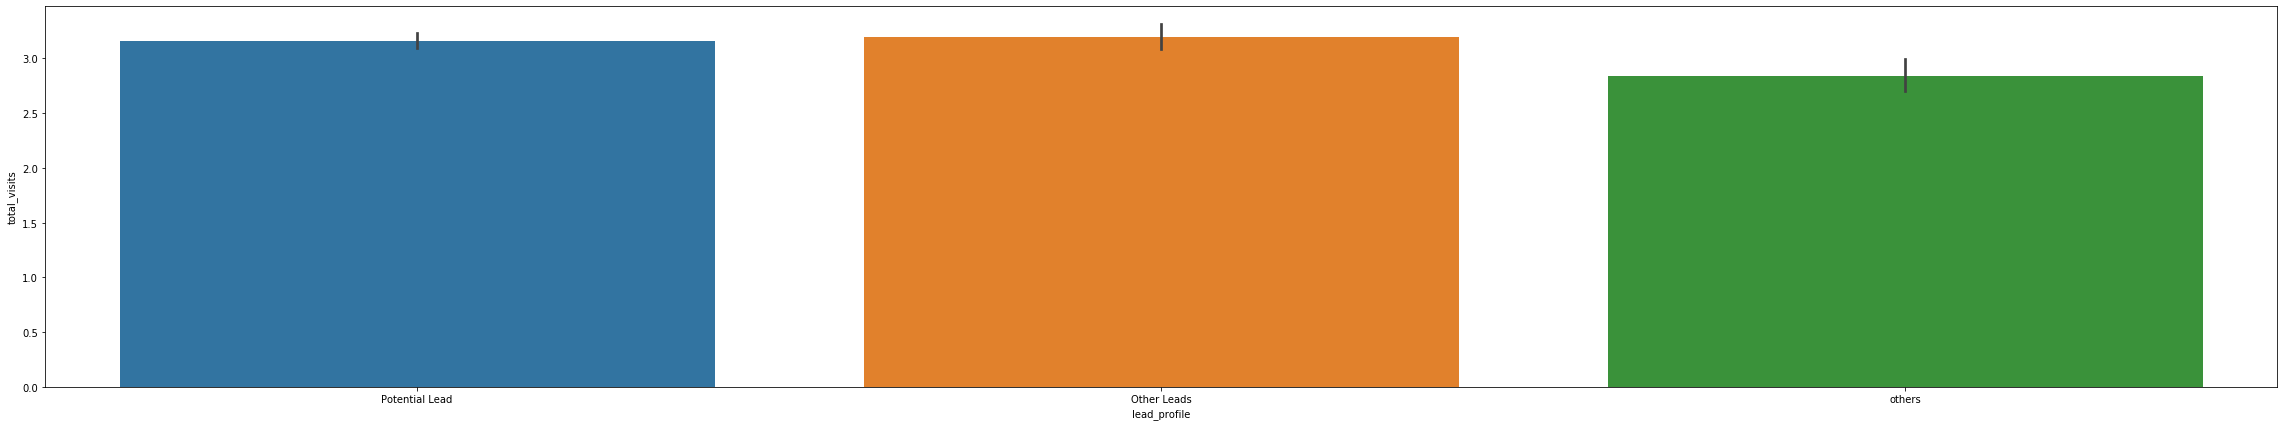

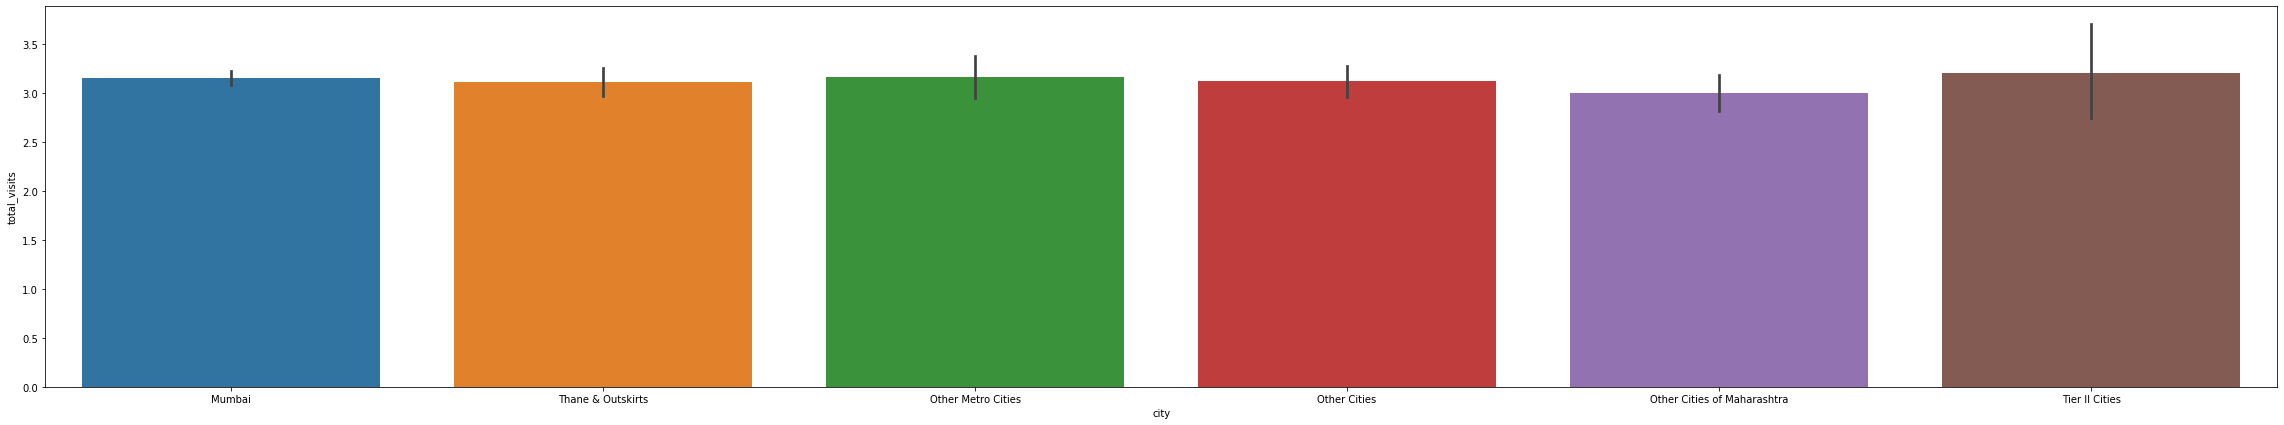

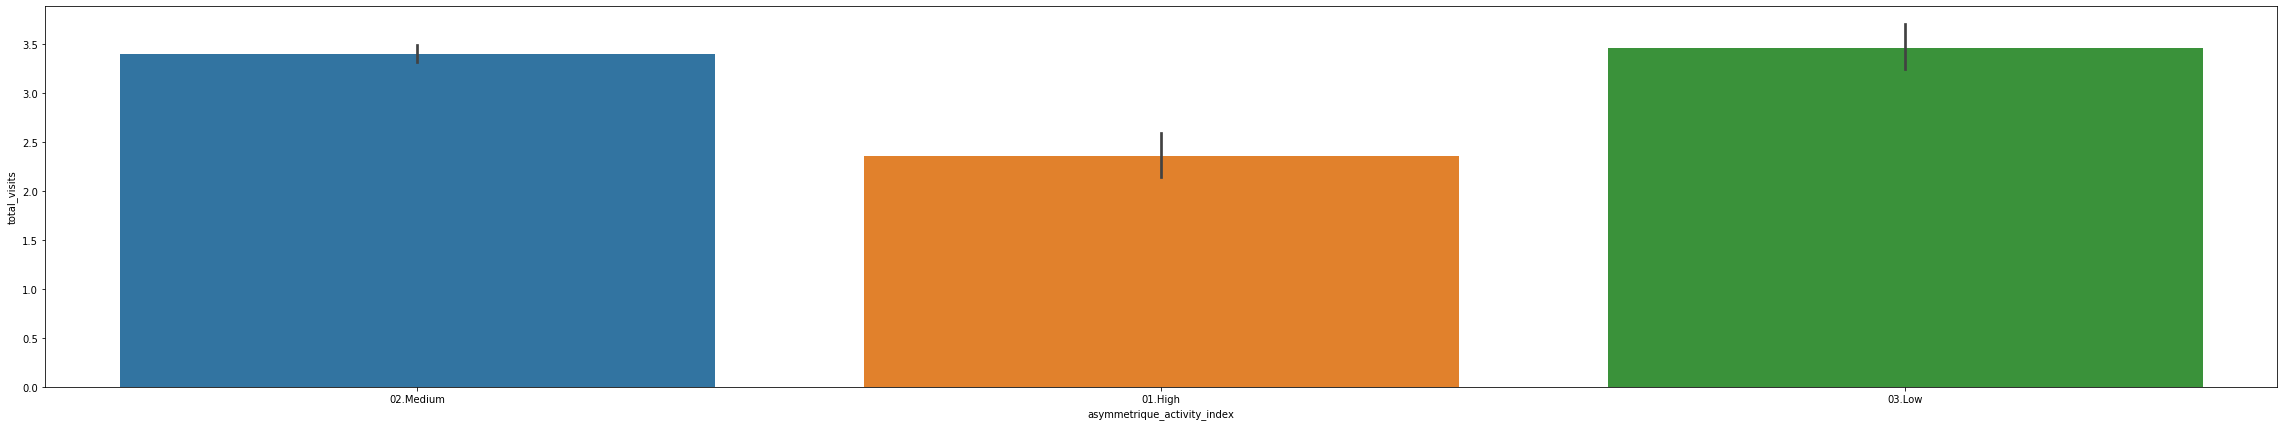

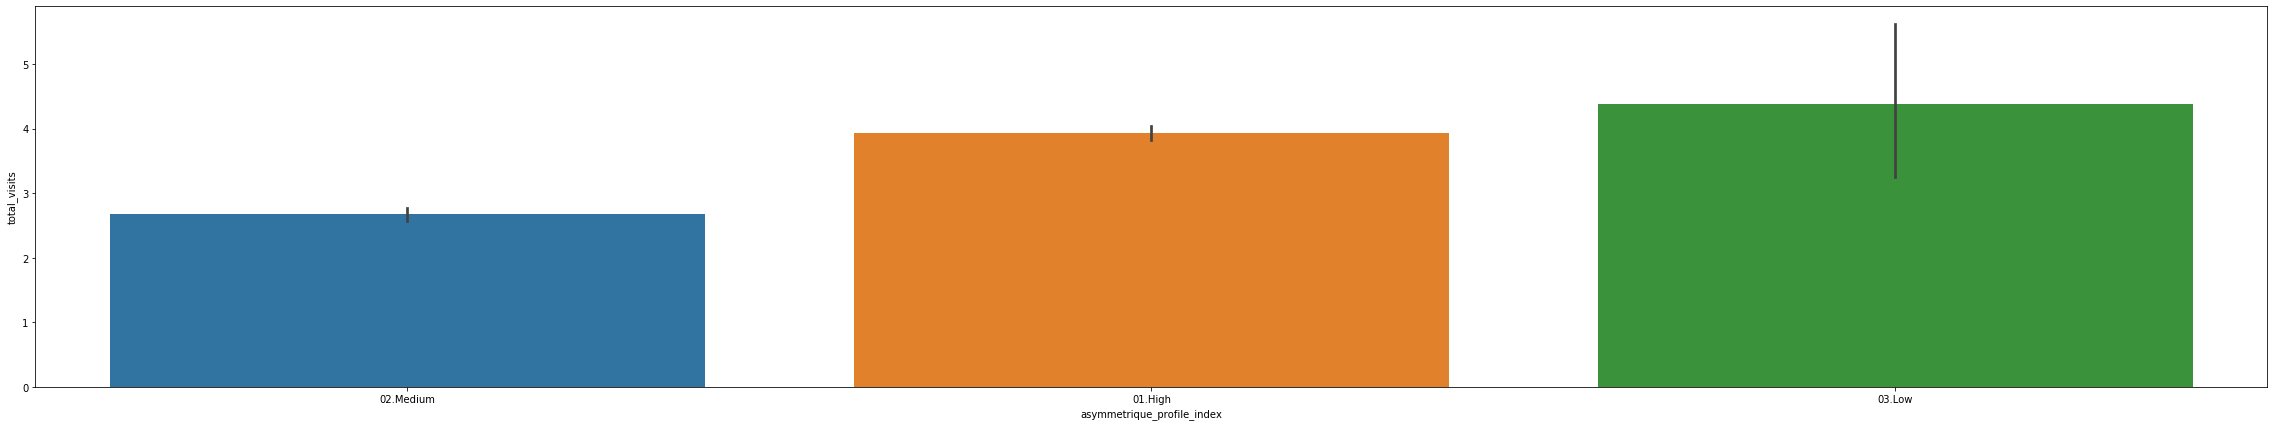

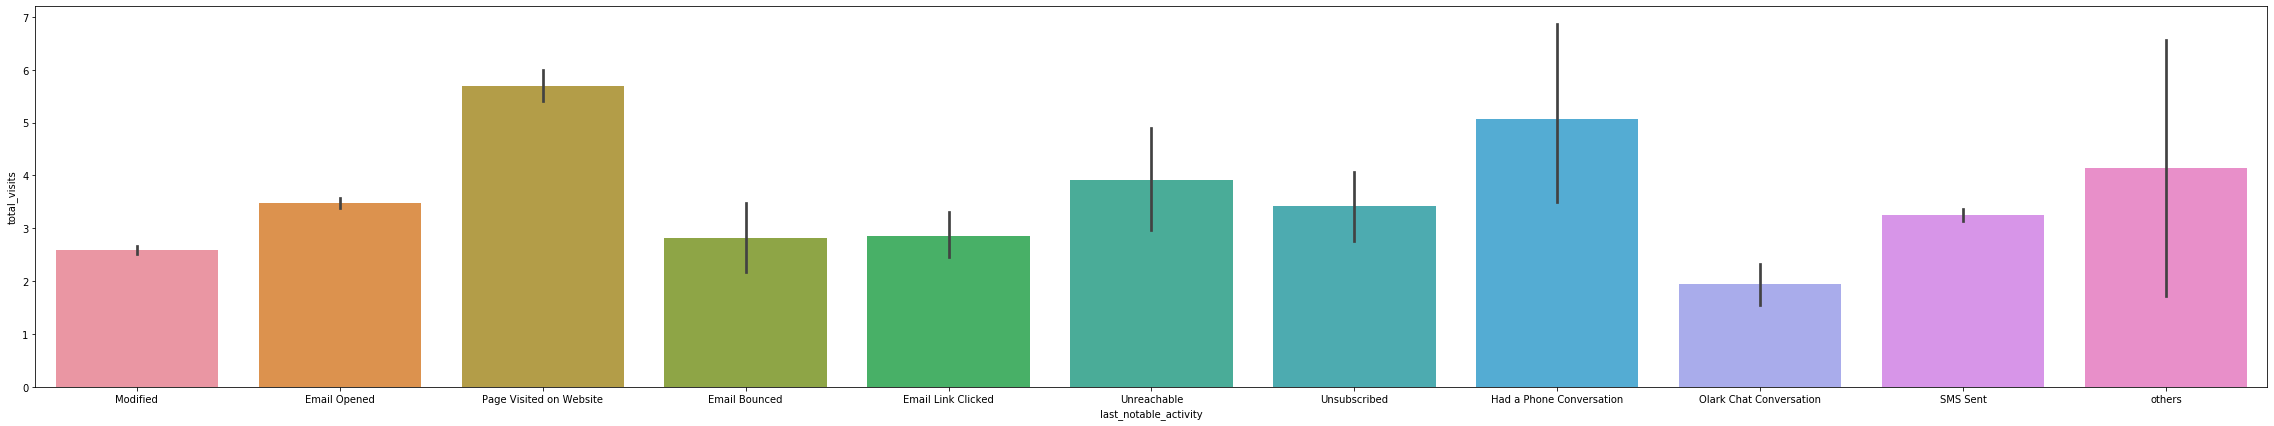

In [87]:
for i in LS_cat.columns:
  fig=plt.subplots(figsize=(40,7))
  sns.barplot(x=LS_cat[i],y=LS_num['total_visits'])
  #sns.stripplot(LS_cat[i], y=LS_num['total_visits'],ax=ax[1])
  plt.show()

**Inference from Bivariate Analysis of Categorical vs Numerical Columns:**

1.Total visit vs Lead Origin
~ API , Landing Page submission and Lead Import forms the highest source of Total visits on the website.

2.Total visit vs Lead Score
~ Customers through Organic Search and Press release has visited the websites most.


6.Total visit vs Specialization
~ Students spend a significant amount of time on website who are interested in the following courses - Finance Management , Human Resource Management, 
Marketing Management, and Operations Management.

7. Total visit vs How did you hear about X Education
~ Students who spent significant amount of time on the website heard about X Education through Online Search , Word Of Mouth or Student of Some School.

8. Total visit vs What is your current occupation
~ A significant number of students who have visited the website are unemployed (5600).

9.Total visit vs What matters the most in Choosing a course.
~ People who have visited the max number of  times on the website are those who looks for Flexibility and Convinence.

10. Total visit vs Tags
~People who spent a significant amount of time on the website Will revert after reading the email or not has responded.

11. Total visit vs Lead Quality 
~ People who have visited the max number of  times on the website are the leads who estimate for the conversion is  Might be and Low in Relevance.

12.Total visit vs Lead Profile
~ People who have visited the max number of  times on the website are Potential leads and other leads.

13.Total visit vs City
~ Customer from Tier2 cities have visited the website max times.

14.Total visit vs Asymmetric Activity Index 
~  People who have visited the highest time on website has Low and medium Asymmetric Profile Index.

15.Total visit vs Asymmetric Profile Index
~ People who have visited the highest time on website has Low Asymmetric Profile Index.

16.Total visit vs Last Notable Activity & last Activity~
Customers have visited mostly the website.


>



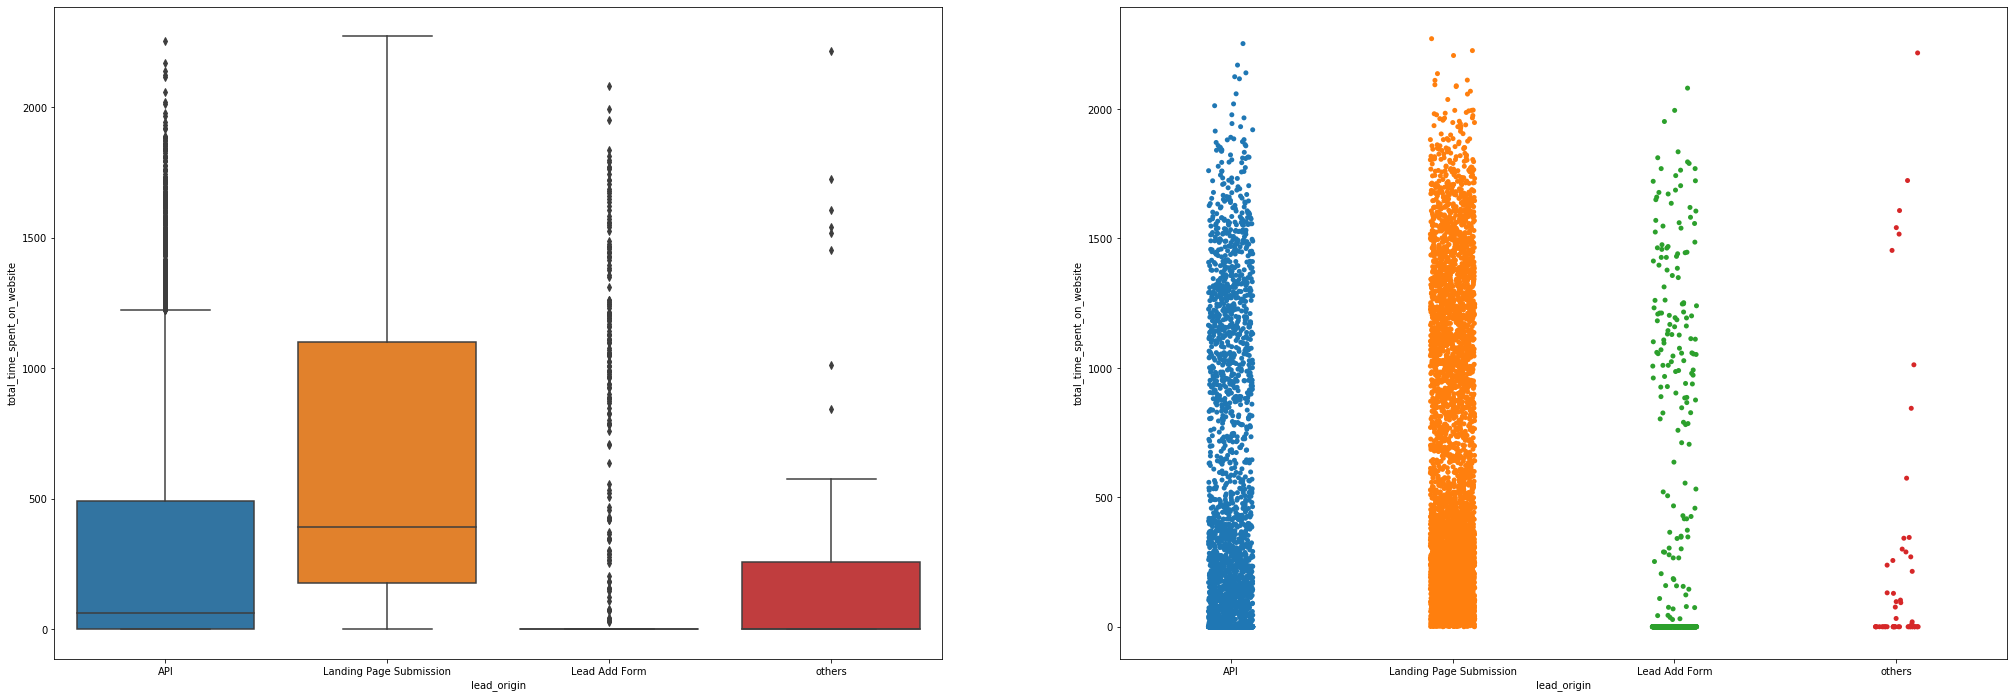

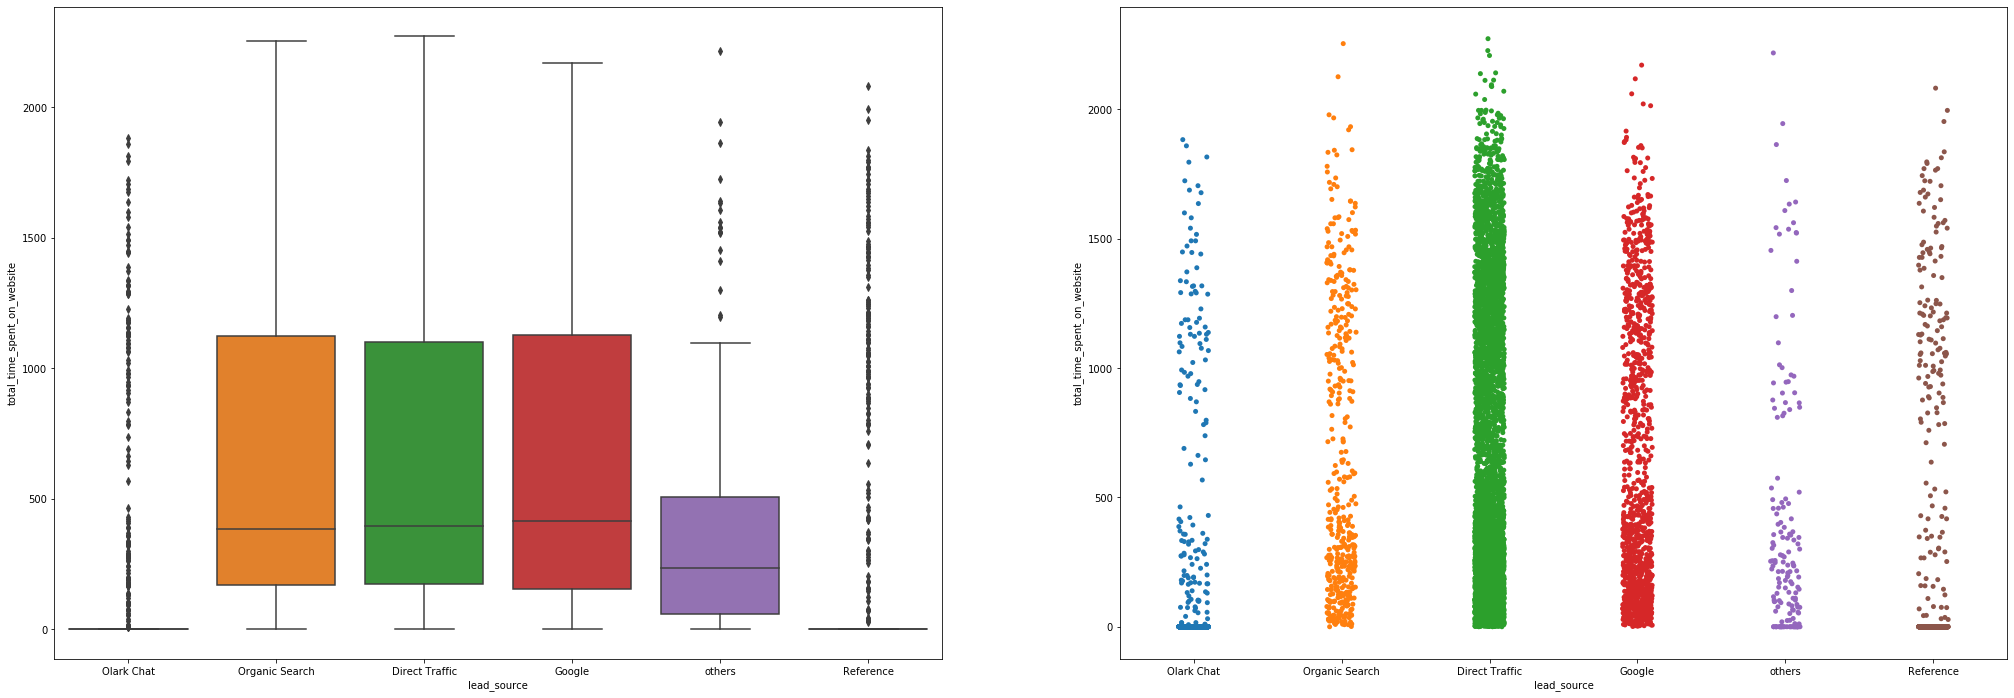

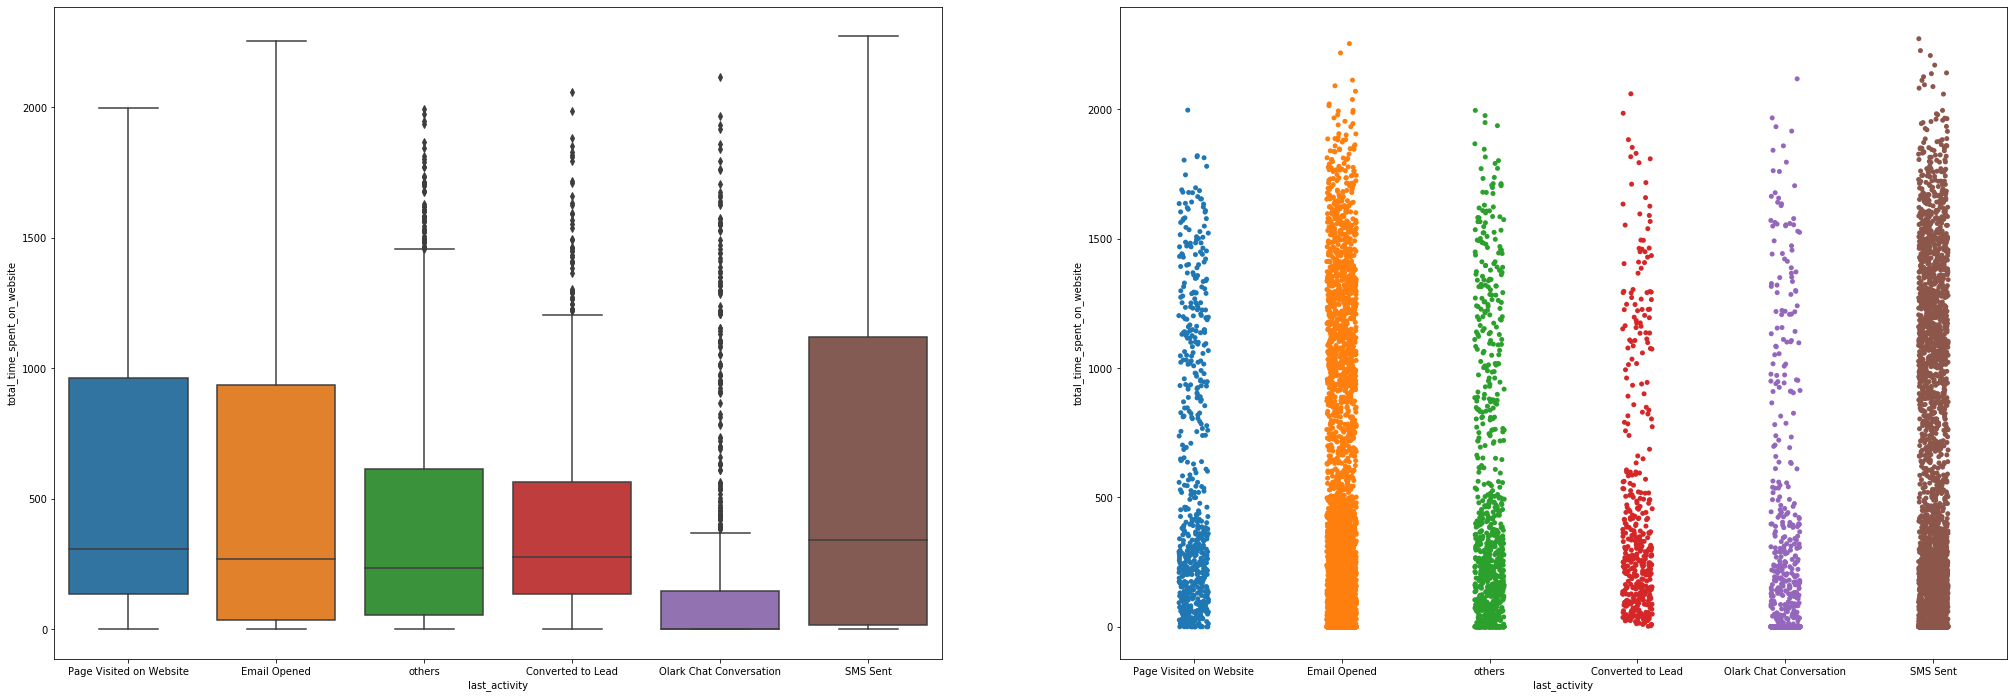

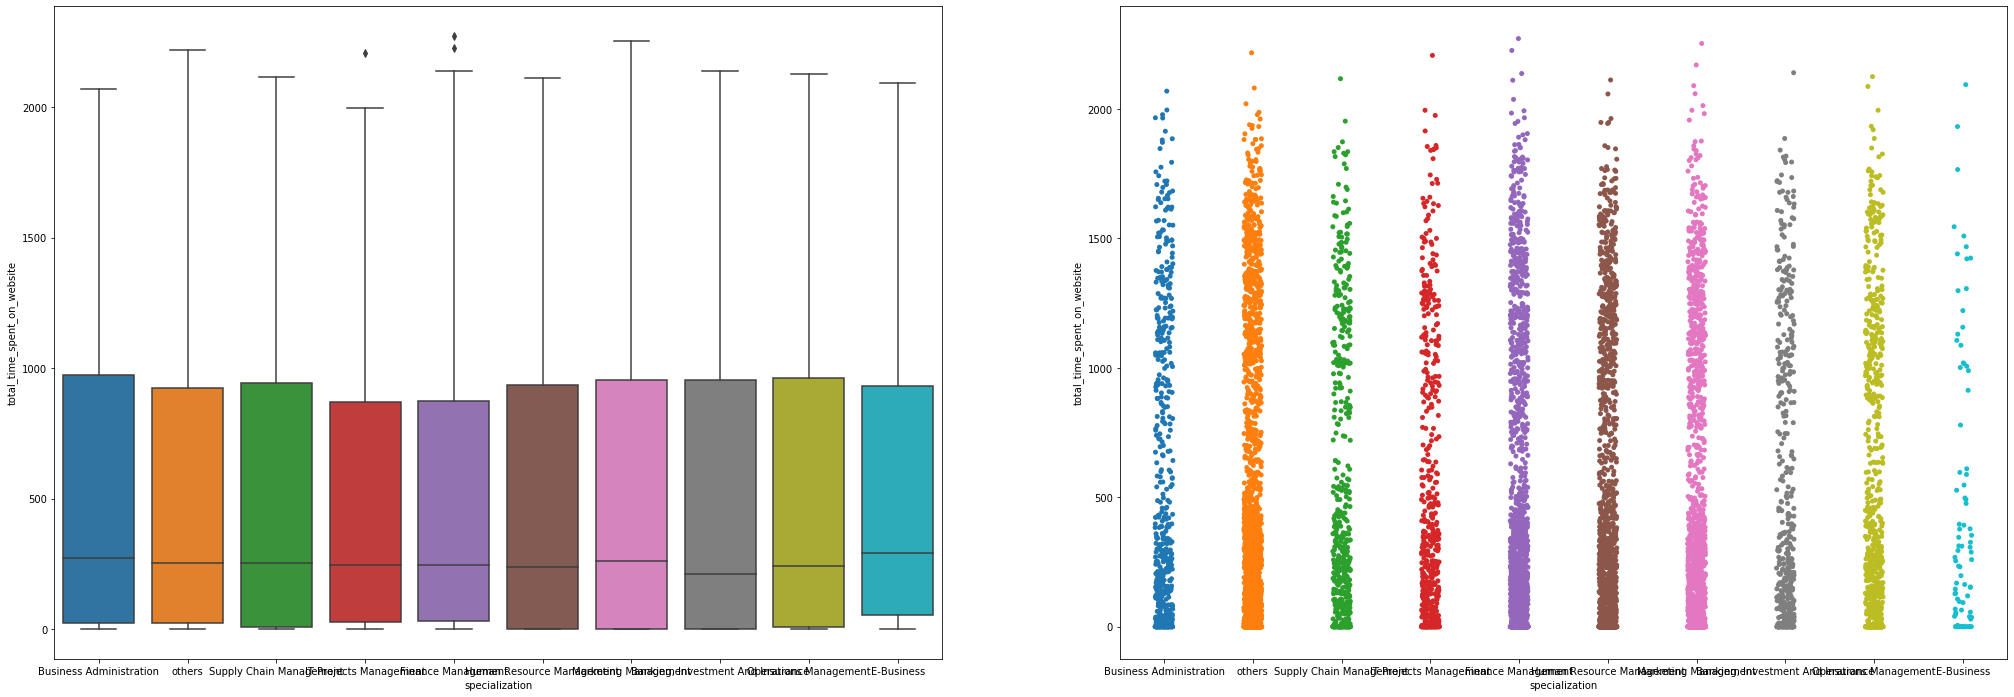

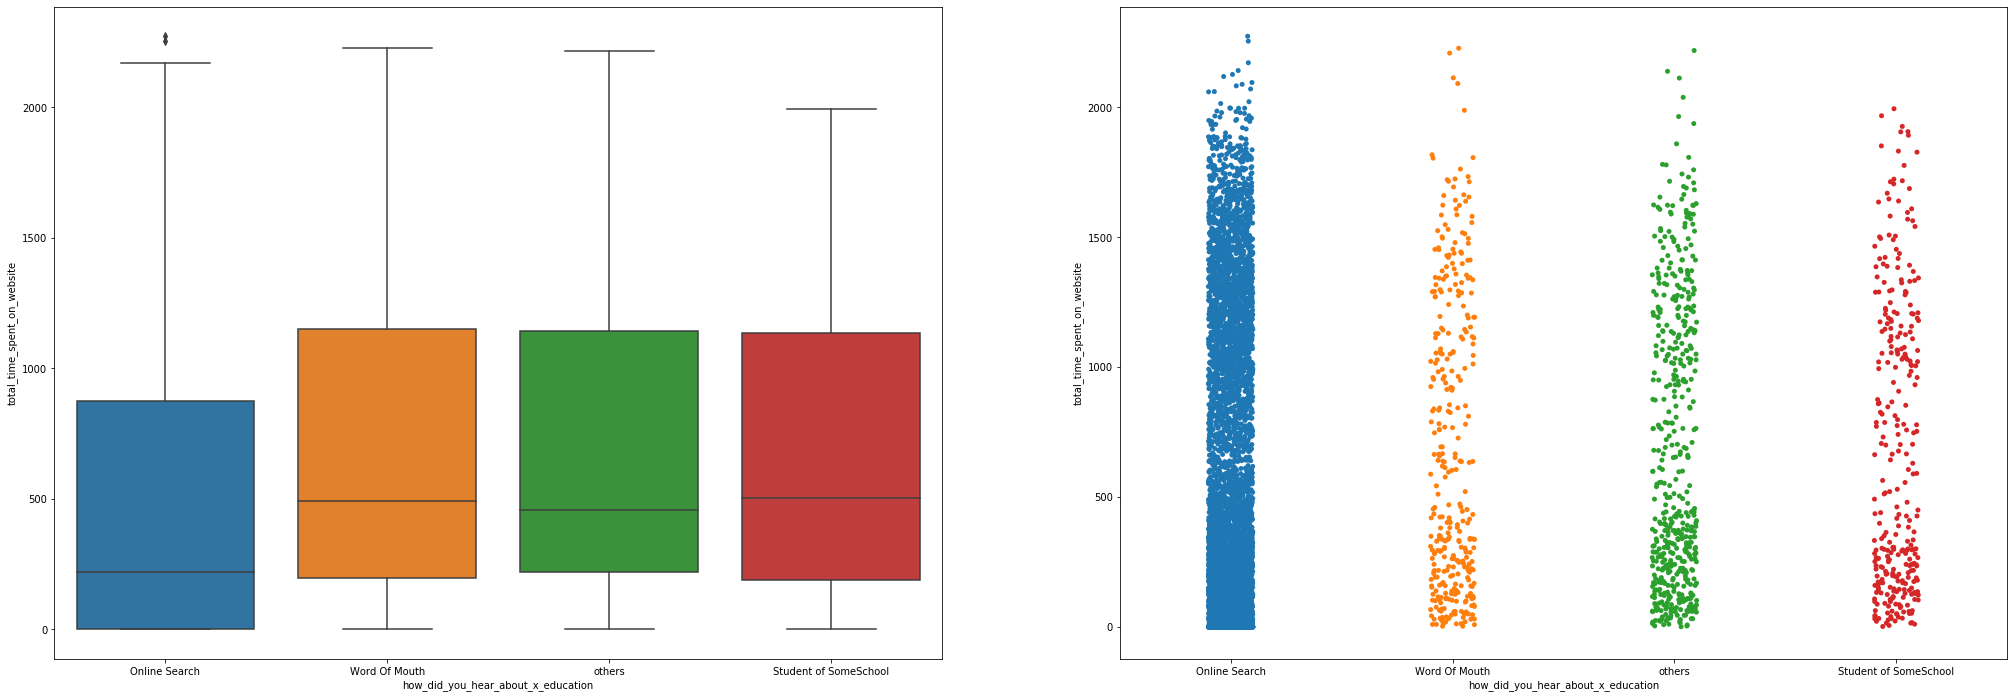

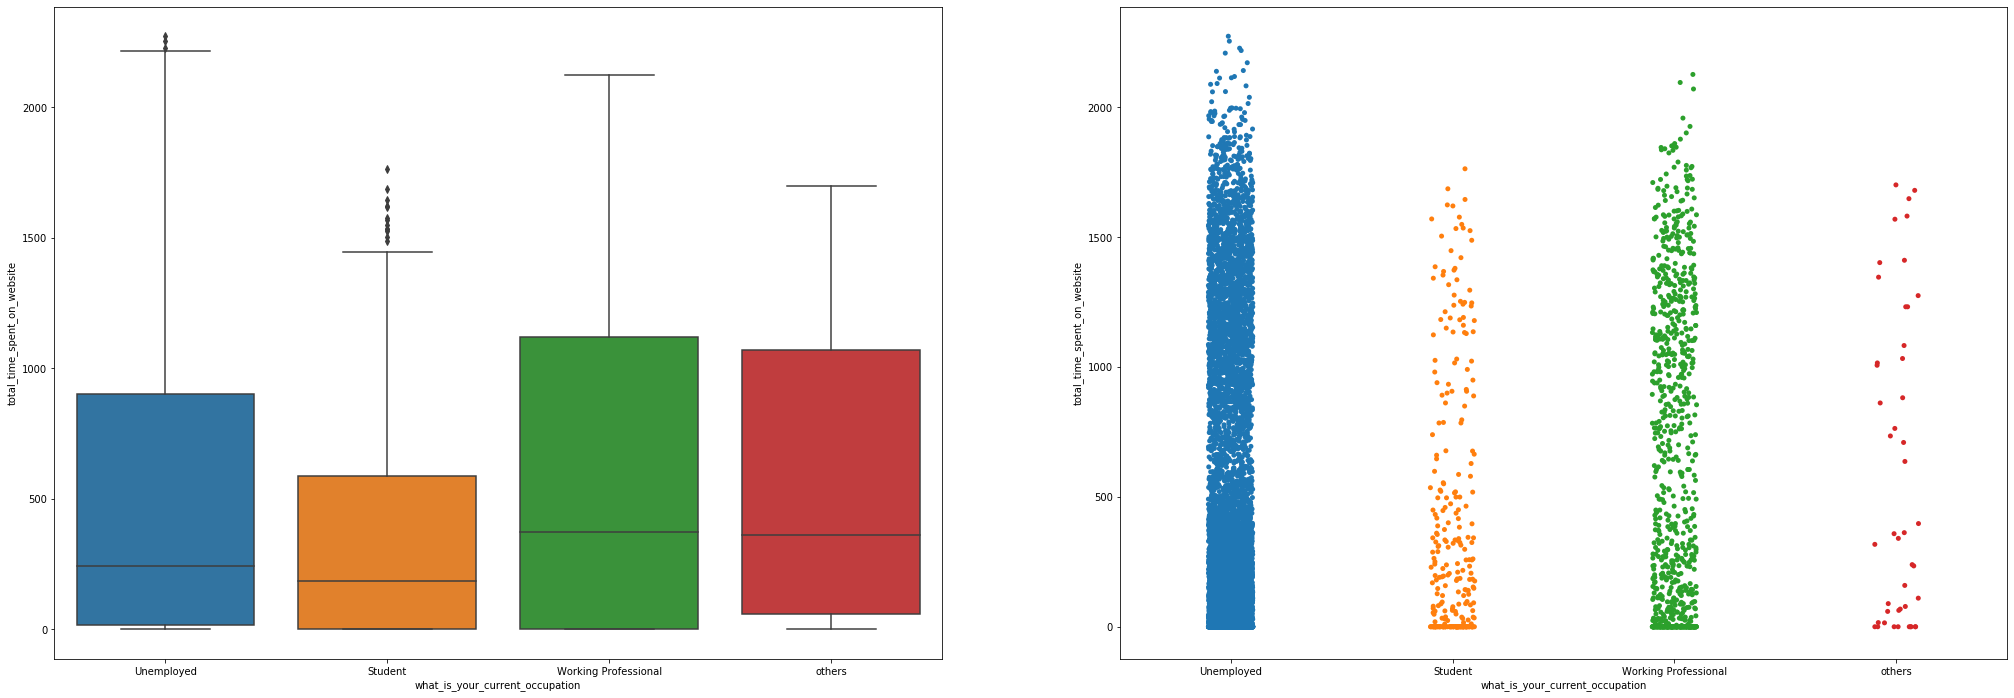

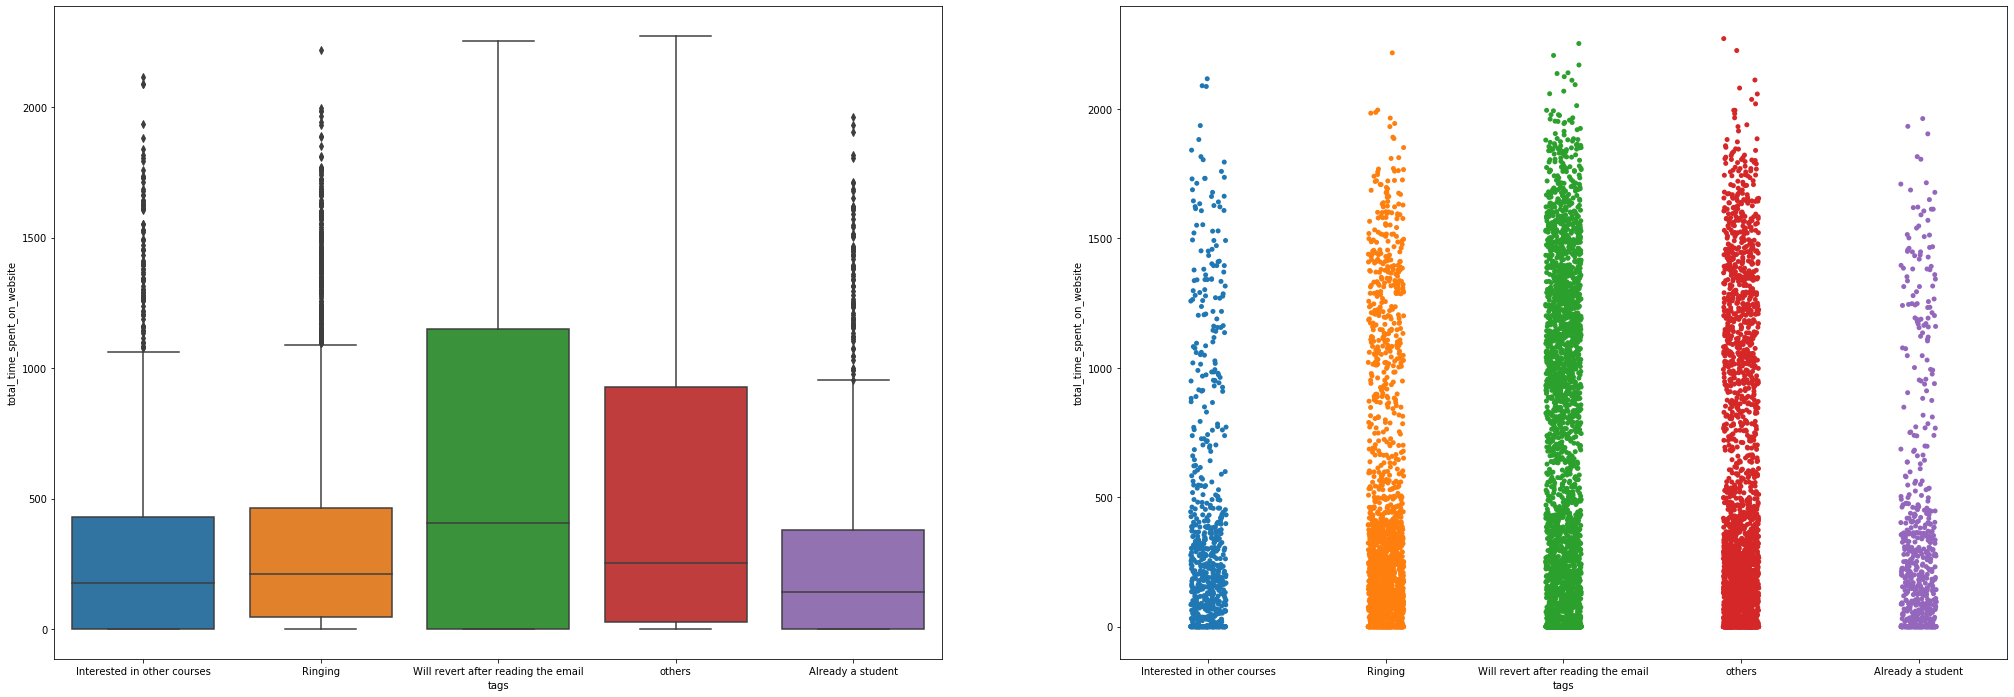

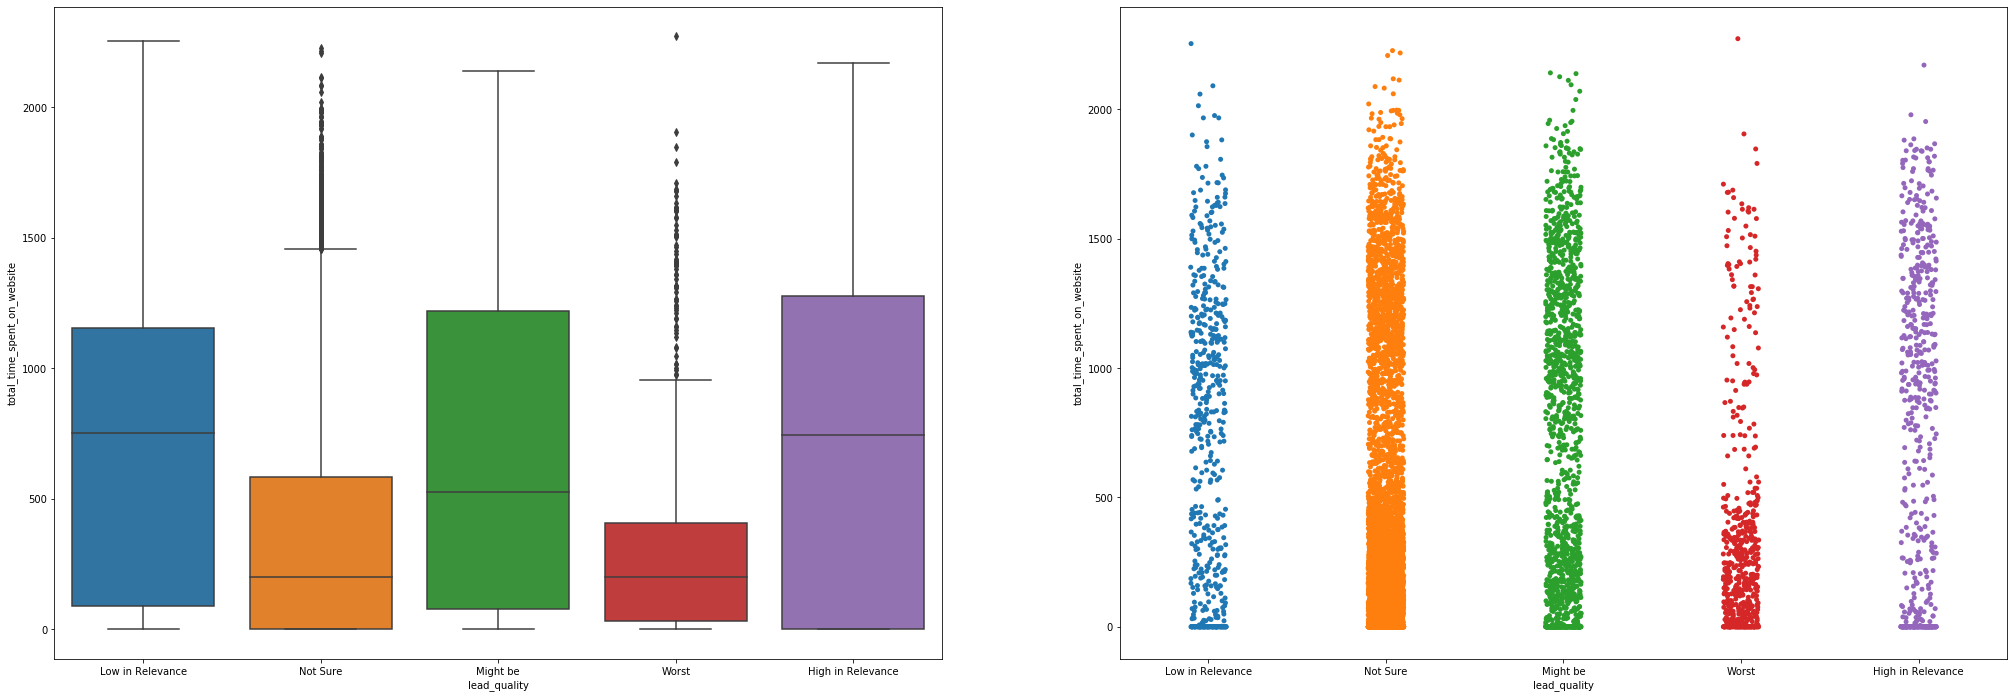

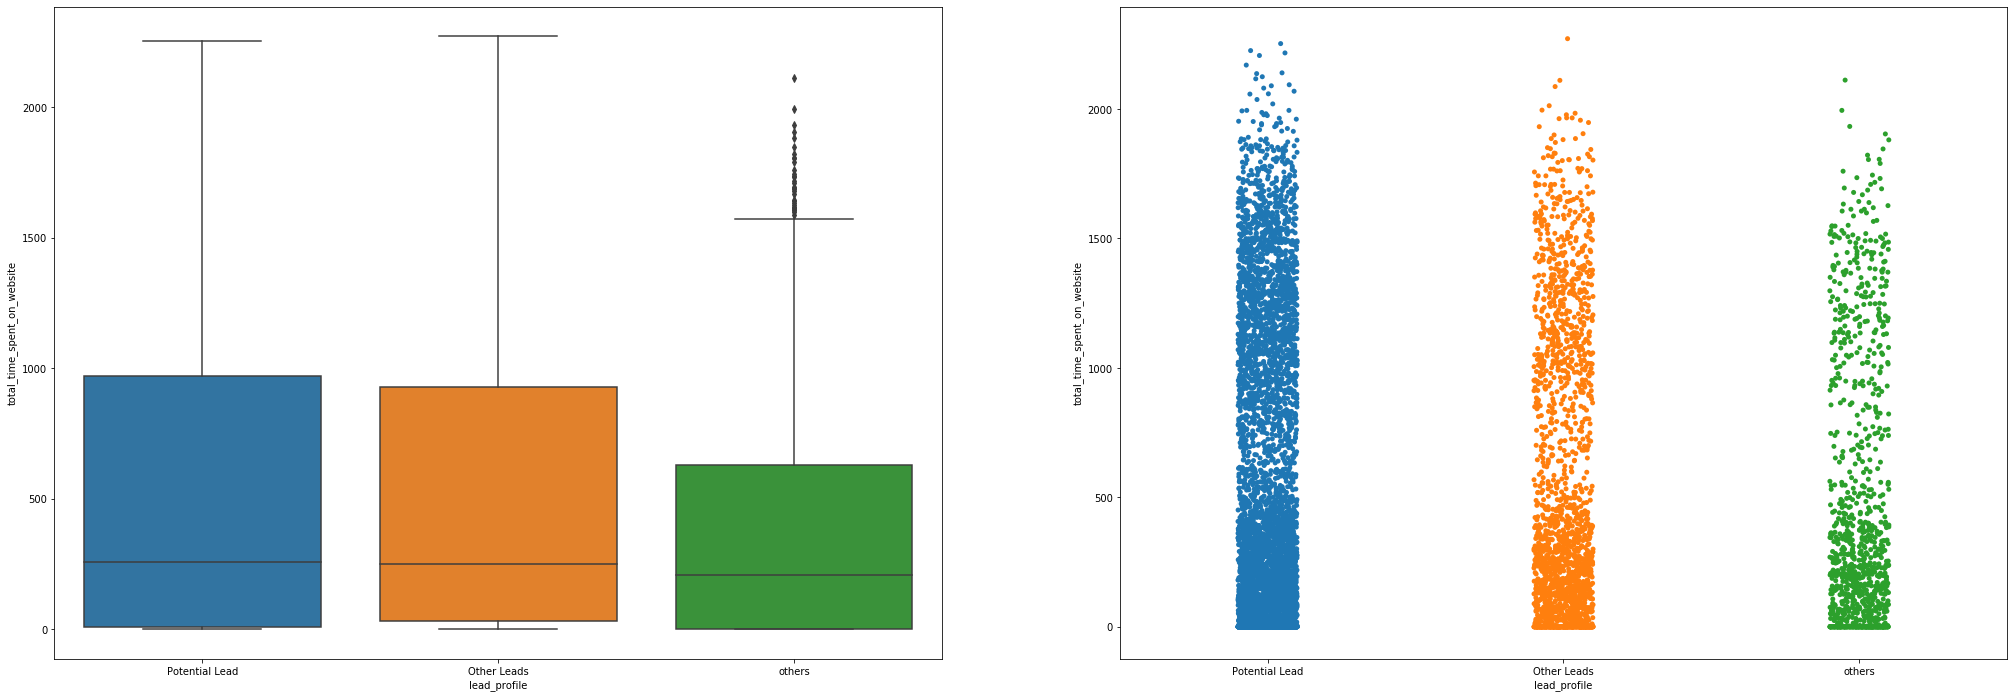

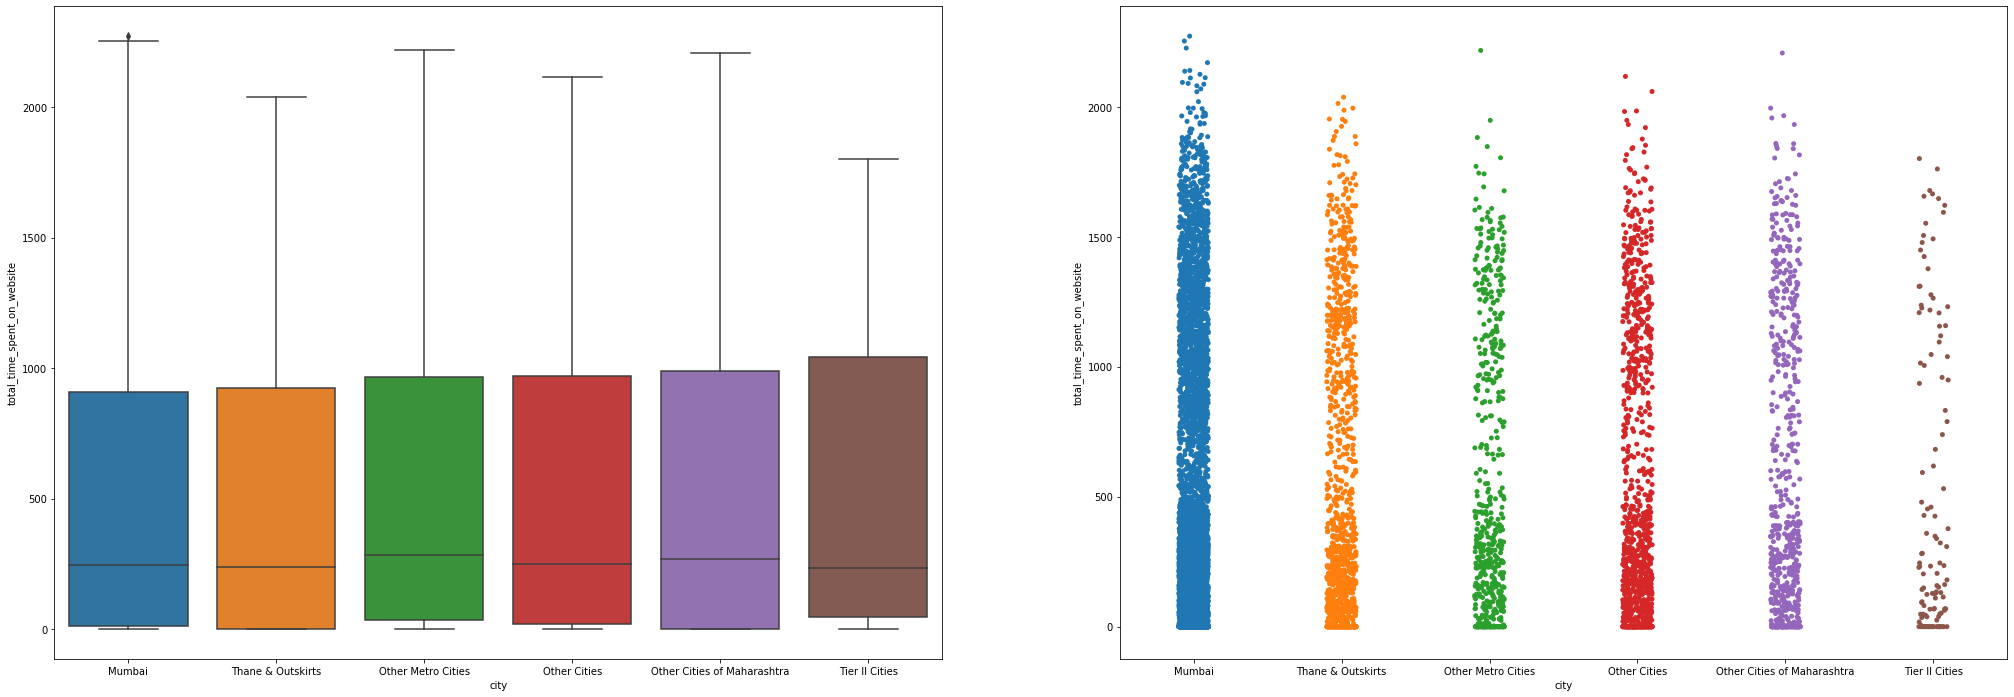

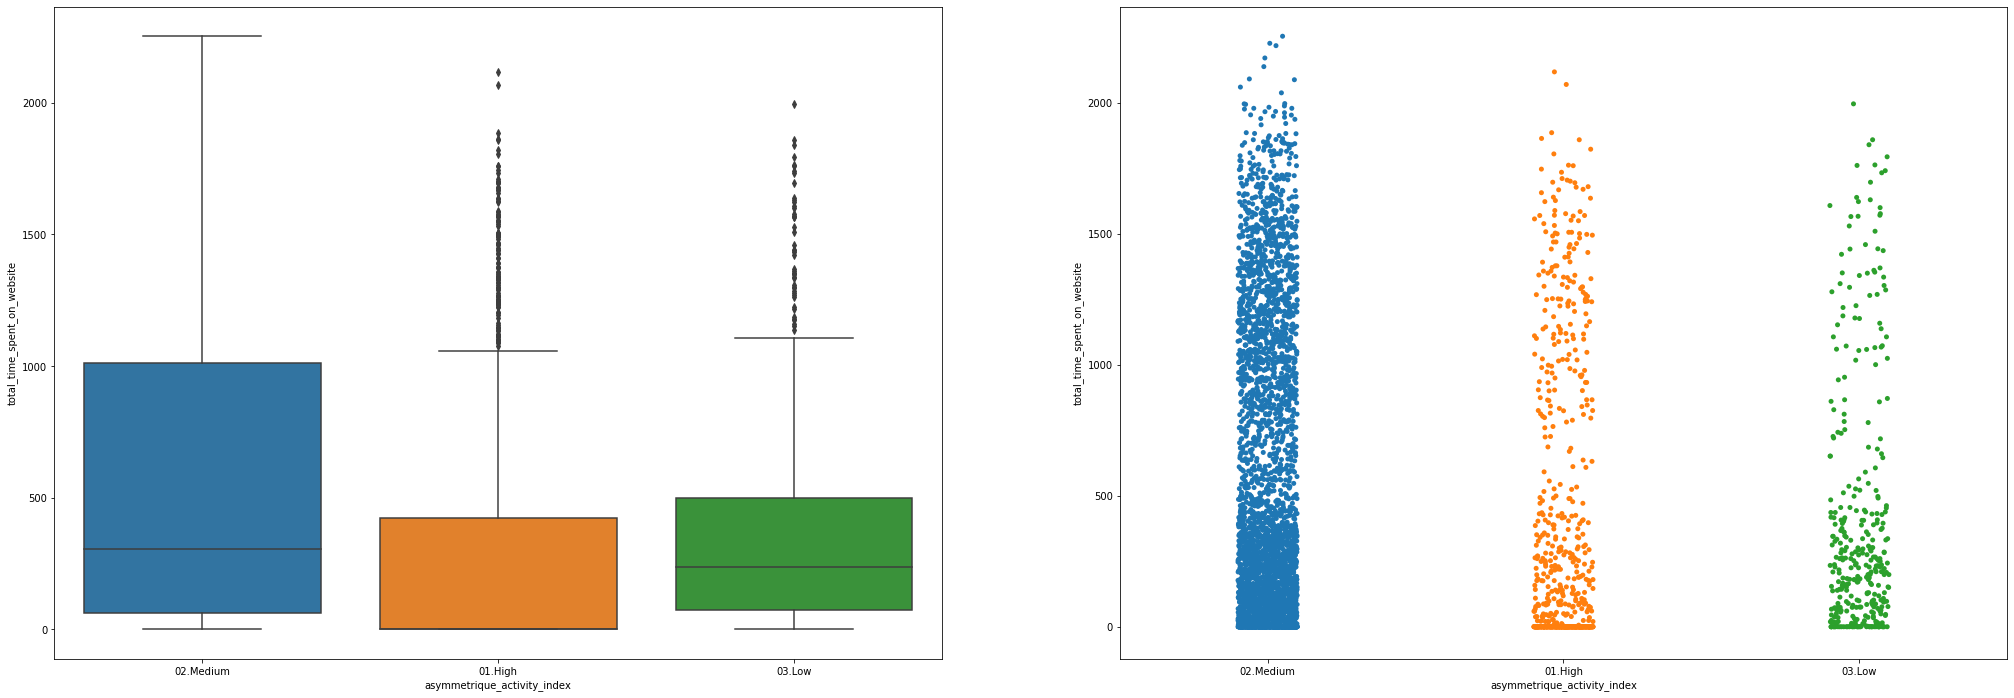

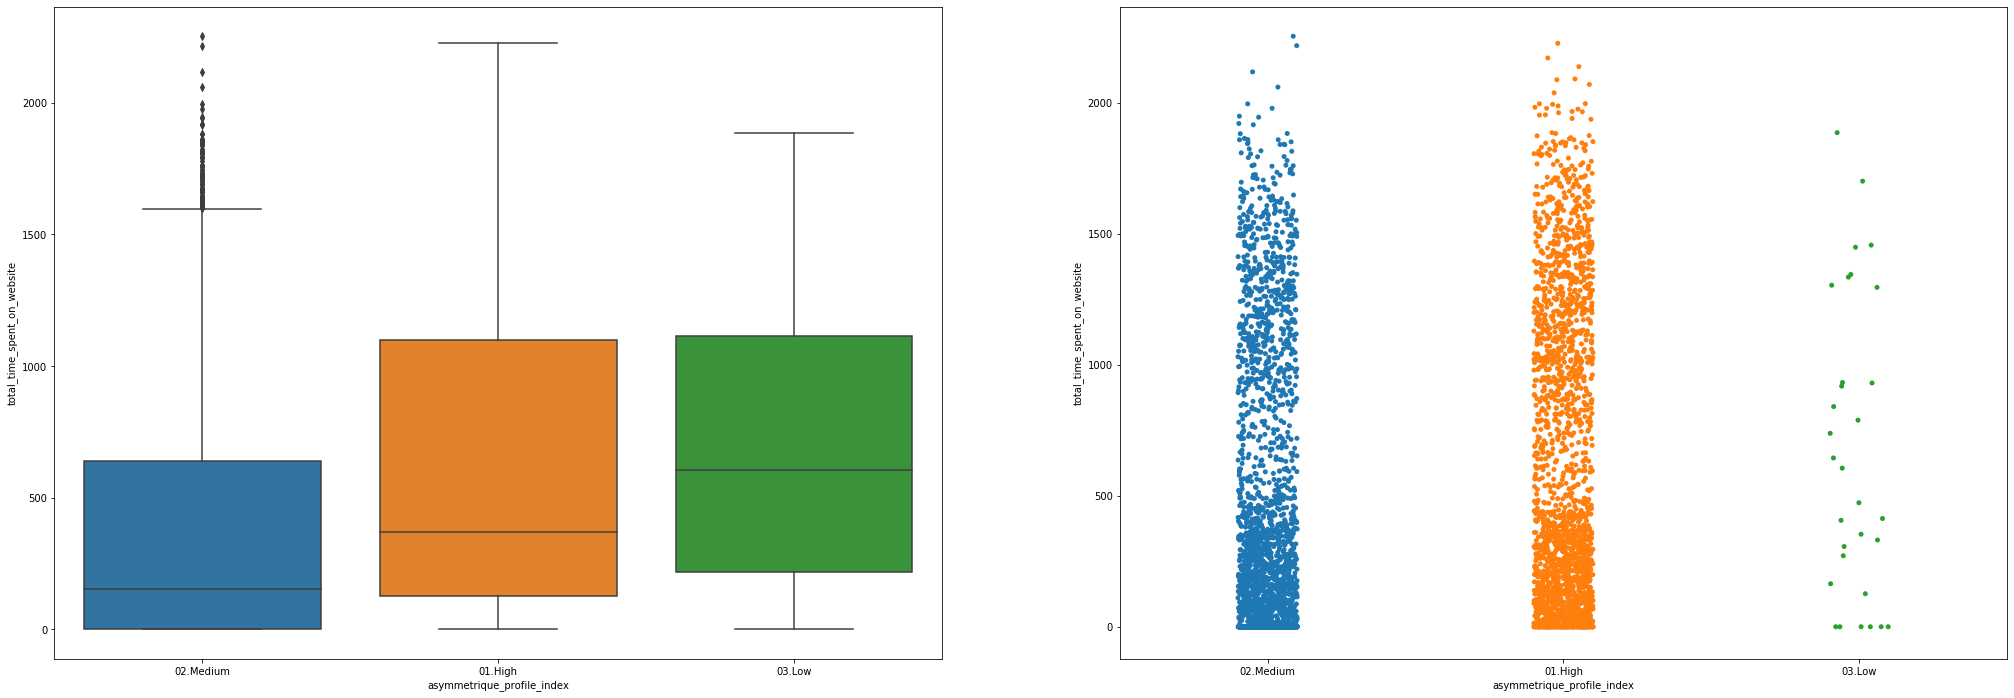

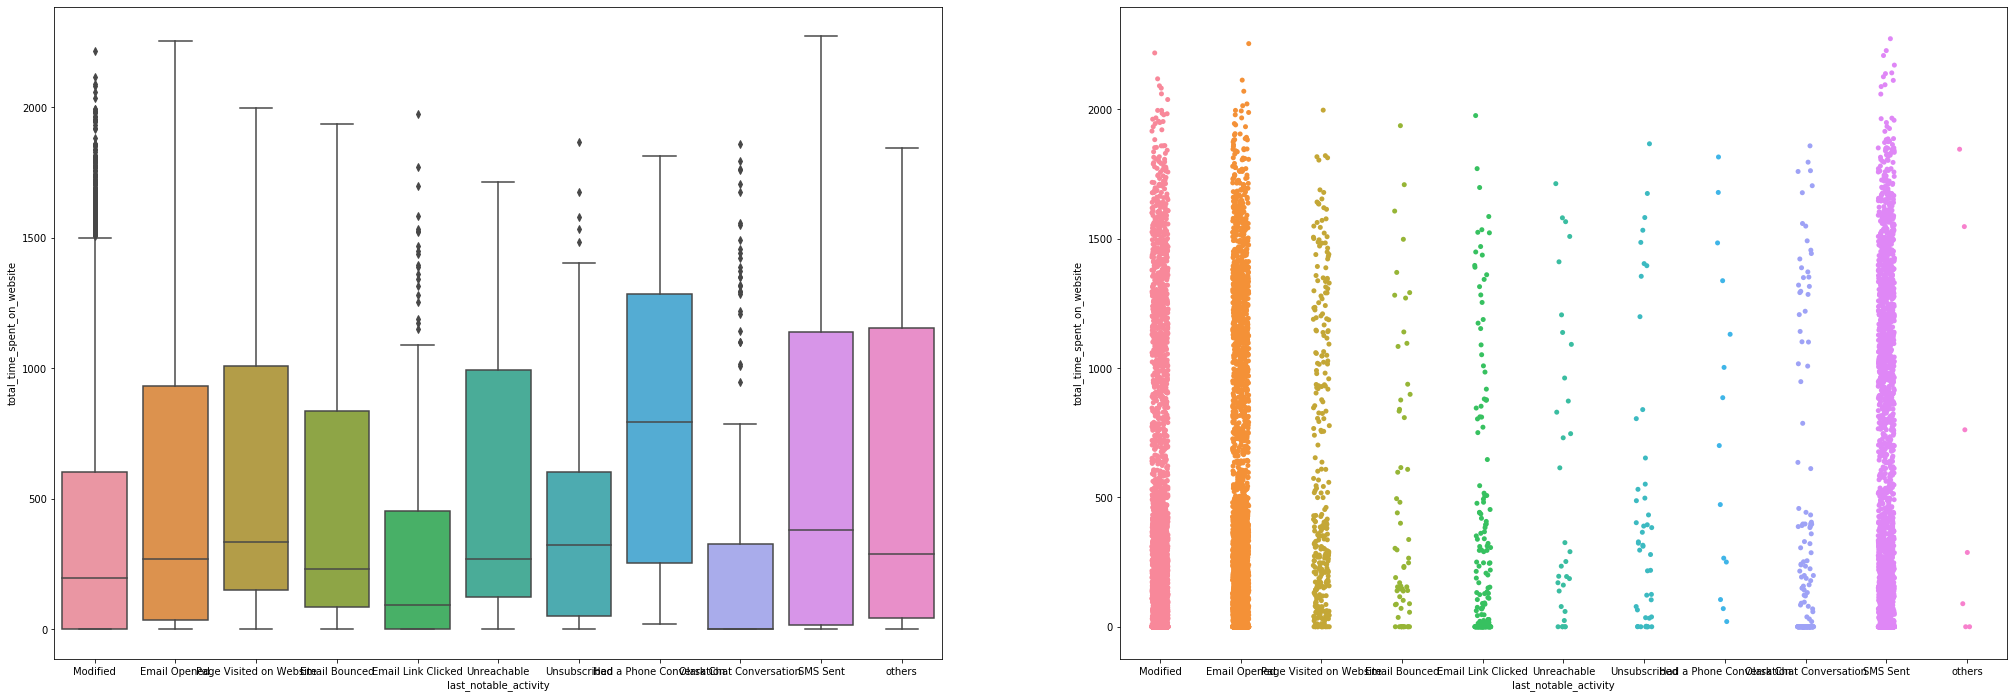

In [88]:
for i in LS_cat.columns:
  fig,ax =  plt.subplots(1,2, figsize=(35,12))
  sns.boxplot(x=LS_cat[i],y=LS_num['total_time_spent_on_website'], ax=ax[0])
  sns.stripplot(LS_cat[i], y=LS_num['total_time_spent_on_website'], ax=ax[1])
  plt.show()

Inference of Bivariate Analysis


1.Total Time spent on Website vs Lead Origin
~ Students from API and Landing Page Submission spend the highest time on the website.

2.Total Time spent on Website vs Lead Score
~ Organic Search , Direct Traffic and Google students spend the highest time on the website.

3.Total Time spent on Website vs Do Not Email
~ Most of the candidates has opted for Do Not Email but still spent a fair amount of time on the website.

4.Total Time spent on Website vs last Activity
In reference to the time spent on the website the student most specific activity was Email Opened(3437), followed by SMS Sent(2745) and Olark Chat Conversation(973).

5. Page Visited on Website vs Country
~ Most of the Page visits was from India and people spent a significant amout of time on the website compared to other countries.

6.Total Time spent on Website vs Specialization
~ Students spend a significant amount of time on website who are interested in the following courses - Finance Management , Human Resource Management, 
Marketing Management, and Operations Management.

7. Total Time spent on Website vs How did you hear about X Education
~ Students who spent significant amount of time on the website heard about X Education through Online Search , Word Of Mouth or Student of Some School.

8. Total Time spent on Website vs What is your current occupation
~ A significant number of students who have visited the website are unemployed (5600).

9.Total Time spent on Website vs What matters the most in Choosing a course.
~ People who spent a significant amout of time on the website are looking for Better Career Prospects.

10. Total Time spent on Website vs Tags
~People who spent a significant amount of time on the website Will revert after reading the email or not has responded.

11.Total Time spent on website vs Lead Quality 
~ Lead Quality is presently asessed by calling the candidates  who have spent a significant amount of time on the website has responded with Might be , Not Sure or High in Relevance.

12. Total Time spent on website vs Lead Profile
~ People who have spent a signifivant amount of time on the website are Potential leads.

13. Total Time spent on website vs City
~ People from Mumbai and Thane Outskirts have spent a significant amount of time on the website.

14. Total Time spent on website vs Asymmetric Activity Index 
~ People who have spent highest time on website has Medium Asymmetric Activity Index.

15. Total Time spent on website vs Asymmetric Profile Index
~ People who have spent highest time on website has Medium Asymmetric Profile Index.

16. Total Time spent on website vs Last Notable Activity
~ Customers who have spent more time on website, thier last notable activity was SMS Sent,Modified and Email Sent.


In [89]:
LS.asymmetrique_profile_index.value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: asymmetrique_profile_index, dtype: int64

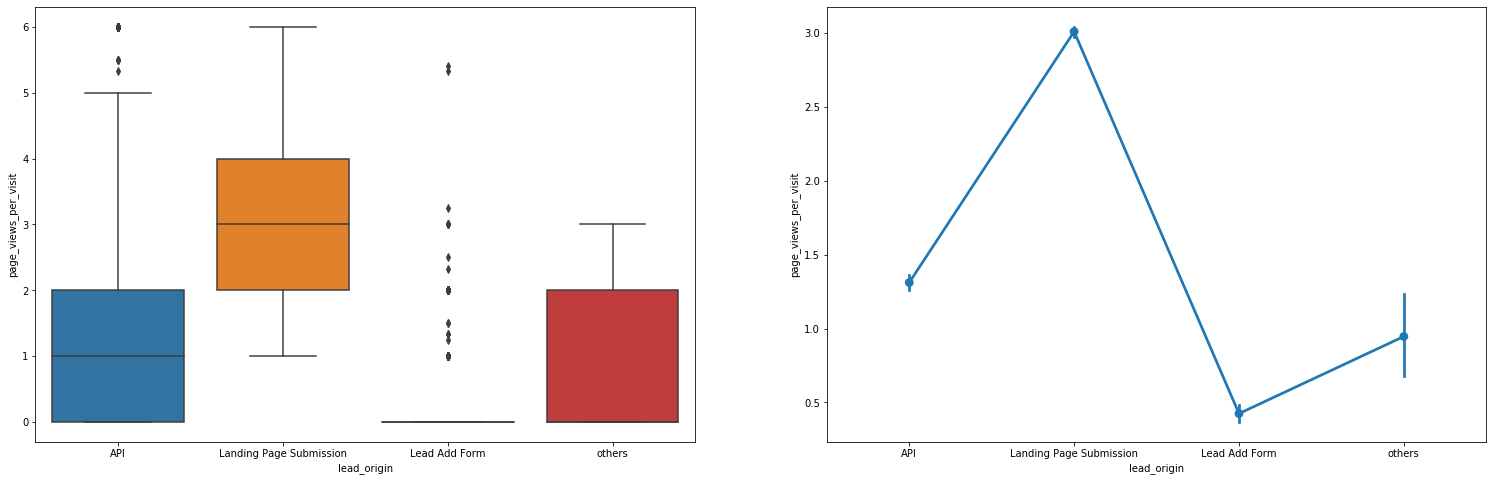

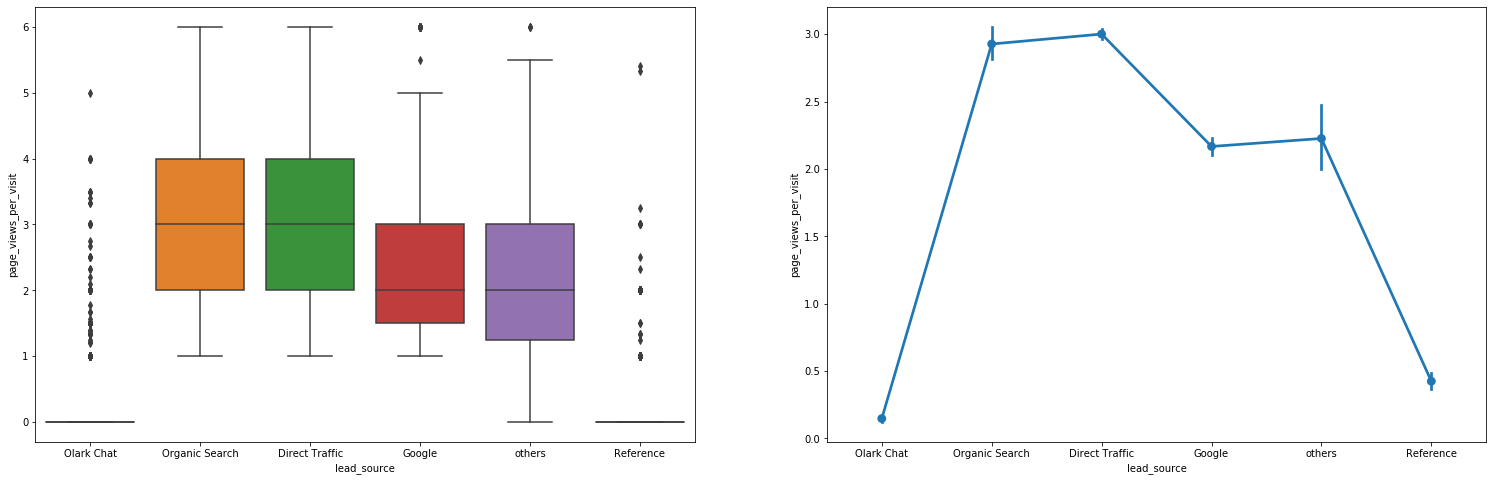

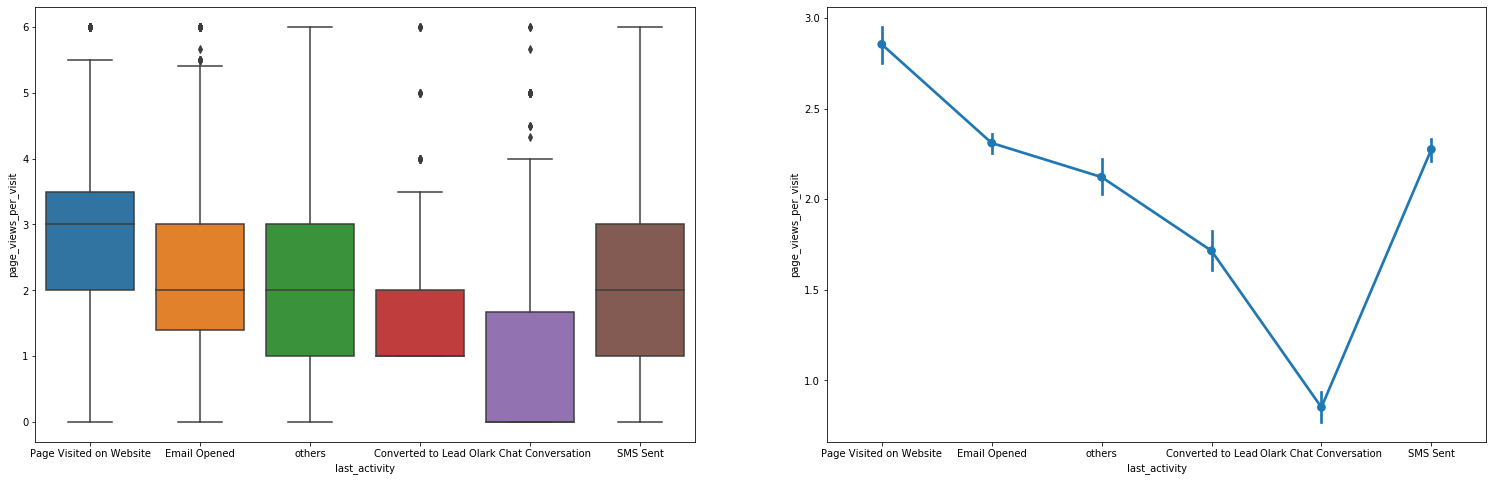

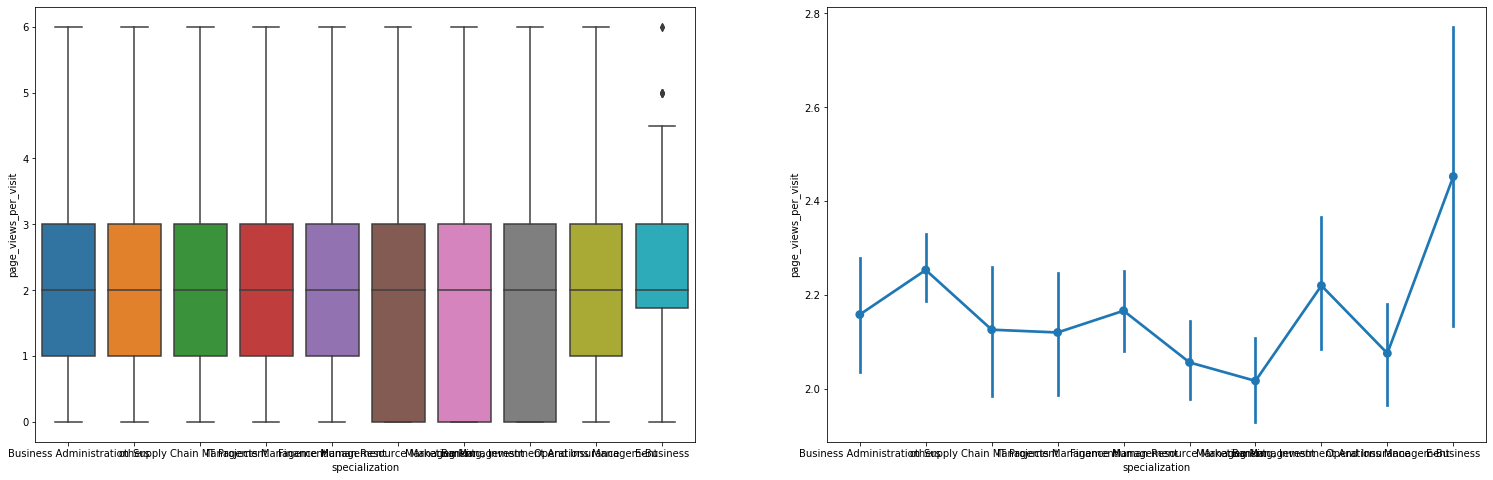

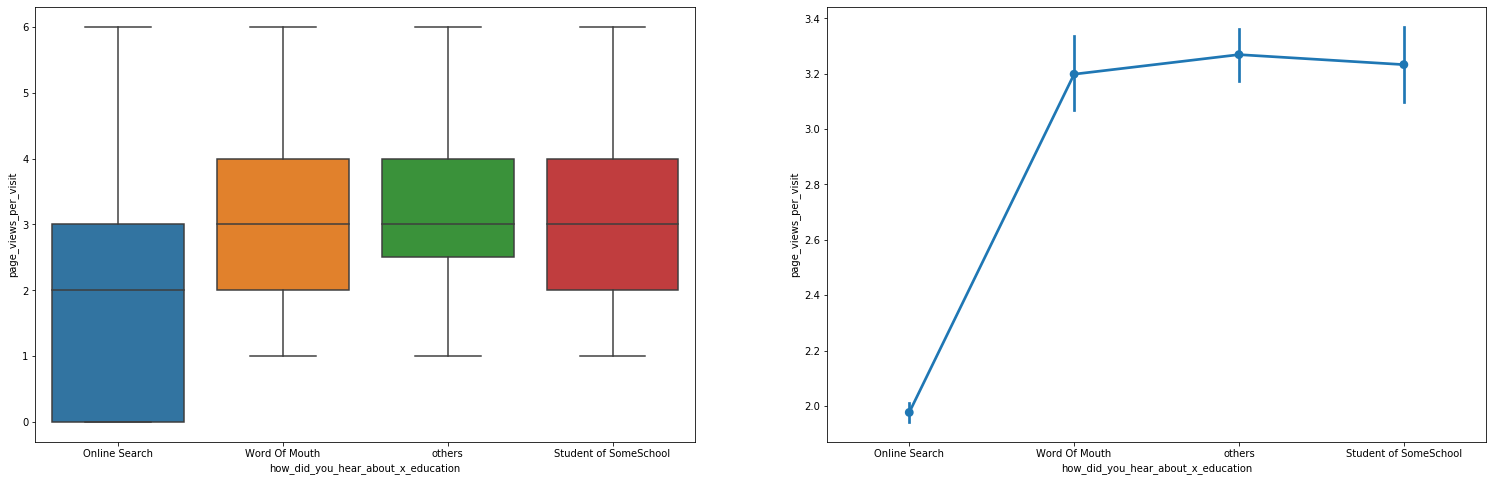

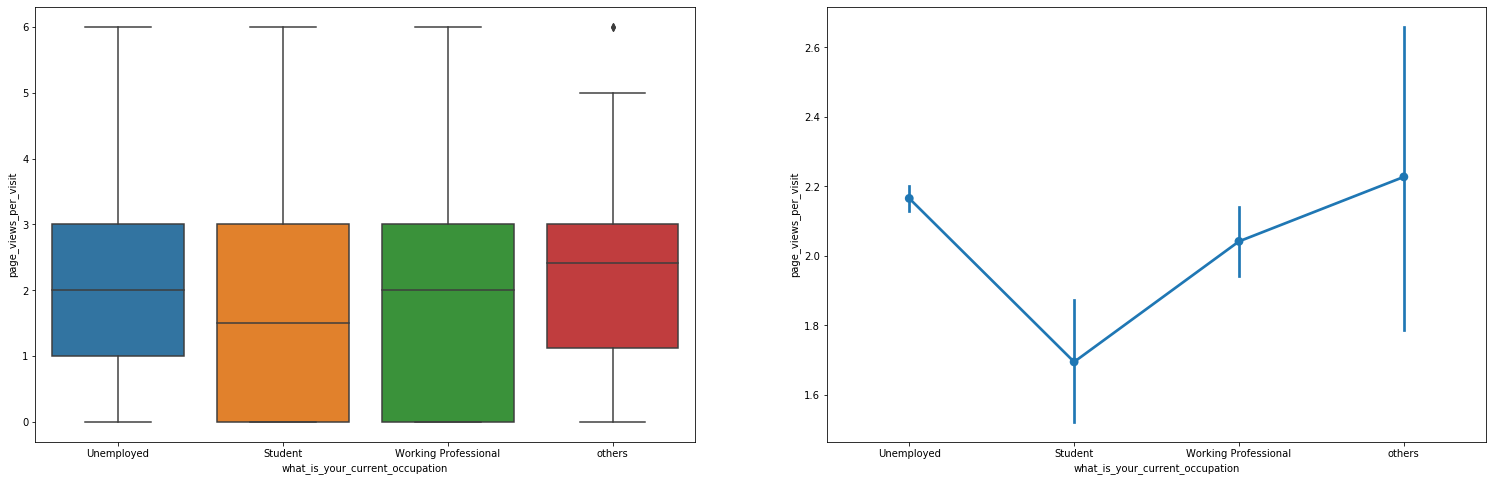

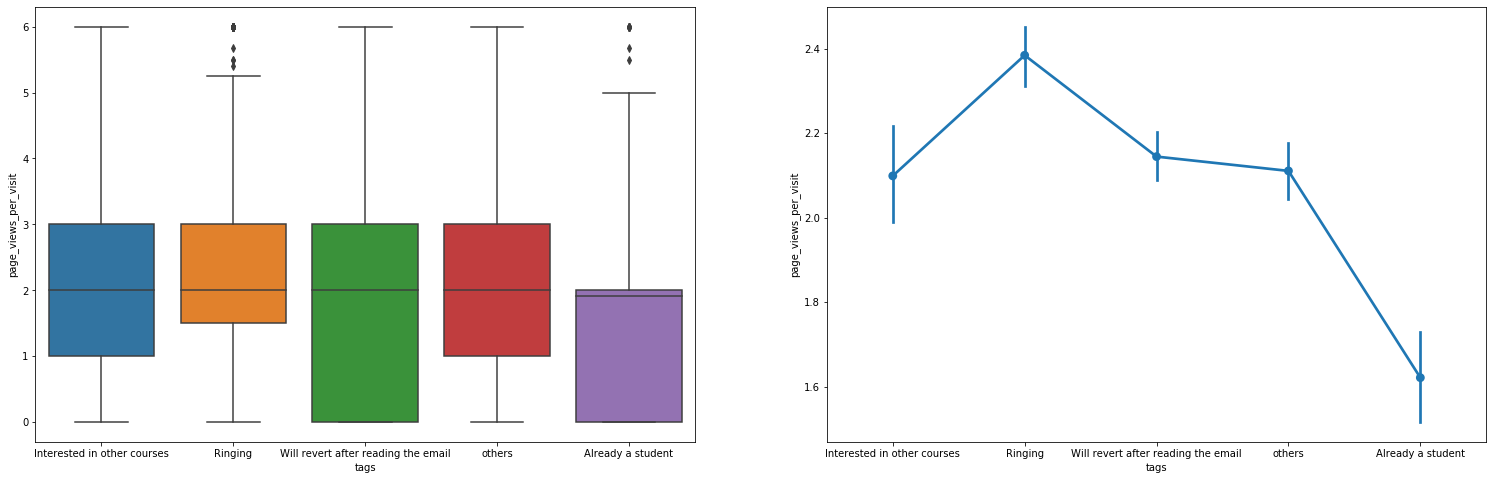

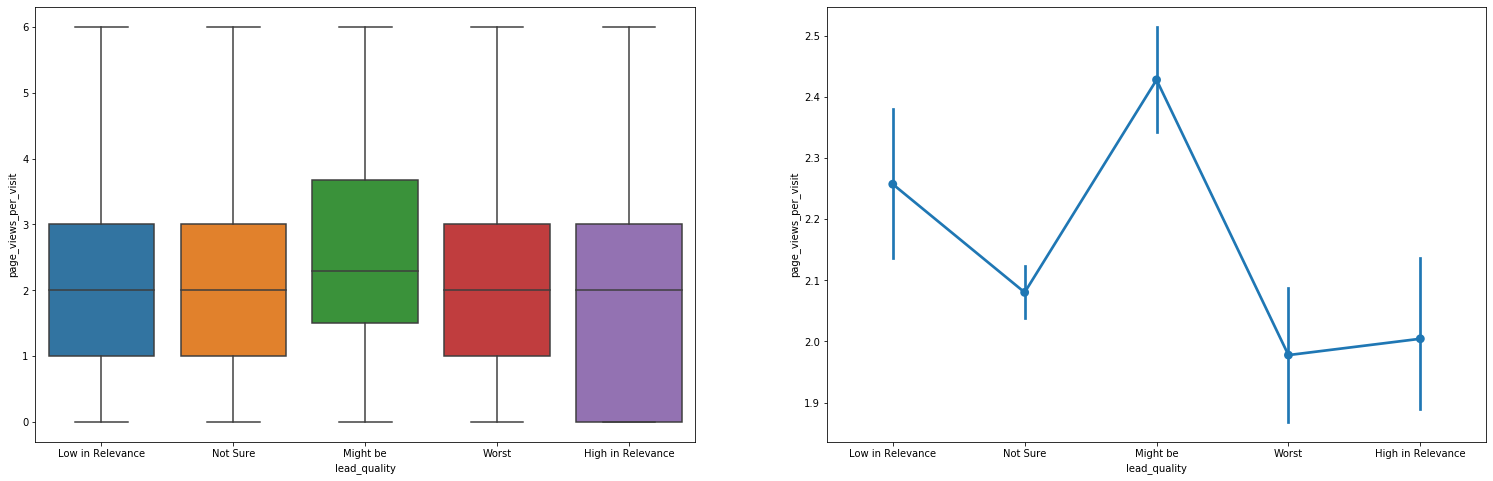

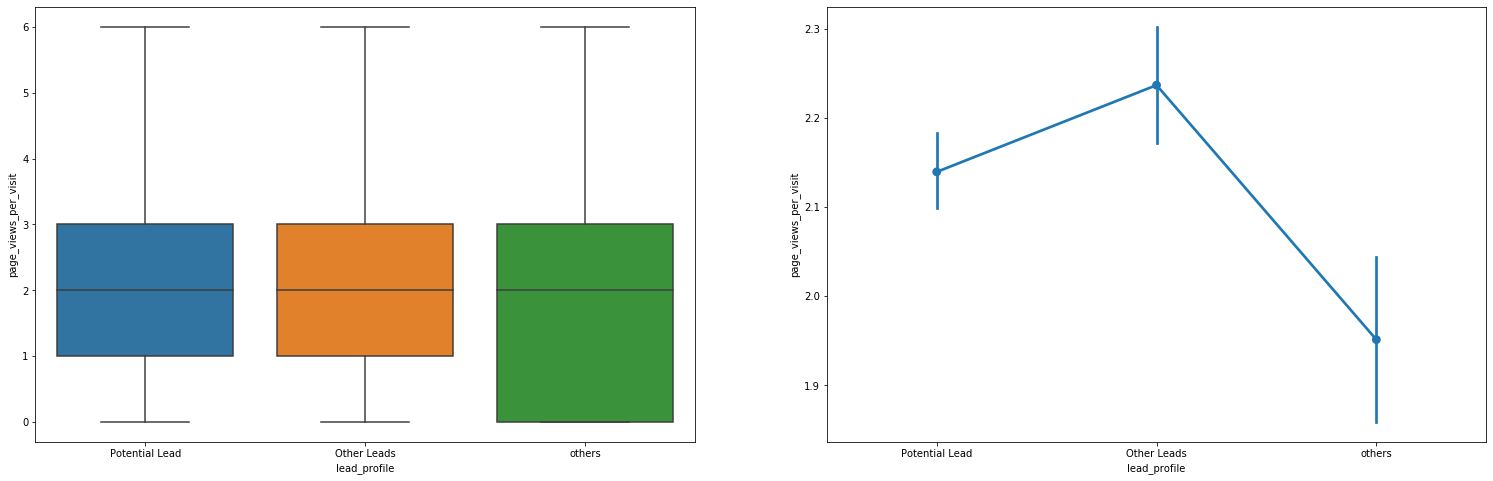

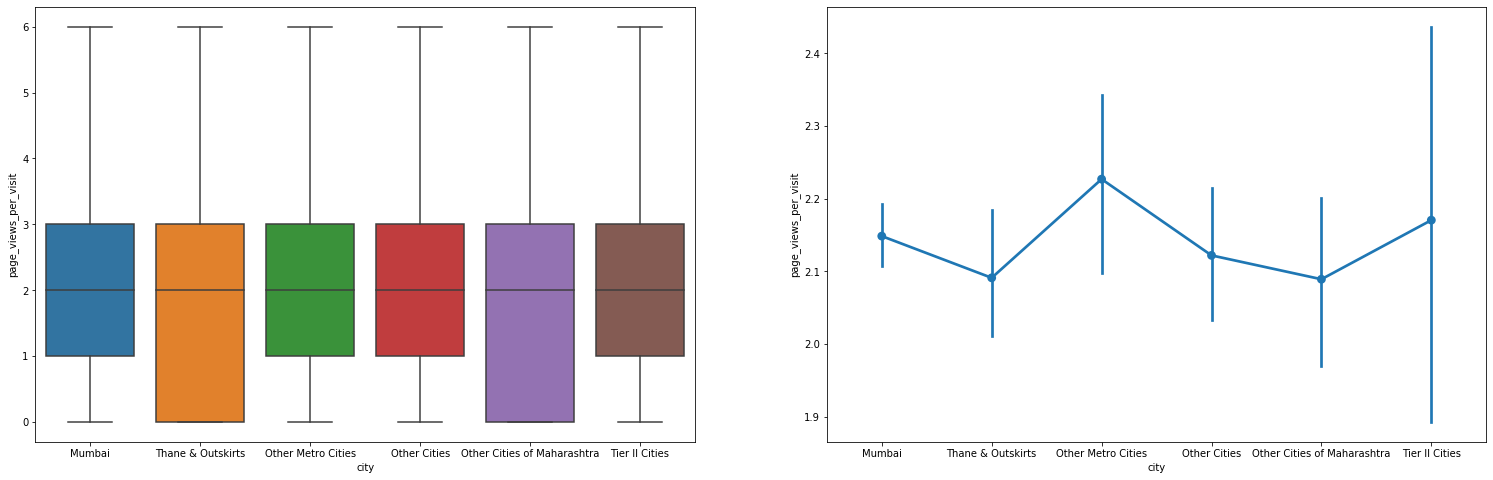

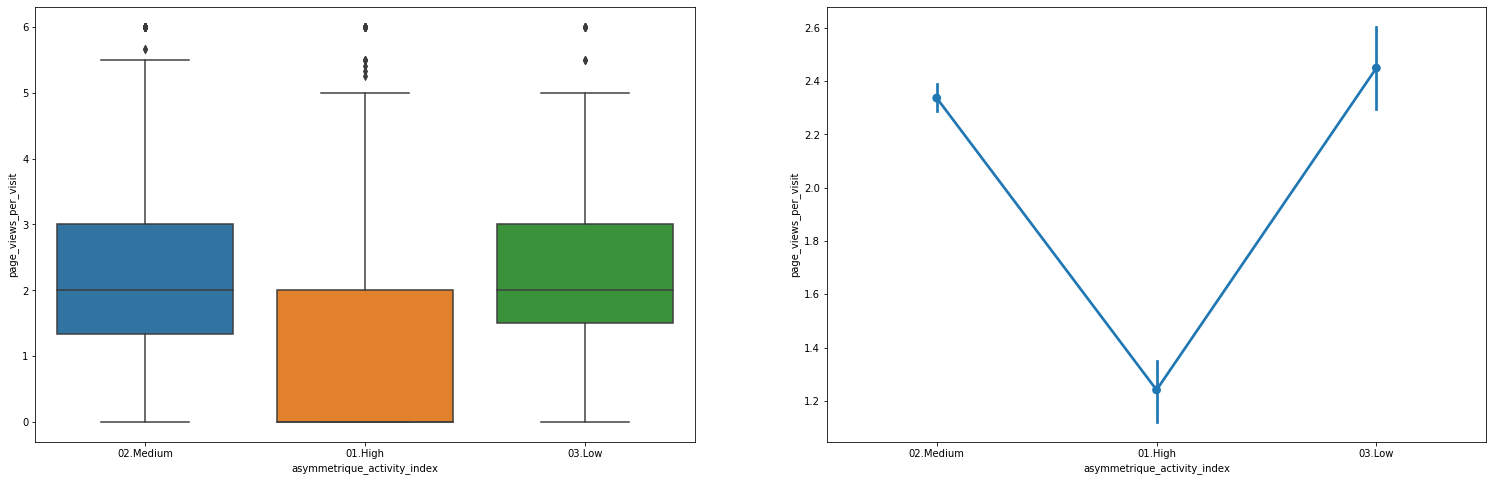

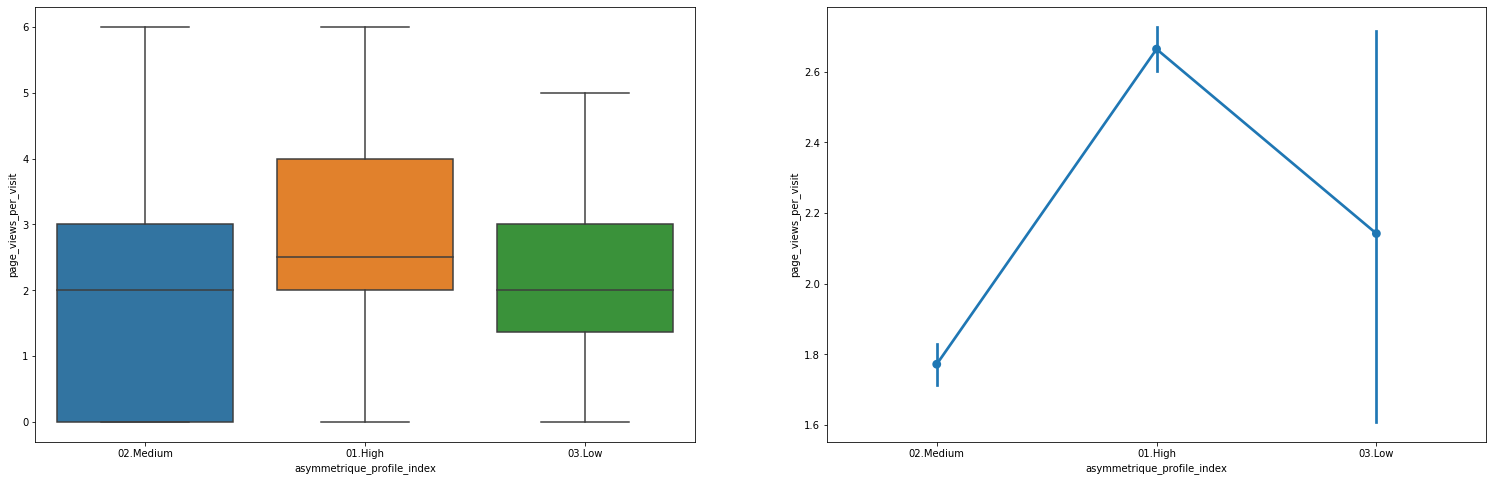

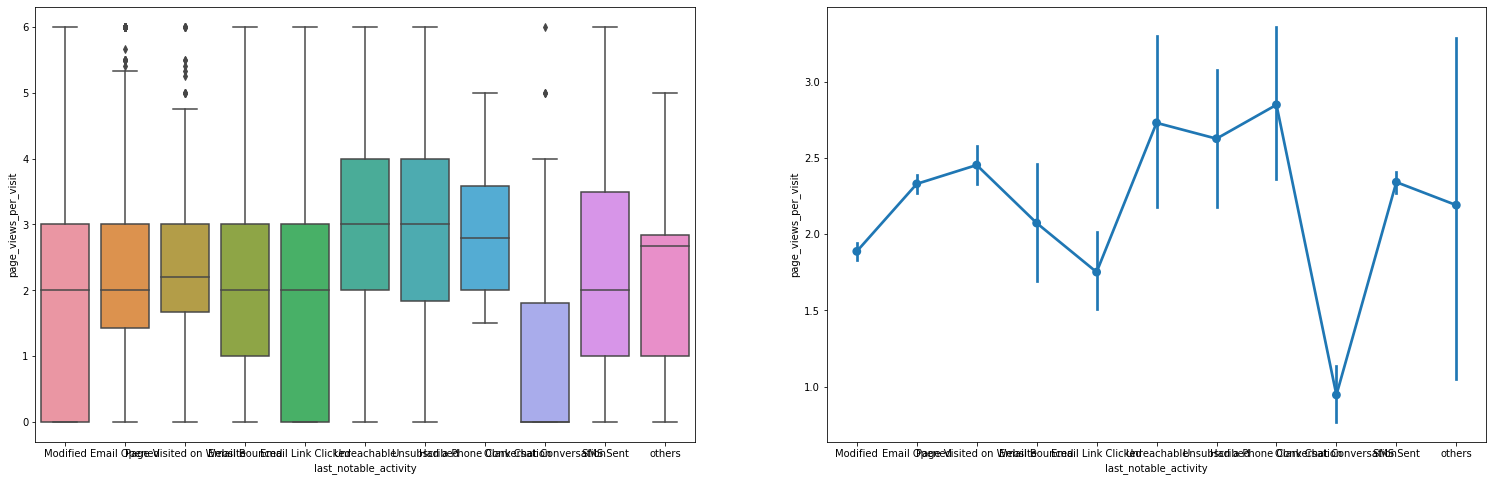

In [90]:
for i in LS_cat.columns:
  fig, ax=  plt.subplots(1, 2, figsize=(26,8))
  sns.boxplot(x=LS_cat[i],y=LS_num['page_views_per_visit'],ax=ax[0])
  sns.pointplot(LS_cat[i], y=LS_num['page_views_per_visit'], ax=ax[1])
  plt.show()

1.Page views per visit vs Lead Origin ~ Leads from Landing Page Submission spend the highest time on the website. 
2.Page views per visit vs Lead Score ~ Direct Traffic generates the highest views 
3. Page views per visit vs How did you hear about X Education ~ Word Of Mouth and Student of Some School generates lower views. Other sources generate the highest views
4. Page views per visit vs What is your current occupation ~ Unemployed and Working Professional generates lower views. Other occupation has generated the highest views
5. Page views per visit on Website vs Tags ~ Will revert after reading mail generates lower views. Touchpoint call/Ringing has generated the highest views
6. Page views per visit vs Lead Quality ~ Leads who generate high page visits, generally who compare between courses, are assessed as might be
7. Page views per visit vs Lead Profile ~ Leads who generate high page visits, generally who compare between courses, are assigned to Other Leads

8. Page views per visit vs City ~ Leads from Mumbai generates lower views. Other cities has generated the highest views

## Categorical- Categorical



# **Multivariate Analysis**

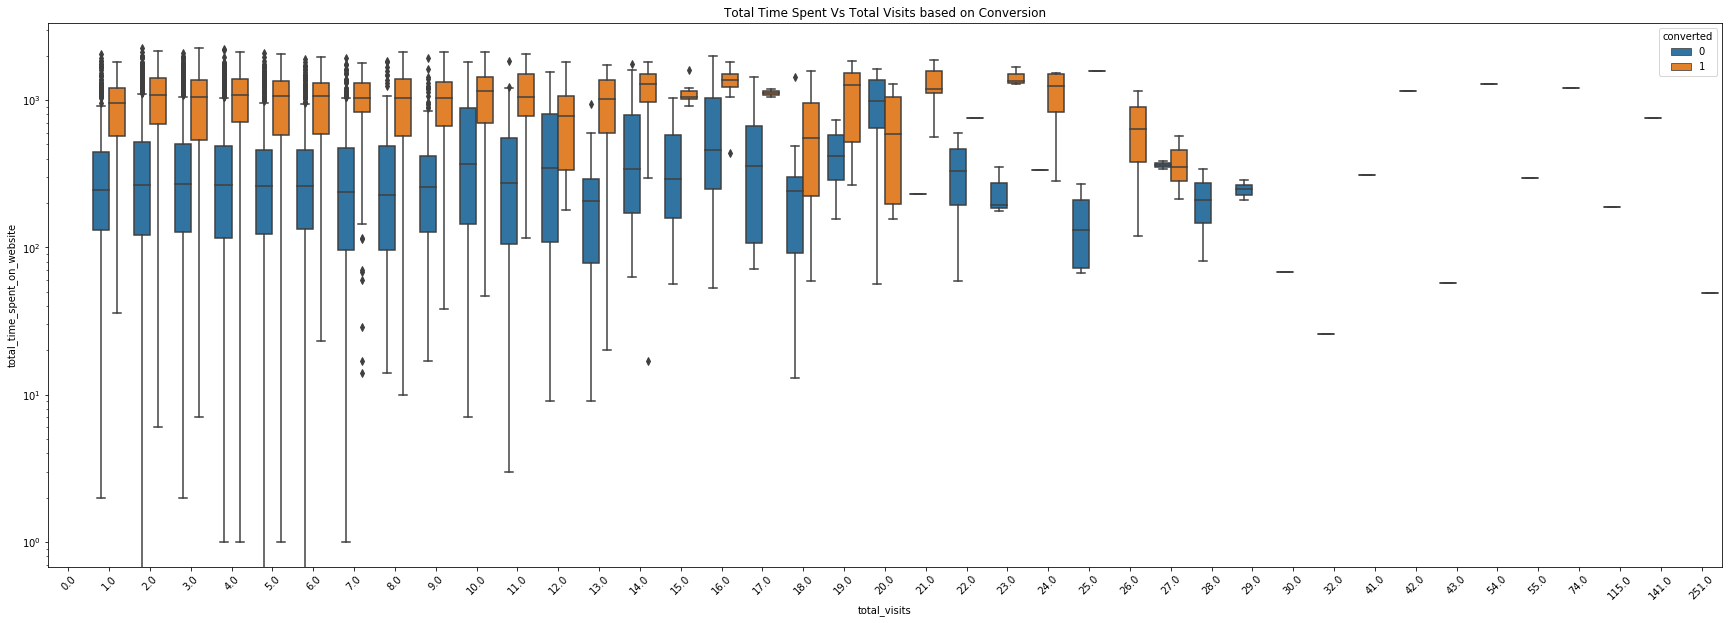

In [94]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =LS, x='total_visits',y='total_time_spent_on_website', hue ='converted',orient='v')
plt.title('Total Time Spent Vs Total Visits based on Conversion')
plt.show()

Observation

From the above bar plot we can infer that:

The highest number of conversions happen when people are spending around 18 hours or above on the website

People who spent around 3 hours on the website didn't opt for any courses.

From the boxplot we can see better that the longer you stay on the website, the higher your chances of conversion as well.

Overall it is safe to say that the more time the user spends on the website, the better their chances of becoming a student.



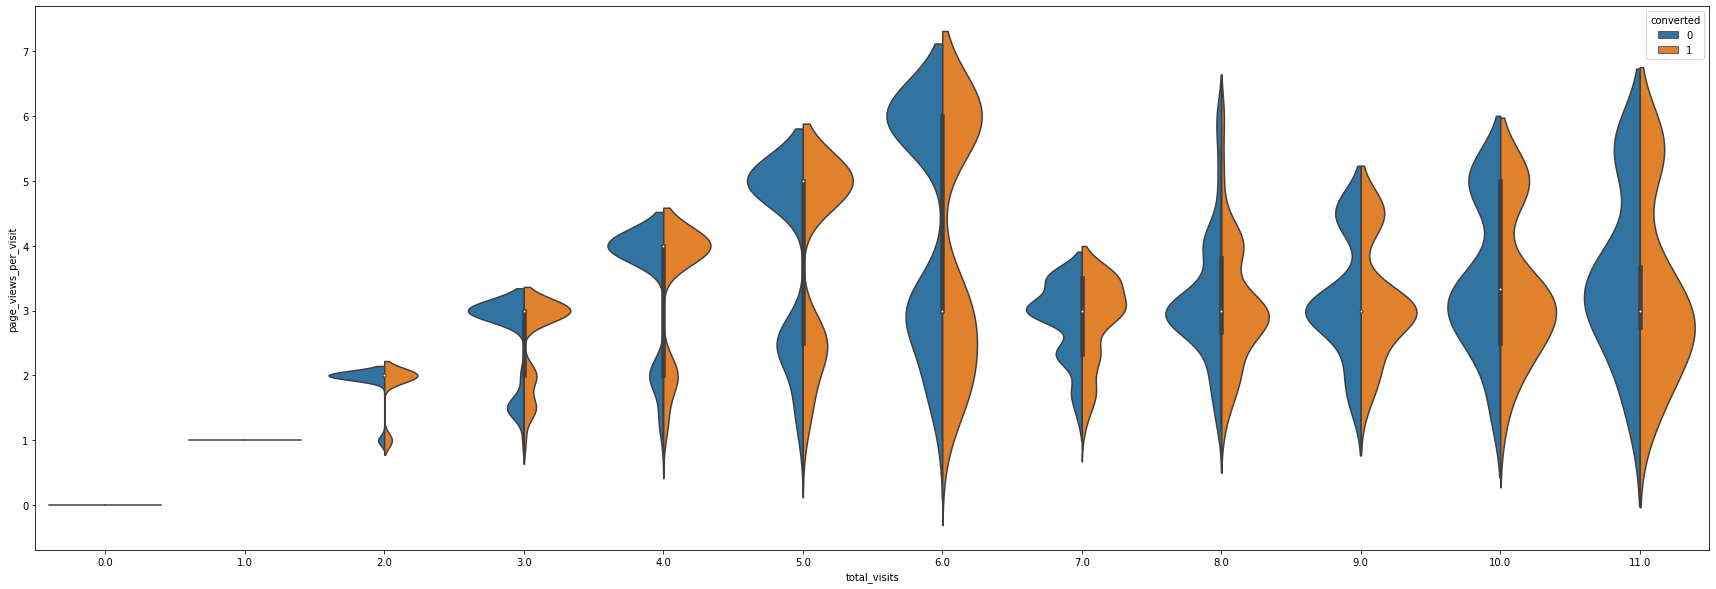

In [95]:
plt.subplots(figsize=(30,10))
sns.violinplot(x = LS_num['total_visits'], y=LS_num['page_views_per_visit'] , hue =LS['converted'] , split= True)
plt.show()

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(LS1.corr(),annot=True)
plt.show()

NameError: name 'LS1' is not defined

<Figure size 1080x1080 with 0 Axes>

1. Page_views_per_visit is highly correlated with total_visits.So we can drop anyone of them. Page_views_per_visit correlation with Converted is very low. It is not a good indicator for customers getting converted.So we are going to do ttest and verify whether this feature i significant or not.
2. Total_time_spent_on_website has positive linear relation with target variable converted 0.34

In [97]:
plt.figure(figsize=(50,50))
sns.pairplot(LS1,hue='converted')
plt.show()

NameError: name 'LS1' is not defined

<Figure size 3600x3600 with 0 Axes>

We need to do transformation as features are overlapping.

In [98]:
def correlation(dataframe) : 
    cor0=dataframe.corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [99]:
convertedCondition= LS1['converted']==1
print('Correlations for converted Leads')
correlation(LS1[convertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()



NameError: name 'LS1' is not defined

In [100]:
#Correlations for un-Converted Leads 
unconvertedCondition=LS1['converted']==0
print('Correlations for Non-Converted Leads')
correlation(LS1[unconvertedCondition])[1:30:2].style.background_gradient(cmap='GnBu').hide_index()

NameError: name 'LS1' is not defined

In [101]:
#Exporting CSV file
LS1.to_csv("LS1.xls")
from google.colab import files
files.download("LS1.xls")

NameError: name 'LS1' is not defined

# Transformation and Scaling:

In [102]:
LS_num.columns


Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit'], dtype='object')

In [103]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
LS_num_pt=pd.DataFrame(pt.fit_transform(LS_num),columns=LS_num.columns)
LS_num_pt


total_visits  total_time_spent_on_website  page_views_per_visit
0        -1.447852                    -1.473767             -1.460157
1         0.812110                     0.729628              0.337853
2        -0.216838                     1.306093              0.046968
3        -0.721778                     0.264936             -0.613575
4        -0.216838                     1.252499             -0.613575
...            ...                          ...                   ...
9235      1.527680                     1.451936              0.432250
9236     -0.216838                     0.135767              0.046968
9237     -0.216838                     0.046959              0.046968
9238      0.182937                     0.543662              0.609816
9239      1.073368                     1.170162              0.609816

[9240 rows x 3 columns]

In [104]:
LS1=pd.concat([LS_num_pt,LS_cat,LS['converted']],axis=1)
LS1

total_visits  total_time_spent_on_website  page_views_per_visit  \
0        -1.447852                    -1.473767             -1.460157   
1         0.812110                     0.729628              0.337853   
2        -0.216838                     1.306093              0.046968   
3        -0.721778                     0.264936             -0.613575   
4        -0.216838                     1.252499             -0.613575   
...            ...                          ...                   ...   
9235      1.527680                     1.451936              0.432250   
9236     -0.216838                     0.135767              0.046968   
9237     -0.216838                     0.046959              0.046968   
9238      0.182937                     0.543662              0.609816   
9239      1.073368                     1.170162              0.609816   

                  lead_origin     lead_source            last_activity  \
0                         API      Olark Chat  Page Visited on Website   
1                         API  Organic Search             Email Opened   
2     Landing Page Submission  Direct Traffic             Email Opened   
3     Landing Page Submission  Direct Traffic                   others   
4     Landing Page Submission  Direct Traffic        Converted to Lead   
...                       ...             ...                      ...   
9235  Landing Page Submission  Direct Traffic                   others   
9236  Landing Page Submission  Direct Traffic                 SMS Sent   
9237  Landing Page Submission  Direct Traffic                 SMS Sent   
9238  Landing Page Submission  Direct Traffic                 SMS Sent   
9239  Landing Page Submission  Direct Traffic                 SMS Sent   

                 specialization how_did_you_hear_about_x_education  \
0       Business Administration                      Online Search   
1       Business Administration                      Online Search   
2       Business Administration                      Online Search   
3                        others                      Word Of Mouth   
4       Supply Chain Management                             others   
...                         ...                                ...   
9235     IT Projects Management                      Online Search   
9236                     others                      Online Search   
9237    Business Administration                      Online Search   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                      Online Search   

     what_is_your_current_occupation                                 tags  \
0                         Unemployed          Interested in other courses   
1                         Unemployed                              Ringing   
2                            Student  Will revert after reading the email   
3                         Unemployed                              Ringing   
4                         Unemployed  Will revert after reading the email   
...                              ...                                  ...   
9235                      Unemployed  Will revert after reading the email   
9236                      Unemployed                               others   
9237                      Unemployed                               others   
9238                      Unemployed  Will revert after reading the email   
9239                      Unemployed  Will revert after reading the email   

           lead_quality    lead_profile                city  \
0      Low in Relevance  Potential Lead              Mumbai   
1              Not Sure  Potential Lead              Mumbai   
2              Might be  Potential Lead              Mumbai   
3              Not Sure  Potential Lead              Mumbai   
4              Might be  Potential Lead              Mumbai   
...                 ...             ...                 ...   
9235  High in Relevance  Potentia

<Figure size 3600x3600 with 0 Axes>

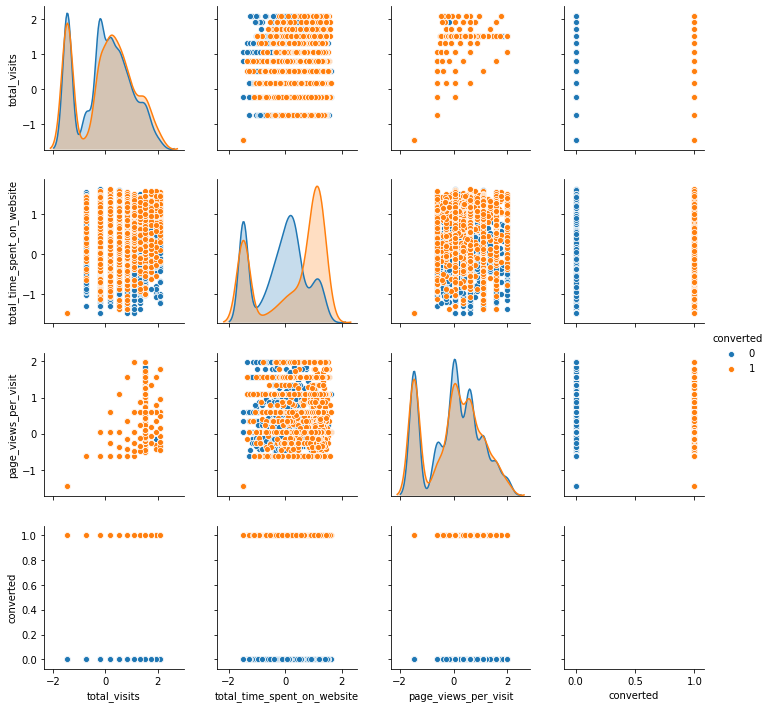

In [105]:
plt.figure(figsize=(50,50))
sns.pairplot(LS1,hue='converted')
plt.show()

In [136]:
from statsmodels.stats import contingency_tables
import scipy.stats as stats

In [137]:
for LS_cat in LS_cat.columns:
    s1=stats.chisquare(x, y),p.value, LS_cat[: -5], MoreArgs=list(LS_cat[:5])
  

SyntaxError: can't assign to function call (<ipython-input-137-b7a333e5aaac>, line 2)

In [160]:
for i in LS_cat.columns:
    p1[i]=pd.crosstab(LS_cat[i],LS1['converted']).sum()
p1[i]

converted
0    5679
1    3561
dtype: int64

In [161]:
pvalue=stats.chi2_contingency(p1[i])
pvalue

(0.0, 1.0, 0, array([5679., 3561.]))

In [190]:
for i in LS_cat.columns:
    print(LS1.groupby(['converted']).count()[i])
    print(stats.chi2_contingency(LS1.groupby(['converted']).count()[i]))



converted
0    5679
1    3561
Name: lead_origin, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: lead_source, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: last_activity, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: specialization, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: how_did_you_hear_about_x_education, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: what_is_your_current_occupation, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: tags, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: lead_quality, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: lead_profile, dtype: int64
(0.0, 1.0, 0, array([5679., 3561.]))
converted
0    5679
1    3561
Name: city, dtype: int64
(0.0, 1.0, 

In [205]:
for i in LS_cat.columns:
    print(LS1.pivot_table(['converted'],LS_cat[i],aggfunc='count'))
    print(stats.chi2_contingency(LS1.pivot_table(['converted'],LS_cat[i].index,LS_cat[i],aggfunc='count')))

             converted
lead_origin           
3561.0               1
5679.0               1
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
             converted
lead_source           
3561.0               1
5679.0               1
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
               converted
last_activity           
3561.0                 1
5679.0                 1
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
                converted
specialization           
3561.0                  1
5679.0                  1
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
                                    converted
how_did_you_hear_about_x_education           
3561.0                                      1
5679.0                                      1
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
                                 converted
what_is_your_current_occupation           
3561.0                                   1
5679.0                       

In [236]:
con0=LS1[LS1['converted']==0]
con1=LS1[LS1['converted']==1]
for i in LS_cat.columns:
    print(stats.chisquare(con0(LS_cat[i])))

TypeError: 'DataFrame' object is not callable

In [226]:
l1=LS1[LS1['converted']==1]

In [229]:
stats.chi2_contingency(l1['last_notable_activity'])

TypeError: '<' not supported between instances of 'str' and 'int'

In [275]:
#LS1[LS1['last_notable_activity']]

In [271]:
LS1.last_notable_activity.converted

AttributeError: 'Series' object has no attribute 'converted'

In [245]:
ct=contingency_tables(LS1.last_notable_activity,LS1.converted)
ct
chisq.test(ct)

TypeError: 'module' object is not callable

In [276]:
LS1.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin', 'lead_source', 'last_activity', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'tags', 'lead_quality', 'lead_profile', 'city',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'last_notable_activity', 'converted'],
      dtype='object')

In [277]:
LS1.head()

total_visits  total_time_spent_on_website  page_views_per_visit  \
0     -1.447852                    -1.473767             -1.460157   
1      0.812110                     0.729628              0.337853   
2     -0.216838                     1.306093              0.046968   
3     -0.721778                     0.264936             -0.613575   
4     -0.216838                     1.252499             -0.613575   

               lead_origin     lead_source            last_activity  \
0                      API      Olark Chat  Page Visited on Website   
1                      API  Organic Search             Email Opened   
2  Landing Page Submission  Direct Traffic             Email Opened   
3  Landing Page Submission  Direct Traffic                   others   
4  Landing Page Submission  Direct Traffic        Converted to Lead   

            specialization how_did_you_hear_about_x_education  \
0  Business Administration                      Online Search   
1  Business Administration                      Online Search   
2  Business Administration                      Online Search   
3                   others                      Word Of Mouth   
4  Supply Chain Management                             others   

  what_is_your_current_occupation                                 tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       lead_quality    lead_profile    city asymmetrique_activity_index  \
0  Low in Relevance  Potential Lead  Mumbai                   02.Medium   
1          Not Sure  Potential Lead  Mumbai                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure  Potential Lead  Mumbai                   02.Medium   
4          Might be  Potential Lead  Mumbai                   02.Medium   

  asymmetrique_profile_index last_notable_activity  converted  
0                  02.Medium              Modified          0  
1                  02.Medium          Email Opened          0  
2                    01.High          Email Opened          1  
3                    01.High              Modified          0  
4                    01.High              Modified          1

In [293]:
O= LS1.groupby('lead_origin').converted.mean()

E = LS1.converted.mean()

stats.chi2_contingency(pd.DataFrame({'O': O, 'E':E}))

lead_origin
API                        0
Landing Page Submission    1
Lead Add Form              1
others                     1
Name: converted, dtype: int64

In [283]:
stats.chisquare(pd.DataFrame({'O': O, 'E':E}))

Power_divergenceResult(statistic=array([0.63160024, 0.        ]), pvalue=array([0.88916163, 1.        ]))

In [284]:
pd.DataFrame({'O': O, 'E':E})

O        E
lead_origin                               
API                      0.311453  0.38539
Landing Page Submission  0.361850  0.38539
Lead Add Form            0.924791  0.38539
others                   0.250000  0.38539

In [291]:
O= LS1.groupby('lead_source').converted.mean()

E = LS1.converted.mean()

stats.chisquare(pd.DataFrame({'O': O, 'E':E}))


Power_divergenceResult(statistic=array([0.79791504, 0.        ]), pvalue=array([0.97716614, 1.        ]))

In [299]:
O= LS1.groupby('lead_source').converted.sum()
O

lead_source
Direct Traffic    1807
Google             434
Olark Chat         447
Organic Search     176
Reference          664
others              33
Name: converted, dtype: int64

In [300]:
stats.chisquare(pd.DataFrame({'O': O}))

Power_divergenceResult(statistic=array([3391.61162595]), pvalue=array([0.]))

In [302]:
stats.chisquare({'Ls':LS1['lead_origin'],'Ls2':LS1['converted']})

IndexError: tuple index out of range

In [6]:
str = 'Python'
a=' '.join(reversed(str))
print(a)

n o h t y P


In [8]:
my_set=set(())

In [9]:
mi={1,2,[3,4]}
mi

TypeError: unhashable type: 'list'

In [10]:
mi=set([1,2,(3,'a')])
mi

{(3, 'a'), 1, 2}